In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import inspection
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import Image
from os import system
import pydotplus
import graphviz

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import roc_curve
from sklearn import tree
from os import system

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
bankdata = pd.read_csv("bank-full.csv")

In [3]:
bankdata.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [4]:
bankdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [5]:
bankdata.shape

(45211, 17)

In [6]:
#bankdata.iloc[:,0].value_counts()

In [7]:
i = -1
for col in bankdata.columns:
    i = i + 1
    if bankdata[col].dtype == 'object':
        print('Value count for \033[1m', bankdata.columns[i], '\033[0m is \n',bankdata[col].value_counts(), '\n')

Value count for  job  is 
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

Value count for  marital  is 
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

Value count for  education  is 
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

Value count for  default  is 
 no     44396
yes      815
Name: default, dtype: int64 

Value count for  housing  is 
 yes    25130
no     20081
Name: housing, dtype: int64 

Value count for  loan  is 
 no     37967
yes     7244
Name: loan, dtype: int64 

Value count for  contact  is 
 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

Value count for  month  is 
 may    13766
jul     6895

In [8]:
bankdata.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [9]:
bankdata.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

#### There are no null / missing values in the dataset , as seen from above , using isnull() function

In [10]:
for feature in bankdata.columns: # Loop through all columns in the dataframe
    if bankdata[feature].dtype == 'object': # Only apply for columns with categorical strings
        bankdata[feature] = pd.Categorical(bankdata[feature])# Replace strings with an integer
bankdata.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [11]:
bankdata.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

### 1.a. Printing range of values ( min & max) , mean , median(50%), standard deviation (std), quartiles ( 25%, 50% , 75%, 100% as max),

In [12]:
bankdata.describe().transform(lambda x: x+0)

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [13]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


### No null / missing values in the data set

In [14]:
if (bankdata.isnull().values.any() == True) | ( bankdata.isna().values.any() == True):
    print( '\033[1mbankdata has missing values\033[0m')
else:
        print('\033[1mbankdata does not have any missing values\033[0m')

bankdata does not have any missing values


### 1.a No missing values in the dataframe , based on bankdata.info()  and using isnull() above

### Check distributions for continious variables age, balance, day, duration, campaing, pdays , previous

### plot for age

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


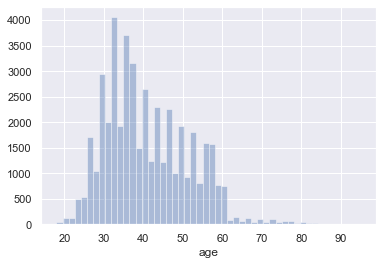

In [15]:
sns.distplot(bankdata['age'], kde=False);

#### Outliers for age that shows ouliers being age 70 and above

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


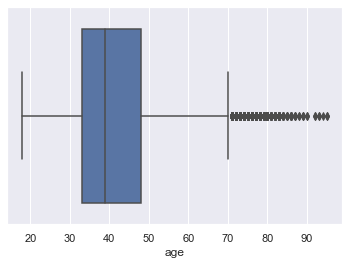

In [16]:
sns.boxplot(bankdata['age']);

In [17]:
bankdata['age'].isnull().sum()

0

In [18]:
bankdata['age'].where( bankdata['age'] < 20).dropna().count()

47

#### Plot for balance

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


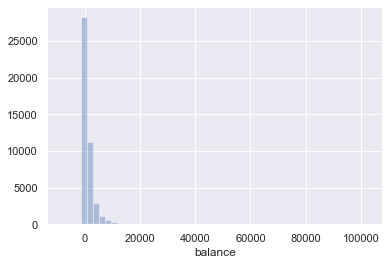

In [19]:
sns.distplot(bankdata['balance'], kde=False);

#### Box plot to show outliers as those points beyond the whisker limits , going to max of 1000000 plus , as well as below 0

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


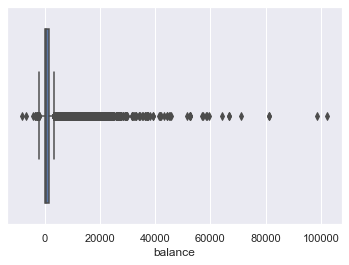

In [20]:
sns.boxplot(bankdata['balance']);

In [21]:
#pd.set_option('display.max_rows', None)
print(bankdata['balance'].where (bankdata['balance'] < 0).dropna().head(10))
print(bankdata['balance'].where (bankdata['balance'] < 0).dropna().count())

25   -372.0
28   -246.0
36     -7.0
37     -3.0
45   -171.0
46   -364.0
51   -244.0
53    -76.0
54   -103.0
94    -37.0
Name: balance, dtype: float64
3766


#### There are 3766 instances of negative bank balance , which indicates incorrect data. 

#### Check most negative balance

In [22]:
bankdata['balance'].where (bankdata['balance'] < 0).dropna().min()

-8019.0

#### Check least negative balance

In [23]:
bankdata['balance'].where (bankdata['balance'] < 0).dropna().max()

-1.0

#### check the mean of the negative balances

In [24]:
bankdata['balance'].where (bankdata['balance'] < 0).dropna().mean()

-317.6776420605417

#### Shows negative balance has min of -8019 , max of -1 and mean of -317 

#### Check the min positive balance

In [25]:
bankdata['balance'].where (bankdata['balance'] > 0).dropna().min()

1.0

#### Check max positive balance

In [26]:
bankdata['balance'].where (bankdata['balance'] > 0).dropna().max()

102127.0

#### check mean, median  of positive balance

In [27]:
bankdata['balance'].where (bankdata['balance'] > 0).dropna().mean()

1655.270253882049

In [28]:
bankdata['balance'].where (bankdata['balance'] > 0).median()

644.0

#### Check count of balances = 1 , > 1 , >0, and = 0

In [29]:
bankdata['balance'].where (bankdata['balance'] == 1).dropna().count()

195

In [30]:
bankdata['balance'].where (bankdata['balance'] > 1).dropna().count()

37736

In [31]:
bankdata['balance'].where (bankdata['balance'] > 0).count()

37931

In [32]:
bankdata.shape

(45211, 17)

In [33]:
bankdata['balance'].where (bankdata['balance'] > 0).count() + bankdata['balance'].where (bankdata['balance'] < 0).count() + bankdata['balance'].where (bankdata['balance'] == 0).count()

45211

In [34]:
bankdata['balance'].where (bankdata['balance'] == 0).count()

3514

### Negative balance analysis
#### There are 3766 instances of negative balance , as comapred to 3514 balance with zero and 45211 records with positive balances . Based on above , decided to replace negative balance with zero

In [35]:
# bankdata['balance'] = np.where( (bankdata['balance'].where(bankdata['balance'] < 0)) , 0, bankdata.balance )

In [36]:
bankdata['balance'] = np.where( (bankdata['balance'] < 0) , 0, bankdata.balance )

#### confirm that neg balances have been replaced with 0

In [37]:
bankdata['balance'].where (bankdata['balance'] < 0).dropna()

Series([], Name: balance, dtype: float64)

#### 7280 records now have balance = 0. No more negative balances in dataframe

In [38]:
bankdata['balance'].where (bankdata['balance'] == 0).count()

7280

In [39]:
bankdata['balance'].where (bankdata['balance'] > 0).dropna().count()

37931

#### Check if there are unusual balances with respect to age , where at young age , there is a high balance. Use mean balance to check

In [40]:
bankdata[['age', 'balance']].where( (bankdata['age'] < 20) & ( bankdata['balance'] > 1655)).dropna()

age  balance
31304  19.0   1803.0
34281  19.0   5368.0
40376  19.0   1803.0
40736  18.0   1944.0

####  As seen above , There are 4 instances where at age below 20 , the balances seem to be abnormally high.We consider mean as the criteria  = 1655


#### Looking at other data , where the age <20 and balance is > 1655 , we see all are students. This may be a case where they may have gotten funds from sources like parents or scholarships. Hence not changing these values

In [41]:
bankdata.where(( bankdata['age'] < 20) & (bankdata['balance'] > 1655)).dropna()

age      job marital  education default  balance housing loan  \
31304  19.0  student  single  secondary      no   1803.0      no   no   
34281  19.0  student  single    unknown      no   5368.0      no   no   
40376  19.0  student  single  secondary      no   1803.0      no   no   
40736  18.0  student  single    primary      no   1944.0      no   no   

         contact   day month  duration  campaign  pdays  previous poutcome  \
31304   cellular  10.0   mar      59.0       1.0   -1.0       0.0  unknown   
34281   cellular   4.0   may      77.0       6.0   -1.0       0.0  unknown   
40376   cellular  23.0   jun     124.0       1.0  105.0       1.0  failure   
40736  telephone  10.0   aug     122.0       3.0   -1.0       0.0  unknown   

      Target  
31304     no  
34281     no  
40376     no  
40736     no

In [42]:
pd.set_option('display.max_rows', 30)
bankdata['balance'].where(( bankdata['age']).between(20,30) & (bankdata['balance'] < 1655)).dropna()

6        447.0
11       390.0
20       723.0
23        50.0
36         0.0
         ...  
45192    765.0
45193    159.0
45196    358.0
45203    113.0
45205    505.0
Name: balance, Length: 5847, dtype: float64

In [43]:
bankdata['balance'].where(( bankdata['age']).between(20,30) & (bankdata['balance'] > 1655)).dropna()

257       2573.0
569       5090.0
1046      2605.0
1205      2087.0
1241      5903.0
          ...   
45066     1925.0
45075    11862.0
45116     1868.0
45148     2488.0
45172     2325.0
Name: balance, Length: 1136, dtype: float64

#### Getting more details on the age group between 20 and 30 , who have balance > mean balance of 1655. 

In [44]:
pd.set_option('display.max_rows', None)
bankdata.where(( bankdata['age']).between(20,30) & (bankdata['balance'] > 1655)).dropna().sort_values(by='balance', ascending=False).head(20)

age          job  marital  education default  balance housing loan  \
34170  29.0   management   single   tertiary      no  36252.0     yes   no   
2554   28.0   technician   single  secondary      no  26765.0      no   no   
2343   26.0   technician   single  secondary      no  24299.0     yes   no   
41922  27.0      student   single   tertiary      no  24025.0      no   no   
39535  24.0      student   single  secondary      no  23878.0      no   no   
31124  24.0      student   single  secondary      no  23878.0      no   no   
29521  26.0   unemployed   single   tertiary      no  23494.0      no   no   
7014   28.0       admin.  married  secondary      no  22171.0     yes   no   
38992  29.0       admin.  married  secondary      no  22171.0     yes   no   
6876   29.0   technician   single  secondary      no  22008.0     yes   no   
41617  27.0   management   single   tertiary      no  20585.0      no   no   
40278  27.0   management   single   tertiary      no  20585.0      no   no   
26919  30.0   management   single   tertiary      no  20580.0     yes   no   
23554  30.0   management   single   tertiary      no  20261.0     yes   no   
26752  30.0   management   single   tertiary      no  19796.0      no   no   
40462  23.0   unemployed   single  secondary      no  19690.0      no   no   
25993  30.0   management   single   tertiary      no  19358.0      no   no   
36435  29.0   technician   single   tertiary      no  18254.0      no   no   
10421  27.0       admin.   single  secondary      no  18188.0     yes   no   
8588   26.0  blue-collar   single  secondary      no  17891.0     yes   no   

        contact   day month  duration  campaign  pdays  previous poutcome  \
34170  cellular  30.0   apr     501.0       1.0   -1.0       0.0  unknown   
2554    unknown  13.0   may     210.0       8.0   -1.0       0.0  unknown   
2343    unknown  13.0   may     704.0       1.0   -1.0       0.0  unknown   
41922  cellular  21.0   oct      99.0       1.0   -1.0       0.0  unknown   
39535  cellular  26.0   may     133.0       1.0   97.0       1.0  success   
31124  cellular  18.0   feb     185.0       1.0   -1.0       0.0  unknown   
29521  cellular   3.0   feb     136.0       1.0   -1.0       0.0  unknown   
7014    unknown  28.0   may      85.0       3.0   -1.0       0.0  unknown   
38992  cellular  18.0   may      44.0       1.0  355.0       3.0  failure   
6876    unknown  28.0   may     139.0       2.0   -1.0       0.0  unknown   
41617  cellular  23.0   sep     299.0       1.0  100.0       1.0  success   
40278  cellular  15.0   jun     188.0       1.0   -1.0       0.0  unknown   
26919  cellular  21.0   nov     116.0       2.0   -1.0       0.0  unknown   
23554  cellular  28.0   aug      81.0      10.0   -1.0       0.0  unknown   
26752  cellular  20.0   nov      41.0       1.0   -1.0       0.0  unknown   
40462  cellular   3.0   jul     473.0       1.0   -1.0       0.0  unknown   
25993  cellular  19.0   nov     258.0       2.0   -1.0       0.0  unknown   
36435  cellular  11.0   may     279.0       2.0   -1.0       0.0  unknown   
10421   unknown  12.0   jun     541.0      17.0   -1.0       0.0  unknown   
8588    unknown   3.0   jun     239.0       1.0   -1.0       0.0  unknown   

      Target  
34170    yes  
2554      no  
2343      no  
41922     no  
39535    yes  
31124    yes  
29521     no  
7014      no  
38992     no  
6876      no  
41617    yes  
40278    yes  
26919     no  
23554     no  
26752     no  
40462     no  
25993     no  
36435     no  
10421    yes  
8588      no

#### Check that 'retired' job category does not have balances > 1655

In [45]:
pd.set_option('display.max_rows', None)
bankdata.where(( bankdata['age']).between(20,30) & (bankdata['balance'] > 1655) & ( bankdata['job']=='retired' )).dropna().sort_values(by='balance', ascending=False)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, Target]
Index: []

In [46]:
pd.set_option('display.max_rows', None)
grouped_balance_job_retired = bankdata.where(( bankdata['age']).between(20,30) & (bankdata['balance'] > 1655) & ( bankdata['job']=='retired' )).dropna().sort_values(by='balance', ascending=False)


#### Check job wise balance data , and sort by highest to lowest balances.

In [47]:
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 100)

grouped_balance_job = bankdata.where(( bankdata['age']).between(20,30) & (bankdata['balance'] > 1655)).dropna().sort_values(by='balance', ascending=False).groupby('job')

for key, value in grouped_balance_job:
    if key != 'retired':
        print(grouped_balance_job.get_group(key).head(20), '\n\n')
        print( '\033[1m\033[35mCount in the group', key, ' is :',grouped_balance_job['job'].get_group(key).count(), '\033[0m\n\n')

        age     job  marital  education default  balance housing loan    contact   day month  \
7014   28.0  admin.  married  secondary      no  22171.0     yes   no    unknown  28.0   may   
38992  29.0  admin.  married  secondary      no  22171.0     yes   no   cellular  18.0   may   
10421  27.0  admin.   single  secondary      no  18188.0     yes   no    unknown  12.0   jun   
26489  30.0  admin.   single  secondary      no  10735.0      no   no   cellular  20.0   nov   
6623   28.0  admin.  married  secondary      no   9779.0     yes  yes    unknown  28.0   may   
25407  30.0  admin.  married  secondary      no   8781.0     yes   no   cellular  18.0   nov   
7638   28.0  admin.  married  secondary      no   7707.0     yes   no    unknown  30.0   may   
33854  29.0  admin.  married  secondary      no   7707.0     yes   no   cellular  29.0   apr   
30749  27.0  admin.   single  secondary      no   6492.0      no   no   cellular   6.0   feb   
37695  29.0  admin.  married  secondary 

30653      93.0       1.0   -1.0       0.0  unknown     no   


Count in the group unemployed  is : 30 


        age      job marital  education default  balance housing loan    contact   day month  \
8828   30.0  unknown  single    primary      no  13052.0      no   no    unknown   4.0   jun   
25748  30.0  unknown  single    unknown      no   6929.0      no   no   cellular  19.0   nov   
31197  30.0  unknown  single   tertiary      no   6836.0      no   no   cellular  27.0   feb   
42786  27.0  unknown  single   tertiary      no   6421.0      no   no  telephone  28.0   jan   
43744  27.0  unknown  single   tertiary      no   6421.0      no   no   cellular  18.0   may   
27949  28.0  unknown  single  secondary      no   4465.0      no   no   cellular  28.0   jan   
30628  26.0  unknown  single  secondary      no   3247.0      no   no  telephone   6.0   feb   

       duration  campaign  pdays  previous poutcome Target  
8828      140.0       1.0   -1.0       0.0  unknown     no  
257

#### As seen above , for ages between 20 and 30 , there are 5847 records with balance below mean 1655 , and 1136 records above mean balance value of 1655.   Also , the group 'managemnt' has the max number of cases (270) where balances are greated than the mean 1655, in age group 20 to 30.

### Plotting for 'day' . 

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


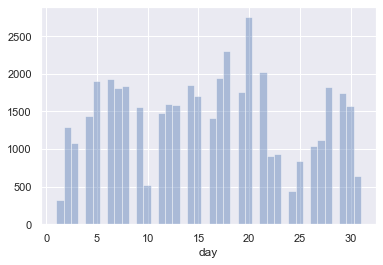

In [48]:
sns.distplot(bankdata['day'], kde=False);

#### Box plot to show outliers for 'day' . Shows that median 'last day of contact in the month' was 16th 

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


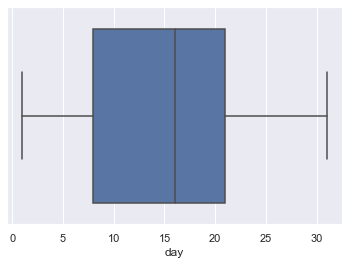

In [49]:
sns.boxplot(bankdata['day']);

### Ploting for duration

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


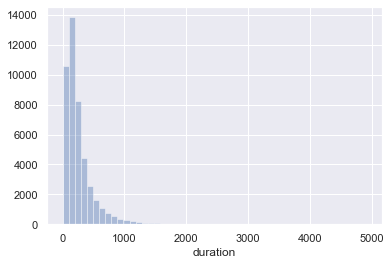

In [50]:
sns.distplot(bankdata['duration'], kde=False);

#### boxplot for 'duration'. Shows outliers starting around 600 seconds. Max is 4918 seconds , which is around 82 mins

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


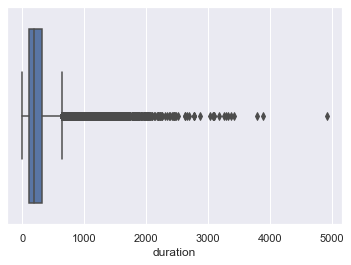

In [51]:
sns.boxplot(bankdata['duration']);

In [52]:
bankdata['duration'].where (bankdata['duration'] < 0).count()

0

### plot for campaign

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


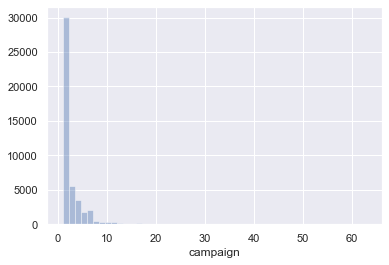

In [53]:
sns.distplot(bankdata['campaign'] , kde=False);

#### plot of outliers for campaign is shown in boxplot below . Outliers ranges from around 5 to 60 plus contacts for the client

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


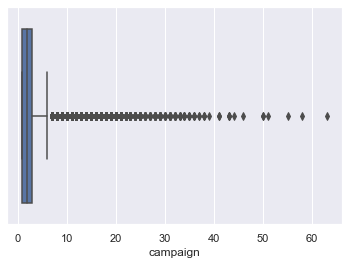

In [54]:
sns.boxplot(bankdata['campaign']);

#### Check where number of contacts were more than 5 (outliers) and duration was > 600 secs (outliers) . 294 such cases

In [55]:
bankdata[['campaign', 'duration']].where(  (bankdata['campaign'] > 5) & (bankdata['duration'] > 600)  ).dropna().count()

campaign    294
duration    294
dtype: int64

#### Check cases where number of contacts were < 5 , but duration was in outlier range. There are 3363 such cases, where in limited number of contacts , duration was high

In [56]:
bankdata[['campaign', 'duration']].where(  (bankdata['campaign'] < 5) & (bankdata['duration'] > 600)  ).dropna().count()

campaign    3363
duration    3363
dtype: int64

#### Getting details of rows where campaing < 5 and duration > 600 sec , grouped by 'campaing' , from 1 thru 4

In [57]:
grouped_bankdata = bankdata[['campaign', 'duration']].where(  (bankdata['campaign'] < 5) & (bankdata['duration'] > 600)  ).dropna().groupby('campaign')
for key, value in grouped_bankdata:
    print(grouped_bankdata.get_group(key).head(10), '\n\n')

     campaign  duration
37        1.0    1666.0
43        1.0    1492.0
44        1.0     616.0
53        1.0     787.0
59        1.0    1778.0
61        1.0     812.0
83        1.0    1042.0
86        1.0    1467.0
87        1.0    1389.0
130       1.0     677.0 


     campaign  duration
109       2.0     849.0
151       2.0     610.0
168       2.0     673.0
181       2.0     683.0
203       2.0     611.0
231       2.0     730.0
232       2.0     746.0
249       2.0     714.0
260       2.0     611.0
267       2.0     611.0 


      campaign  duration
280        3.0     621.0
330        3.0     669.0
471        3.0     699.0
531        3.0     604.0
569        3.0    1297.0
600        3.0    1906.0
670        3.0     739.0
815        3.0     923.0
817        3.0     953.0
1065       3.0     764.0 


      campaign  duration
1034       4.0    2177.0
1124       4.0    1689.0
1646       4.0     617.0
1952       4.0    1178.0
2046       4.0     836.0
2158       4.0    1495.0
2285       4.

In [58]:
grouped_bankdata1 = bankdata[['campaign', 'duration']].where(  (bankdata['campaign'] == 1) & (bankdata['duration'] > 600)  ).dropna().groupby('campaign')

#grouped_bankdata1.sort_values(axis = 1, by= 'campaign', ascending=False)
for key, value in grouped_bankdata1:
    print(grouped_bankdata1.get_group(key).head(10), '\n\n')

     campaign  duration
37        1.0    1666.0
43        1.0    1492.0
44        1.0     616.0
53        1.0     787.0
59        1.0    1778.0
61        1.0     812.0
83        1.0    1042.0
86        1.0    1467.0
87        1.0    1389.0
130       1.0     677.0 




In [59]:
#pd.set_option('display.max_rows', None)
bankdata[['campaign', 'duration']].sort_values(['campaign', 'duration'], ascending=False).groupby('campaign').head(10)

campaign  duration
4330         63       124
11914        58        10
5073         55      1094
4299         51        88
5459         50       147
18713        50        65
10697        46       102
18744        44        18
4275         43        44
13675        43        16
18660        43        16
4334         41        51
11301        41        25
18616        39        33
23062        38        22
18704        38        21
5721         38        14
9964         37        21
11884        37        17
18696        36        58
18513        36        51
18675        36        30
18603        36        25
17739        35        77
23559        35        49
13311        35        21
18749        35        14
18615        34        66
18788        34        57
18667        34        43
23182        34        20
18394        34        16
17843        33        92
18645        33        37
12936        33        36
12155        33        20
18592        33        18
17971        33        14
3331         32       651
3529         32       241
4020         32       192
3483         32       132
8547         32        35
18782        32        34
8238         32        29
18661        32        14
23567        32         9
18430        31       543
17158        31       243
18670        31       106
18101        31        47
23722        31        35
11394        31        34
17354        31        33
15869        31        21
18612        31        20
9296         31        18
17072        30        72
18686        30        56
12934        30        25
22417        30        24
11274        30        19
10692        30        18
23724        30        13
18750        30         8
17873        29      1013
11234        29       248
10479        29       157
17856        29        96
18740        29        70
16540        29        54
9251         29        53
18816        29        45
18724        29        40
18697        29        35
8544         28       633
23283        28       320
23596        28       203
18210        28       172
18709        28        46
18276        28        44
11673        28        41
23289        28        29
15886        28        24
4790         28        18
14008        27       311
11015        27       273
18631        27        69
23678        27        68
23752        27        64
11921        27        32
12043        27        29
18600        27        22
18820        27        16
18652        27         8
8512         26       177
4338         26        99
10013        26        99
17869        26        65
9292         26        54
4637         26        51
23704        26        26
9294         26        25
11904        26        25
13046        26        24
4015         25      1245
10616        25       179
11623        25       130
23595        25        93
12170        25        90
23648        25        88
8300         25        55
17962        25        55
18745        25        38
18795        25        28
16637        24      1484
17954        24      1037
12224        24       145
18222        24       134
23710        24        99
23607        24        85
23803        24        71
18367        24        49
9566         24        36
7470         24        35
17842        23       590
17816        23       165
33858        23       164
18375        23       126
10837        23       124
18070        23       106
6051         23       102
7498         23       101
23297        23        89
18760        23        78
3664         22       597
22734        22       463
11774        22       402
22950        22       135
23169        22       108
22228        22        91
3475         22        84
7493         22        54
7443         22        39
17881        22        31
10466        21       768
8668         21       254
17850        21       254
30917        21       253
16129        21       249
15890        21       184
11939        21       179
17520        21       176
110

#### Find instances where number of contacts were <5 and last duration is > 1200 sec ( 20 mins). We get 487 cases . This indicates some data outliers since in one call (last contact), the duration lasted more than 20 mins, as compared to mean duration of 4.3 mins ( 258 secs)

In [60]:
#pd.set_option('display.max_rows', None)
#print(bankdata[['campaign', 'duration']].where(  (bankdata['campaign'] < 5) & (bankdata['duration'] > 1200)).sort_values(['campaign', 'duration'], ascending=False).groupby('campaign').head(20).dropna())
print(bankdata[['campaign', 'duration']].where(  (bankdata['campaign'] < 5) & (bankdata['duration'] > 1200)).sort_values(['campaign', 'duration'], ascending=False).groupby('campaign').head(20).dropna())
print('campaign wise count is :\n', bankdata[['campaign', 'duration']].where(  (bankdata['campaign'] < 5) & (bankdata['duration'] > 1200)).sort_values(['campaign', 'duration'], ascending=False).groupby('campaign').count())
print('Total is ', bankdata[['campaign','duration']].where(  (bankdata['campaign'] < 5) & (bankdata['duration'] > 1200)).sort_values(['campaign', 'duration'], ascending=False).count())

       campaign  duration
4382        4.0    3078.0
10726       4.0    2769.0
3135        4.0    2241.0
1034        4.0    2177.0
29669       4.0    2053.0
30992       4.0    1971.0
16960       4.0    1946.0
2285        4.0    1875.0
38694       4.0    1871.0
16796       4.0    1820.0
14797       4.0    1806.0
37454       4.0    1805.0
20669       4.0    1735.0
13268       4.0    1720.0
1124        4.0    1689.0
26838       4.0    1598.0
38728       4.0    1598.0
45200       4.0    1556.0
2158        4.0    1495.0
26876       4.0    1476.0
9947        3.0    3881.0
2386        3.0    3366.0
30747       3.0    3102.0
9515        3.0    2653.0
11635       3.0    2635.0
10989       3.0    2621.0
26830       3.0    2420.0
37377       3.0    1970.0
30539       3.0    1960.0
600         3.0    1906.0
22278       3.0    1877.0
21205       3.0    1871.0
26886       3.0    1855.0
43032       3.0    1835.0
33505       3.0    1817.0
42402       3.0    1804.0
41893       3.0    1745.0
26110       

#### plot for pdays

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


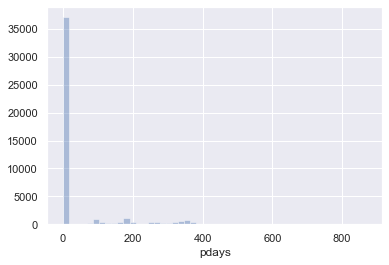

In [61]:
sns.distplot(bankdata['pdays'], kde=False);

#### Outliers for pdays has been plotted in box plot below

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


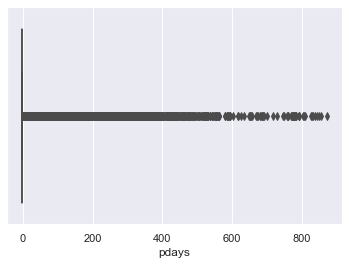

In [62]:
sns.boxplot(bankdata['pdays']);

In [63]:
bankdata['pdays'].where(bankdata['pdays'] < 0).count()

36954

In [64]:
bankdata['pdays'].where (bankdata['pdays'] < 0).min()

-1.0

#### Since -1 indicates contact not done at all , or contact was done beyond last 900 days , will change the value to 900. Also confirm.

In [65]:
bankdata['pdays'] = np.where( (bankdata['pdays'] == -1) , 900, bankdata.pdays )

In [66]:
bankdata['pdays'].where (bankdata['pdays'] < 0).count()

0

#### Plotting pdays again

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


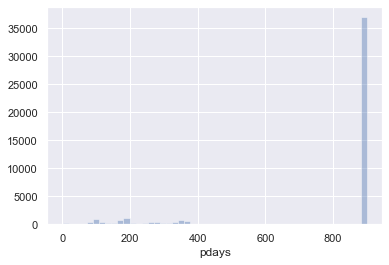

In [67]:
sns.distplot(bankdata['pdays'], kde=False);

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


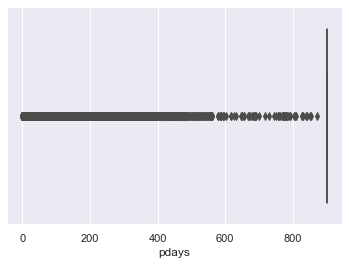

In [68]:
sns.boxplot(bankdata['pdays']);

In [69]:
bankdata['pdays'].where (bankdata['pdays'].between(0,600, inclusive=True)).count()

8205

In [70]:
bankdata['pdays'].where (bankdata['pdays'].between(601,899, inclusive=True)).count()

52

In [71]:
bankdata['pdays'].where (bankdata['pdays']== 900).count()

36954

#### It is seen that vast majority of persons have either not been contacted or , were contacted 900 or more days prior

#### plotting for previous

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


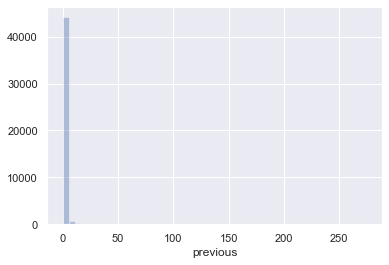

In [72]:
sns.distplot(bankdata['previous'], kde=False);

#### Outliers for 'previous' feature plotted in box plot below. Many ouliers in > 0 but < 70 range . One outlier > 250

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


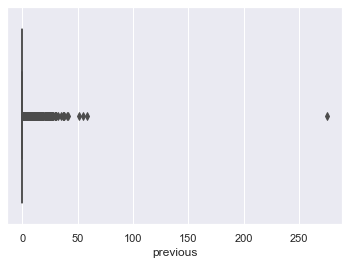

In [73]:
sns.boxplot(bankdata['previous']);

In [74]:
bankdata['previous'].where (bankdata['previous'] < 0).count()

0

In [75]:
bankdata['previous'].where (bankdata['previous'] == 0).count()

36954

#### As seen above , Vast majority of persons were not contacted before this campaign

### Plot histograms for categorical variables , to show counts

In [76]:
bankdata_cat_cols = bankdata.columns.where( bankdata.dtypes == 'category').dropna()

In [77]:
print( (bankdata_cat_cols).dropna() )

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome',
       'Target'],
      dtype='object')


#### get all the categories in the categorical variables

In [78]:
for col in bankdata_cat_cols:
    print('\033[1m\033[35m',col,'\033[0m\n', bankdata[col].value_counts(),'\n')

 job 
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

 marital 
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

 education 
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

 default 
 no     44396
yes      815
Name: default, dtype: int64 

 housing 
 yes    25130
no     20081
Name: housing, dtype: int64 

 loan 
 no     37967
yes     7244
Name: loan, dtype: int64 

 contact 
 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

 month 
 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 

 

### plotting categorical variable - job . Max counts are for management , blue collar and technician jobs

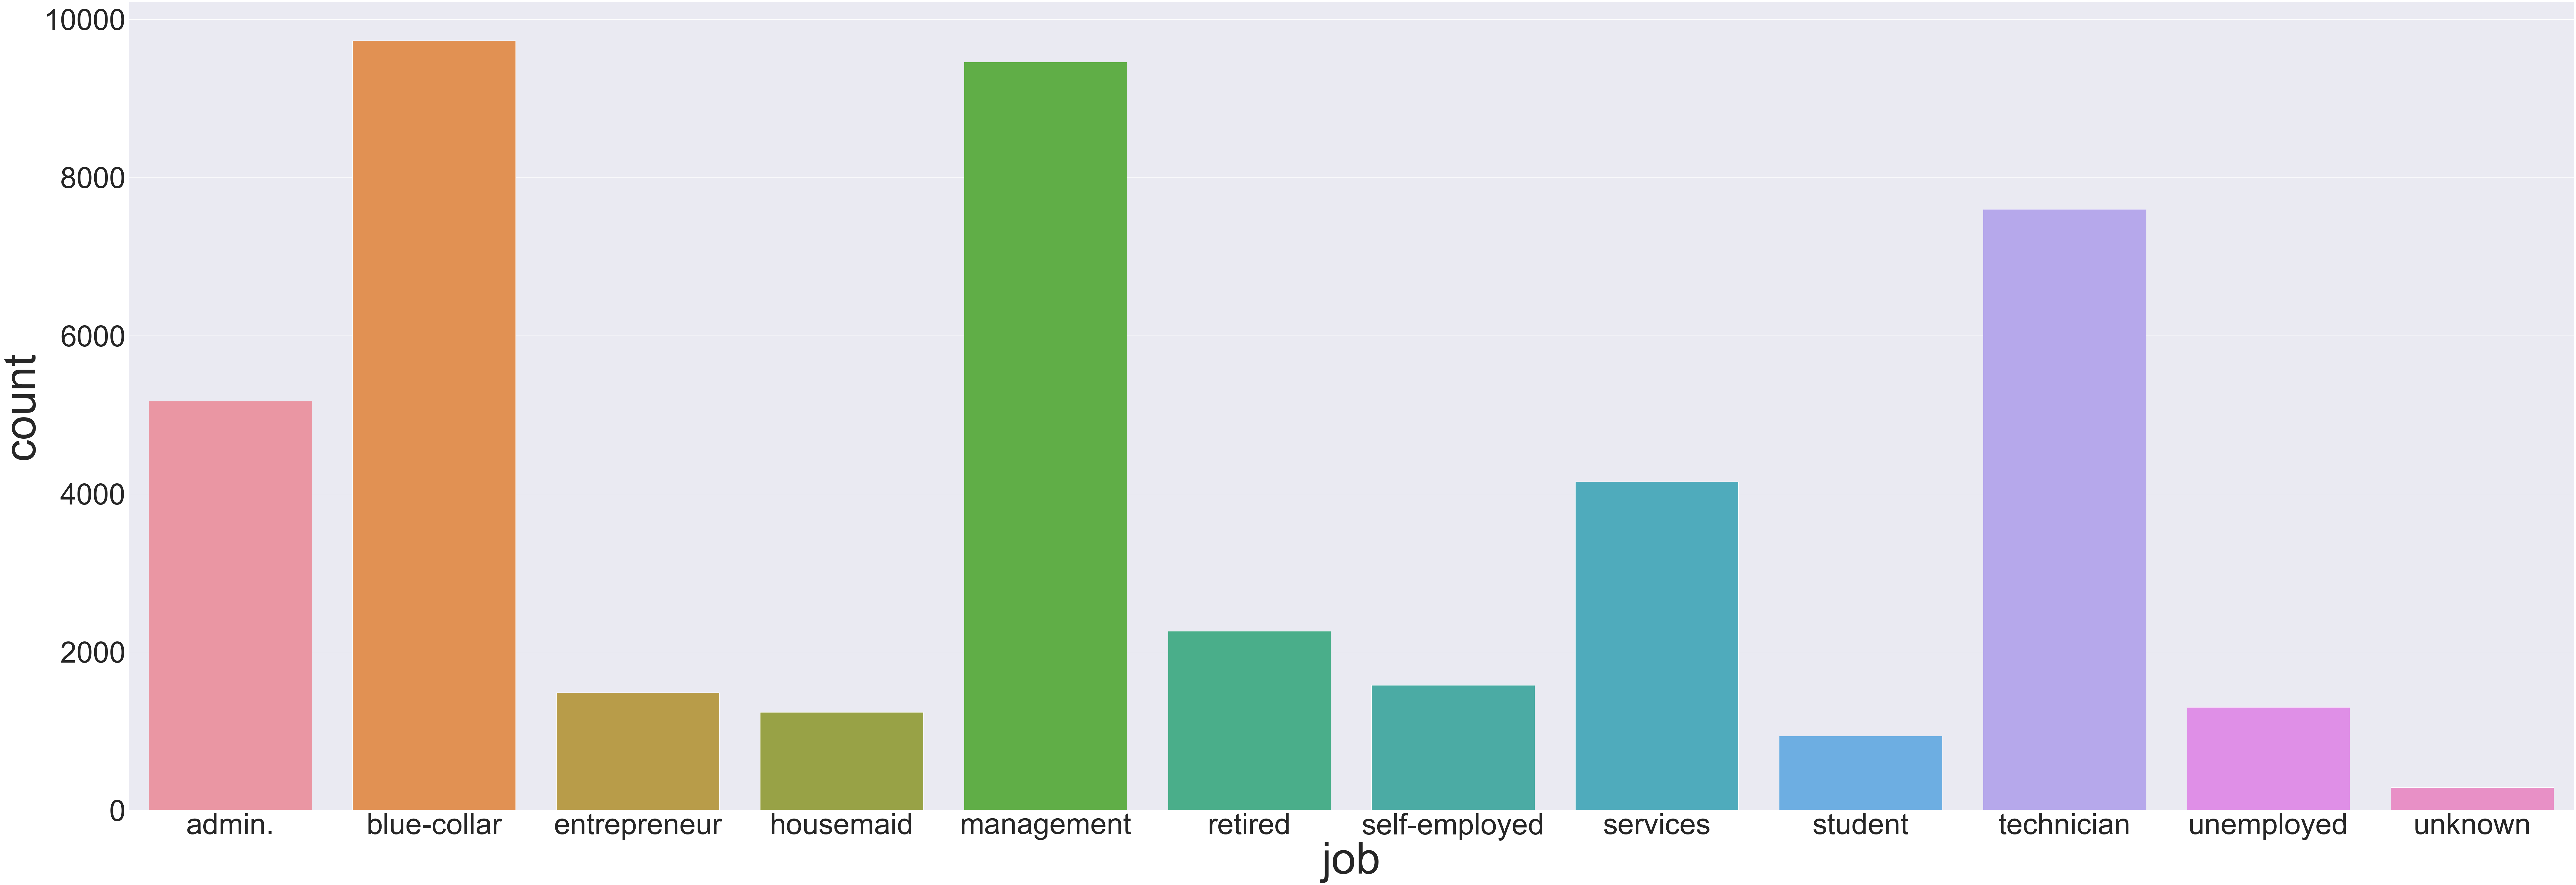

In [79]:
#plt.figure(figsize=(15,15))
plt.rcParams["axes.labelsize"] = 150
plt.rcParams["xtick.labelsize"] = 100
plt.rcParams["ytick.labelsize"] = 100
sns.catplot(x='job', kind='count', data=bankdata , height= 40, aspect = 3);

#### Plotting categorical variable - marital . There are more married persons in the data and divorced are the least

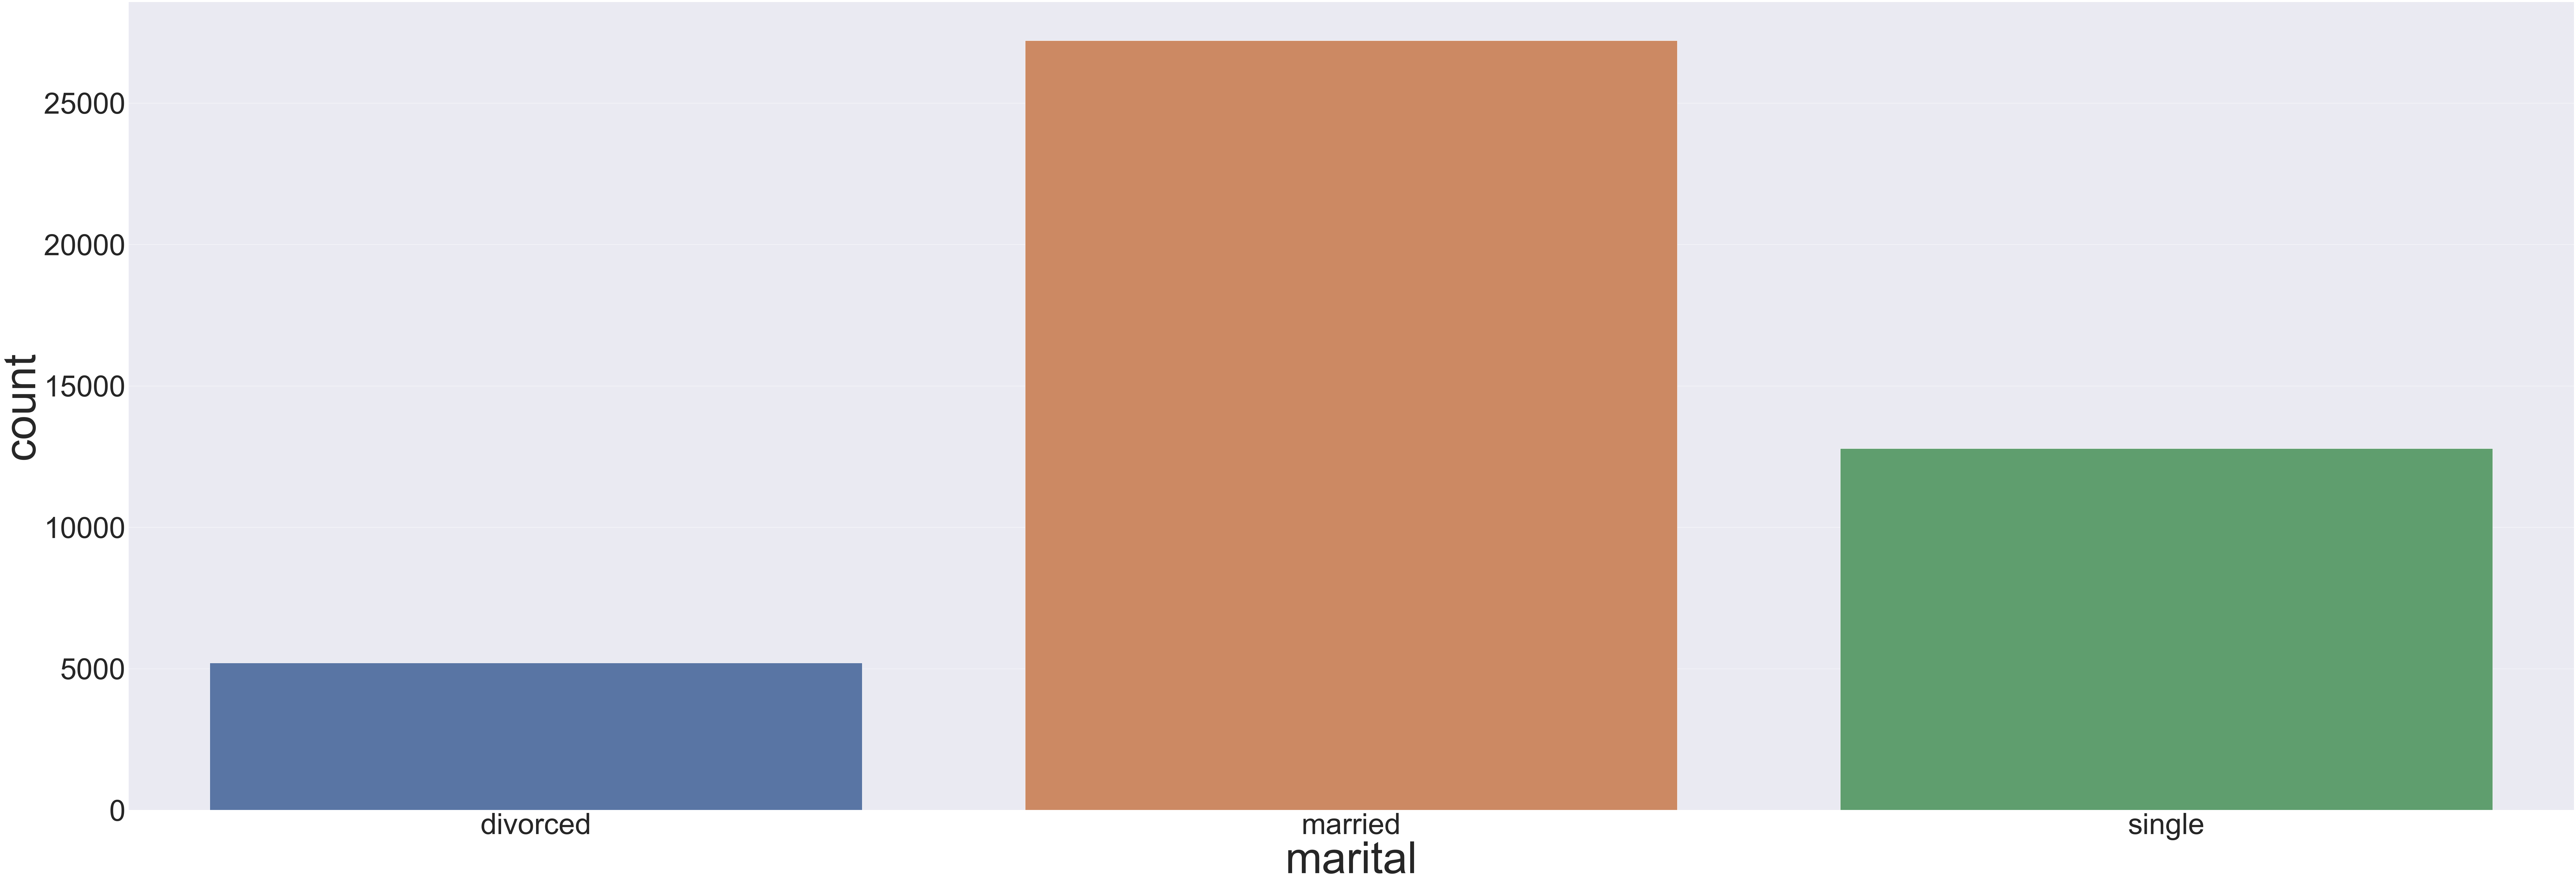

In [80]:
sns.catplot(x='marital', kind='count', data=bankdata , height= 40, aspect = 3);

### plot categorical varaible - education . Majority have secondary eductaion , followed by next largest group having tertiary education. There is a small number of persons where education is unknown

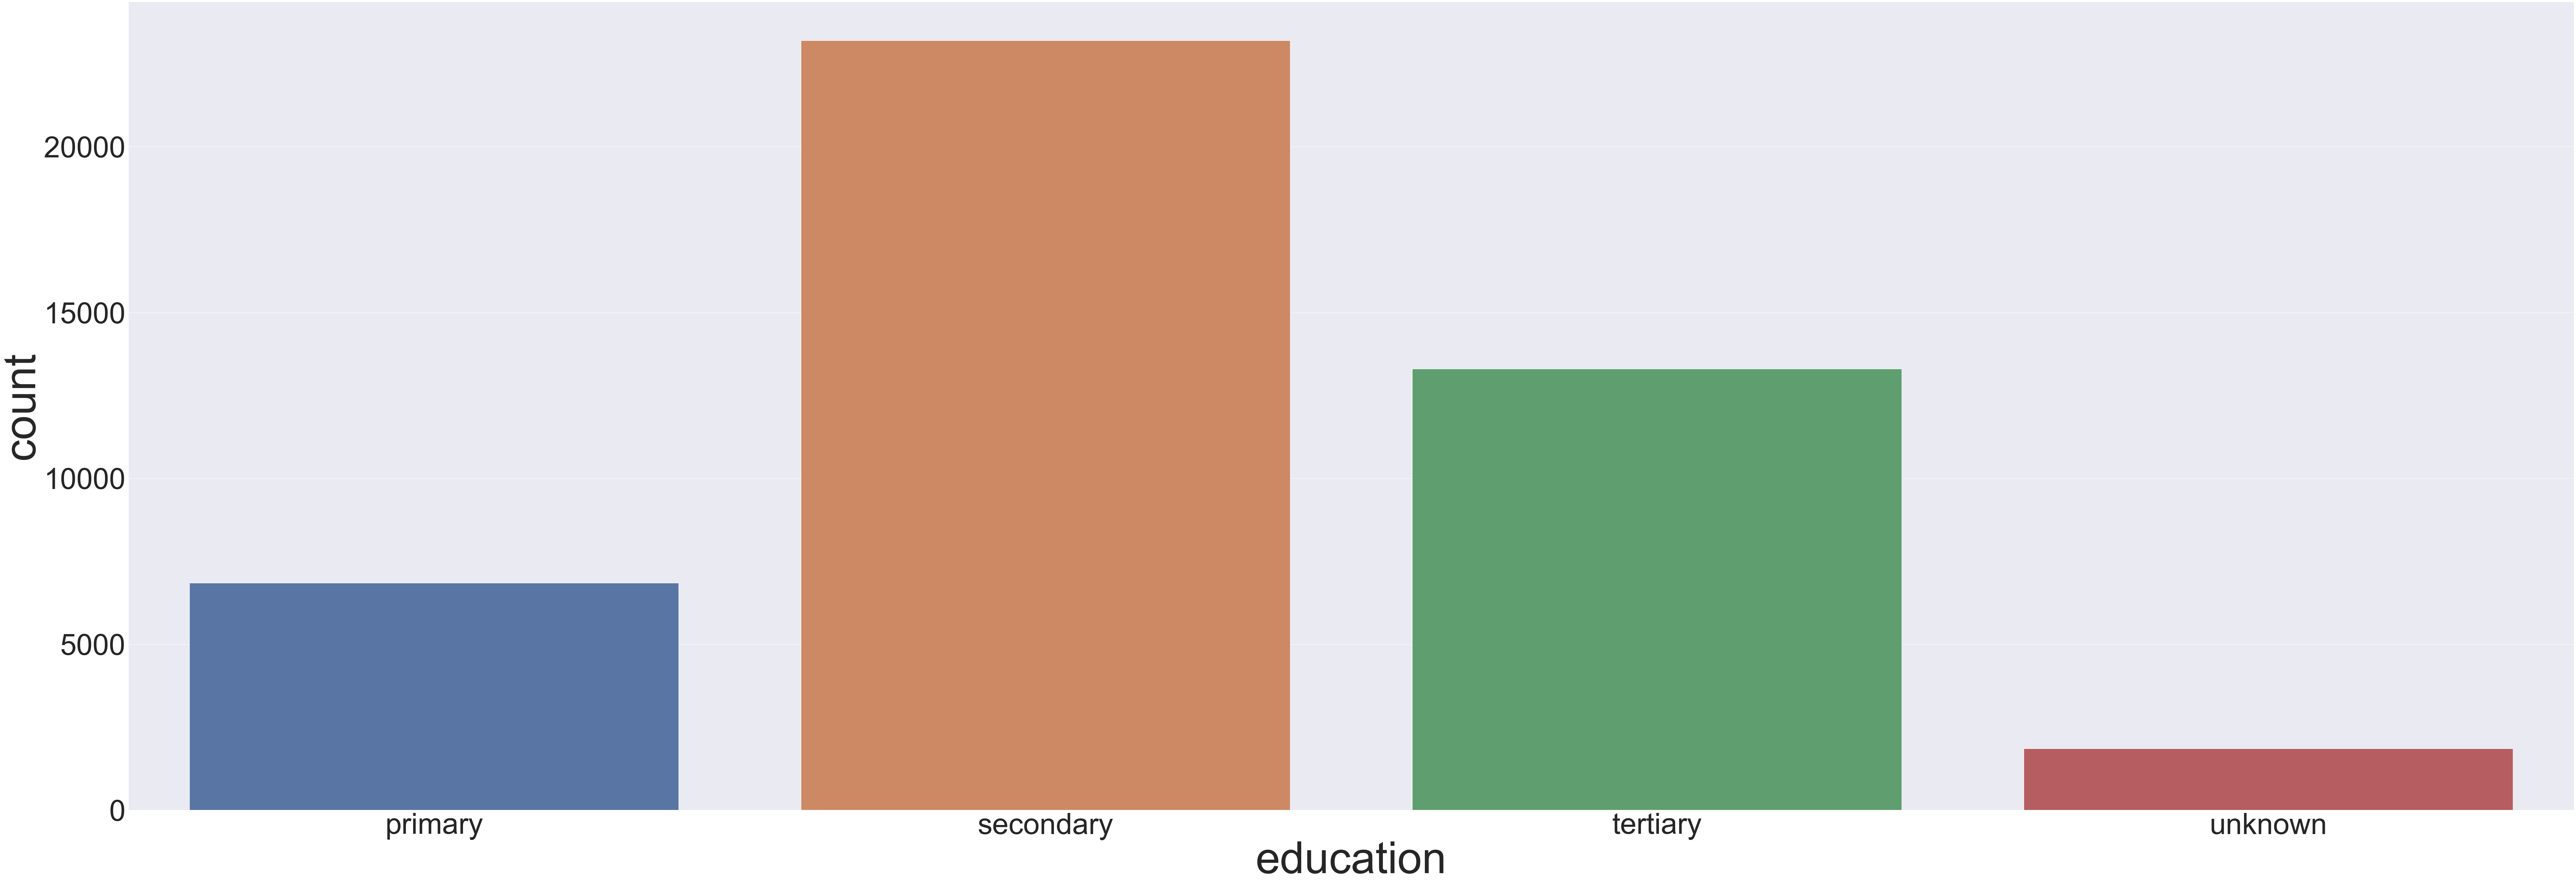

In [81]:
sns.catplot(x='education', kind='count', data=bankdata , height= 40, aspect = 3);

### plot categorical variable - default . Vast majority do not have any default records

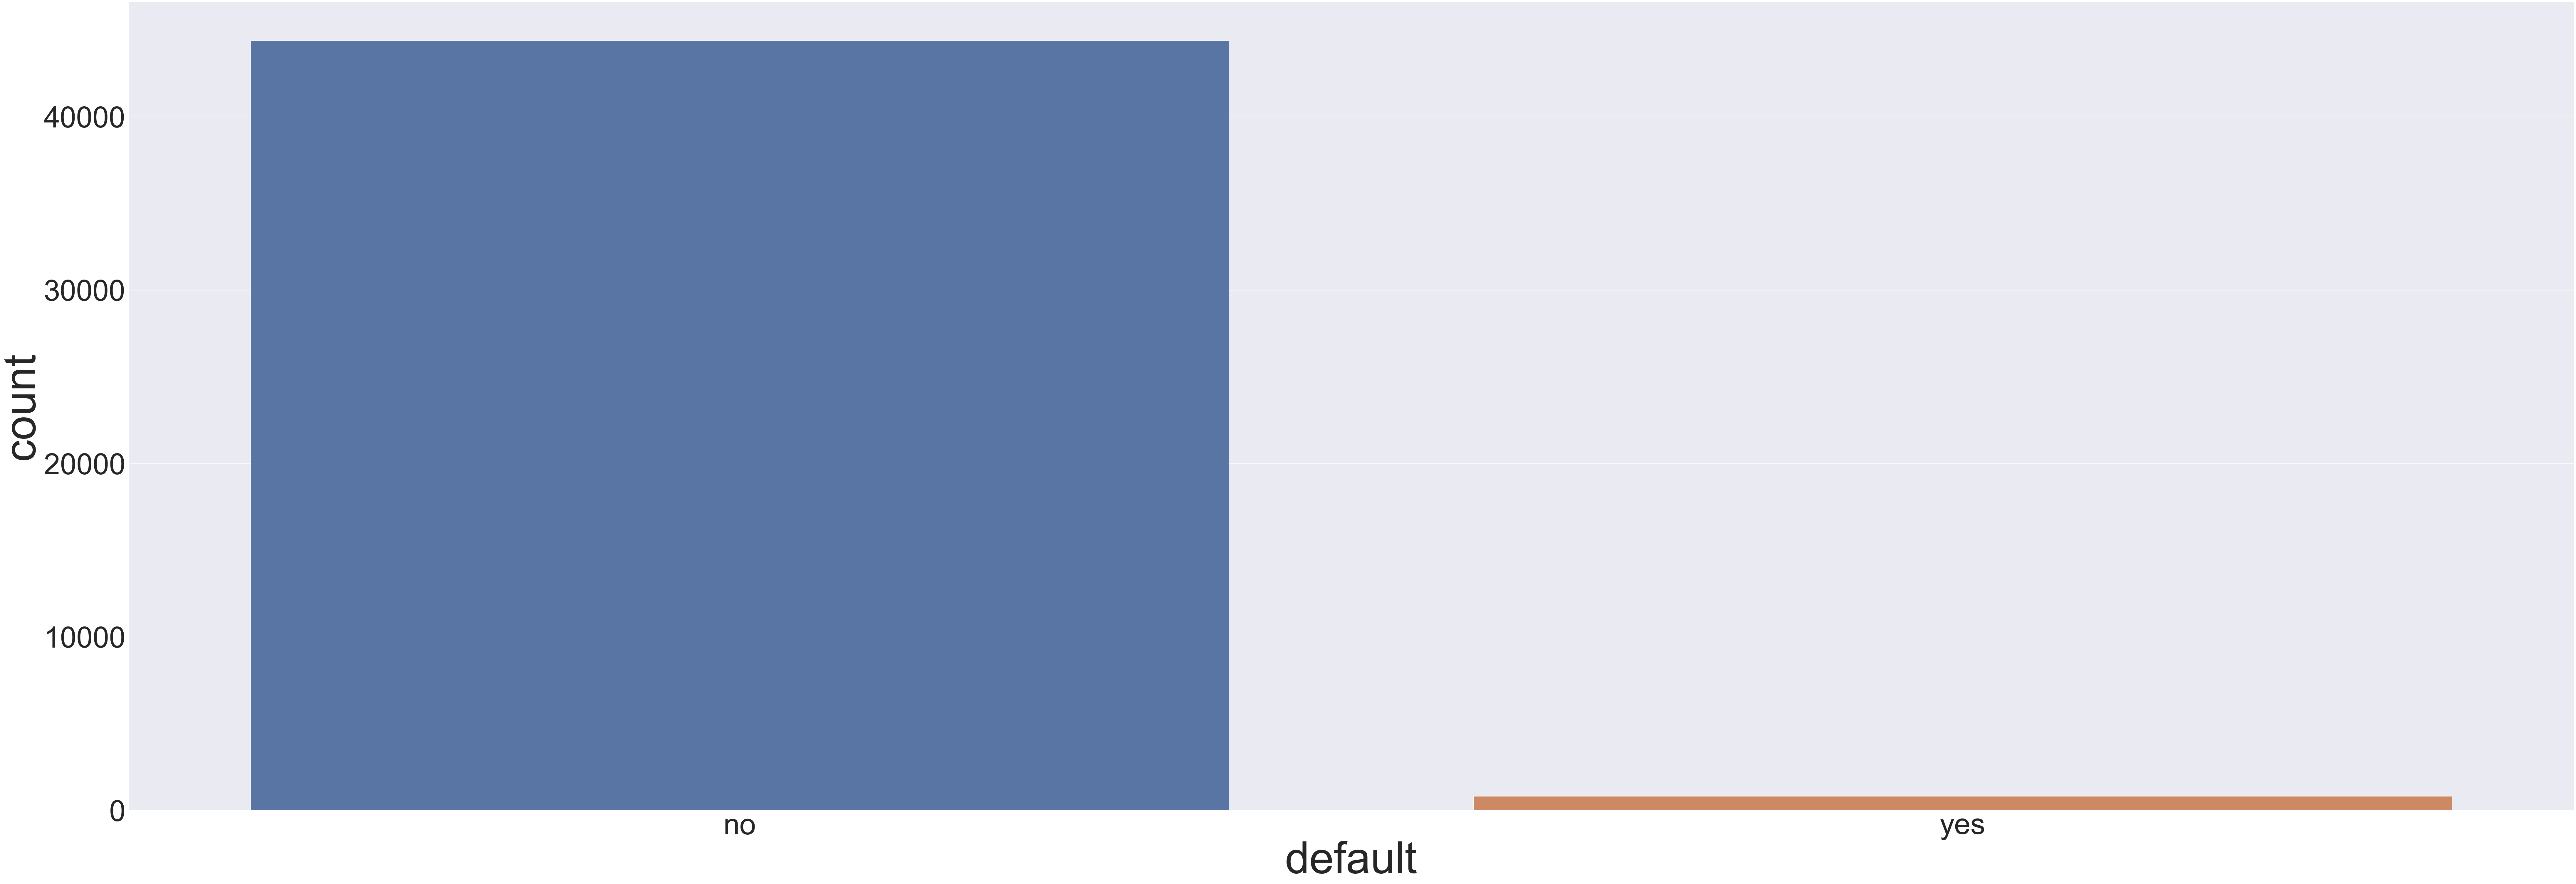

In [82]:
sns.catplot(x='default', kind='count', data=bankdata , height= 40, aspect = 3);

### plot categorical variable - housing . More persons with housing 

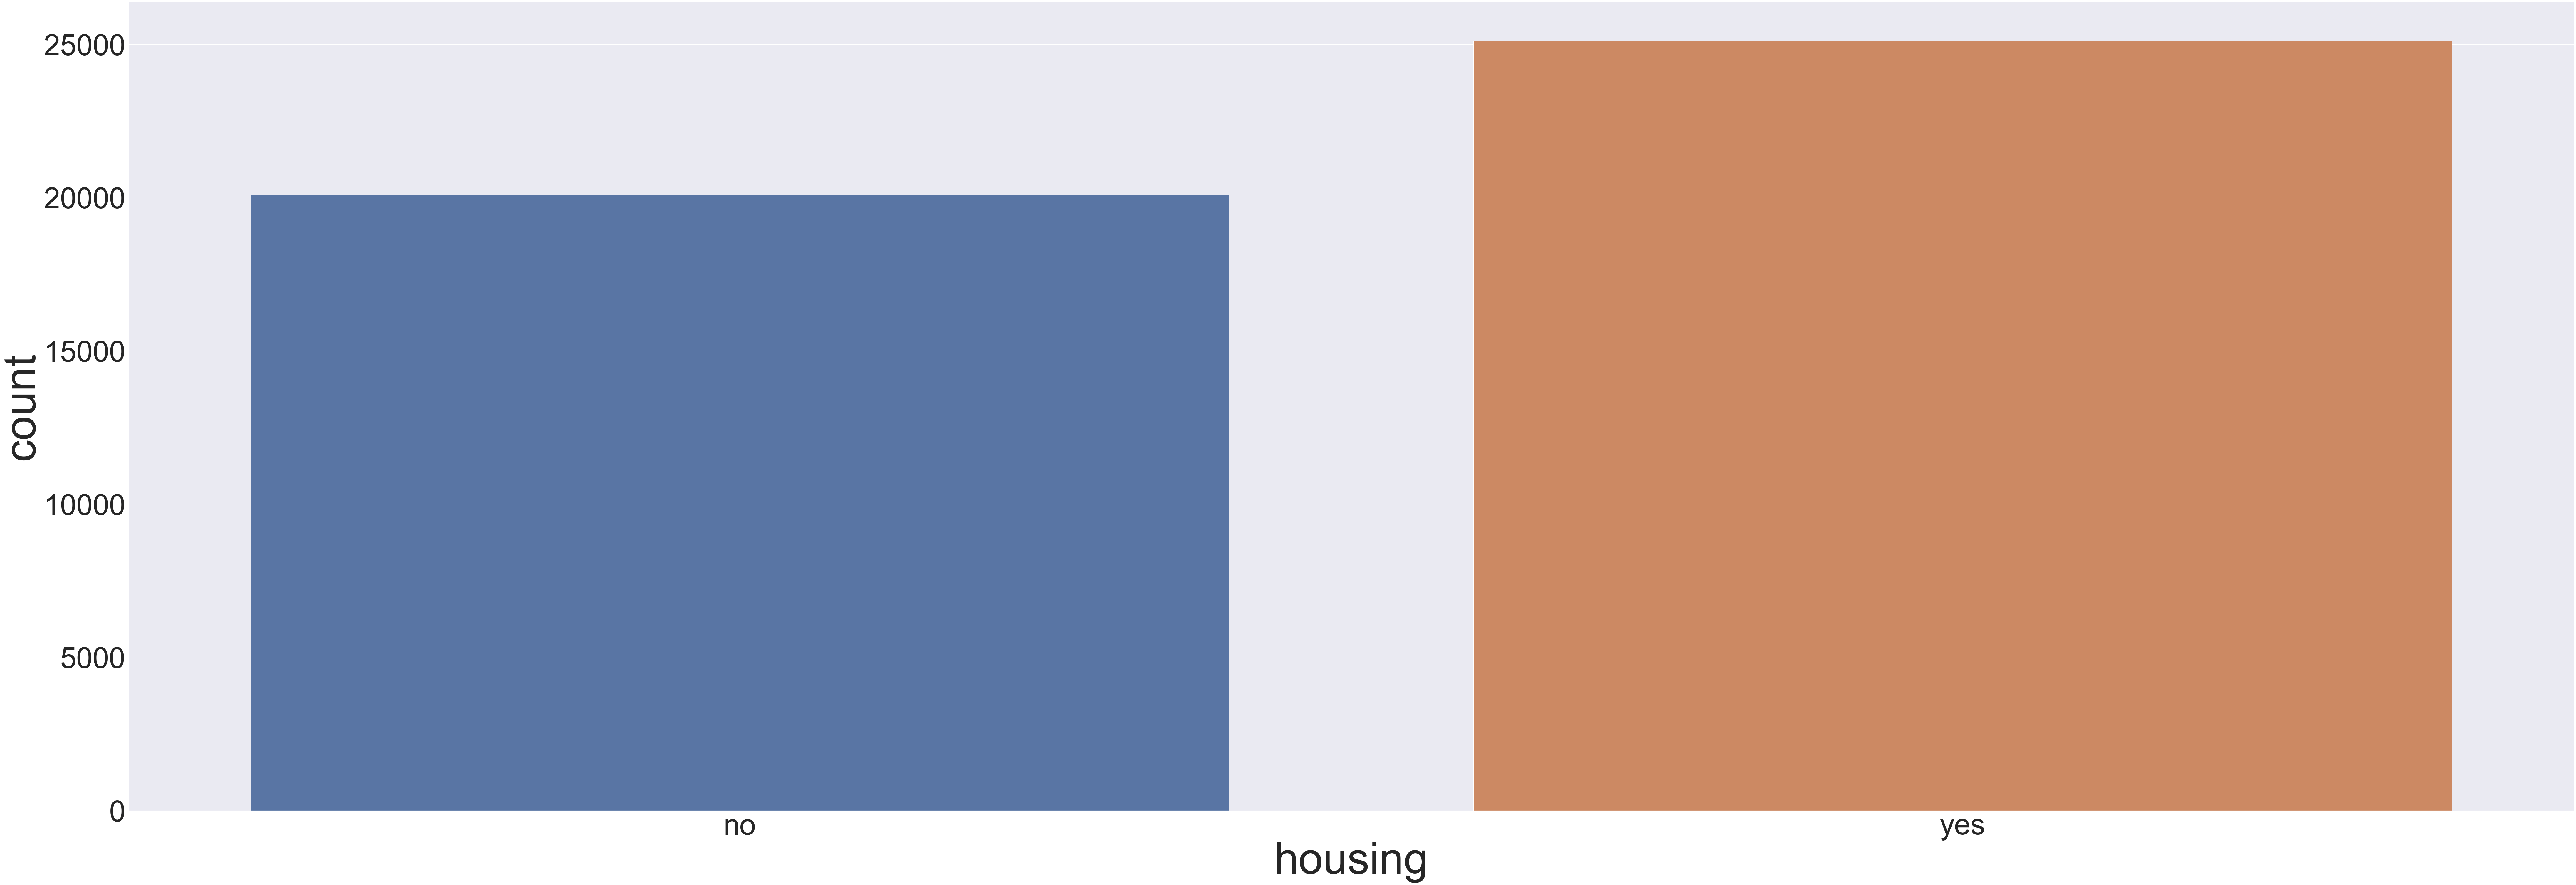

In [83]:
sns.catplot(x='housing', kind='count', data=bankdata , height= 40, aspect = 3);

### plot categorical variable - loan . Majority do not have loan

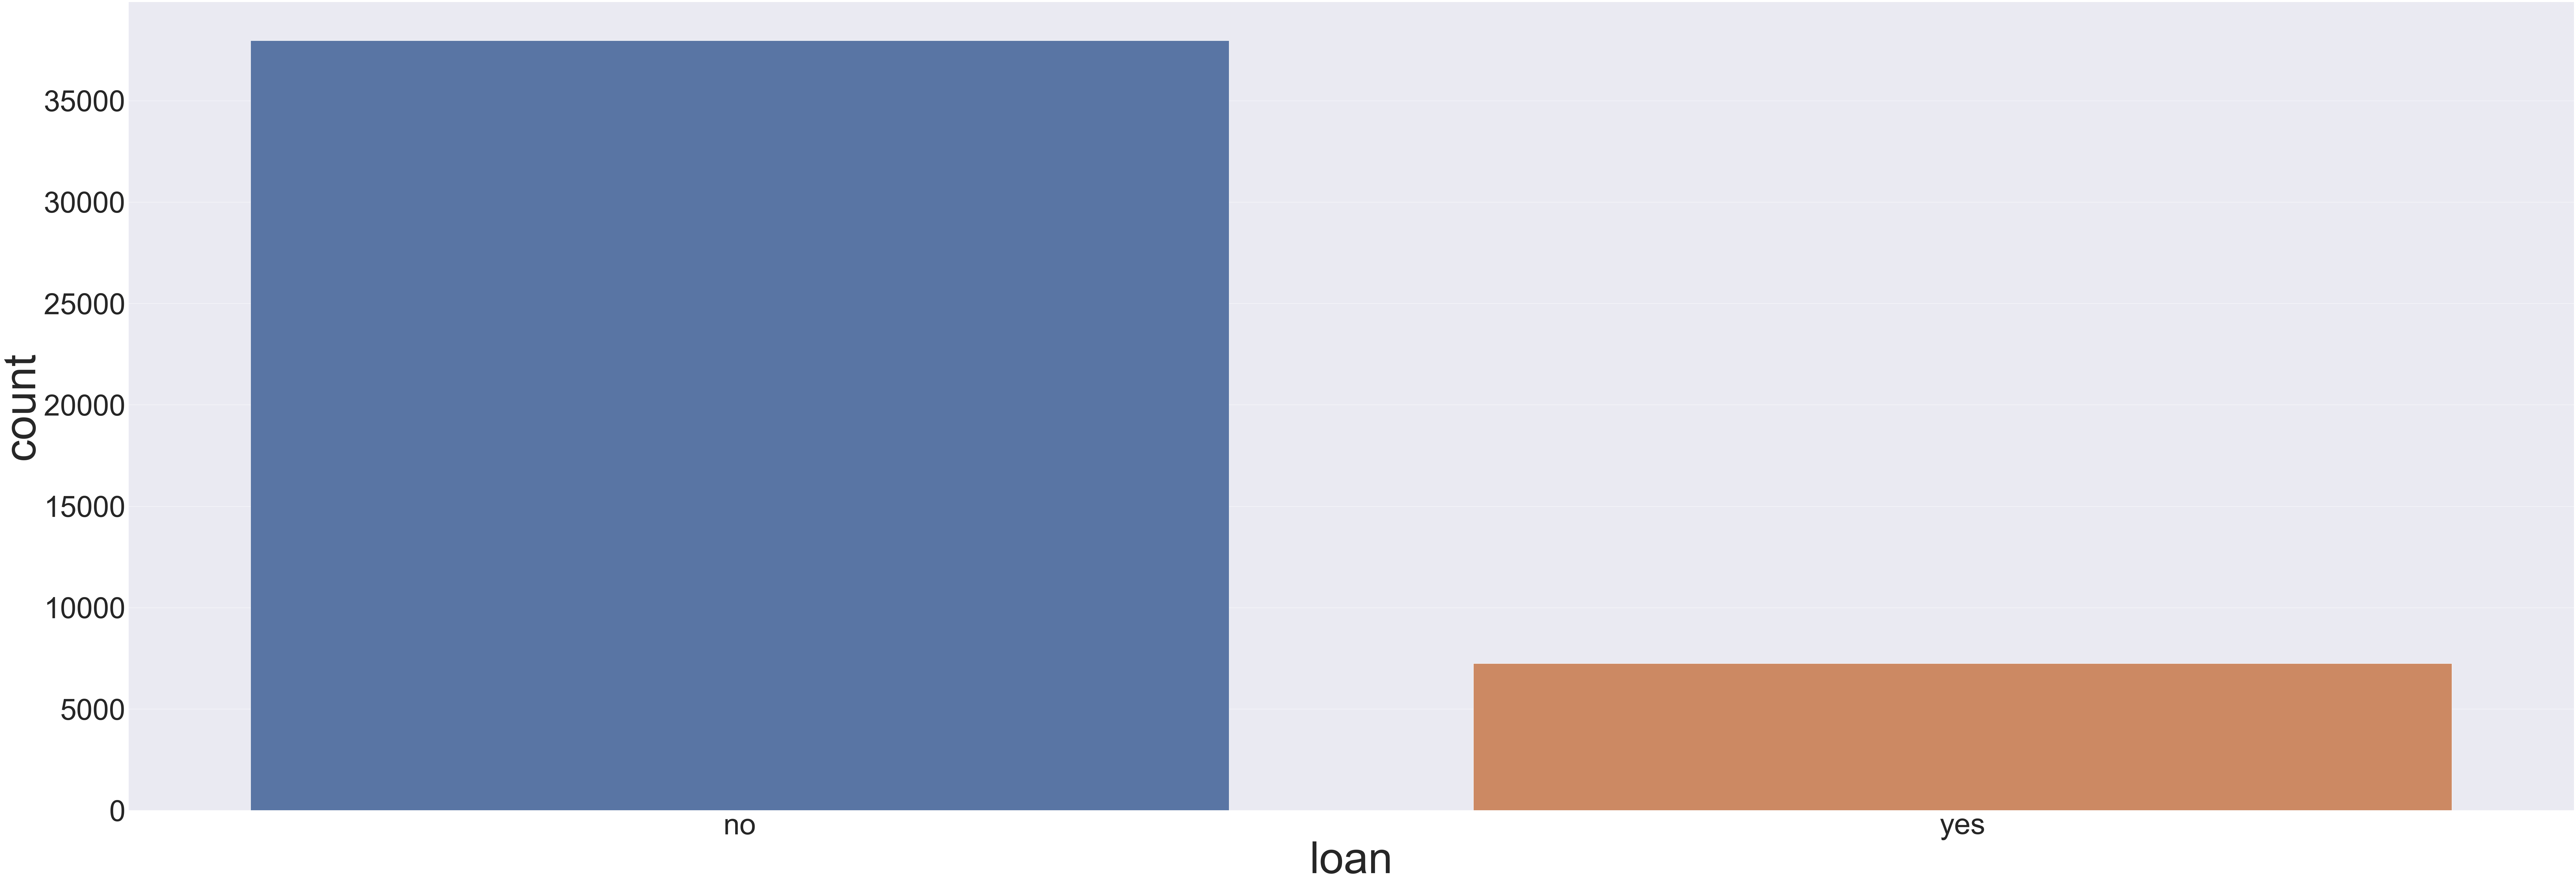

In [84]:
sns.catplot(x='loan', kind='count', data=bankdata , height= 40, aspect = 3);

### plot categorical varaibel - contact . Majority of contact was thru mobile. There was a good number of cases where contact type was unknown. Small percentage were contacted by telephone

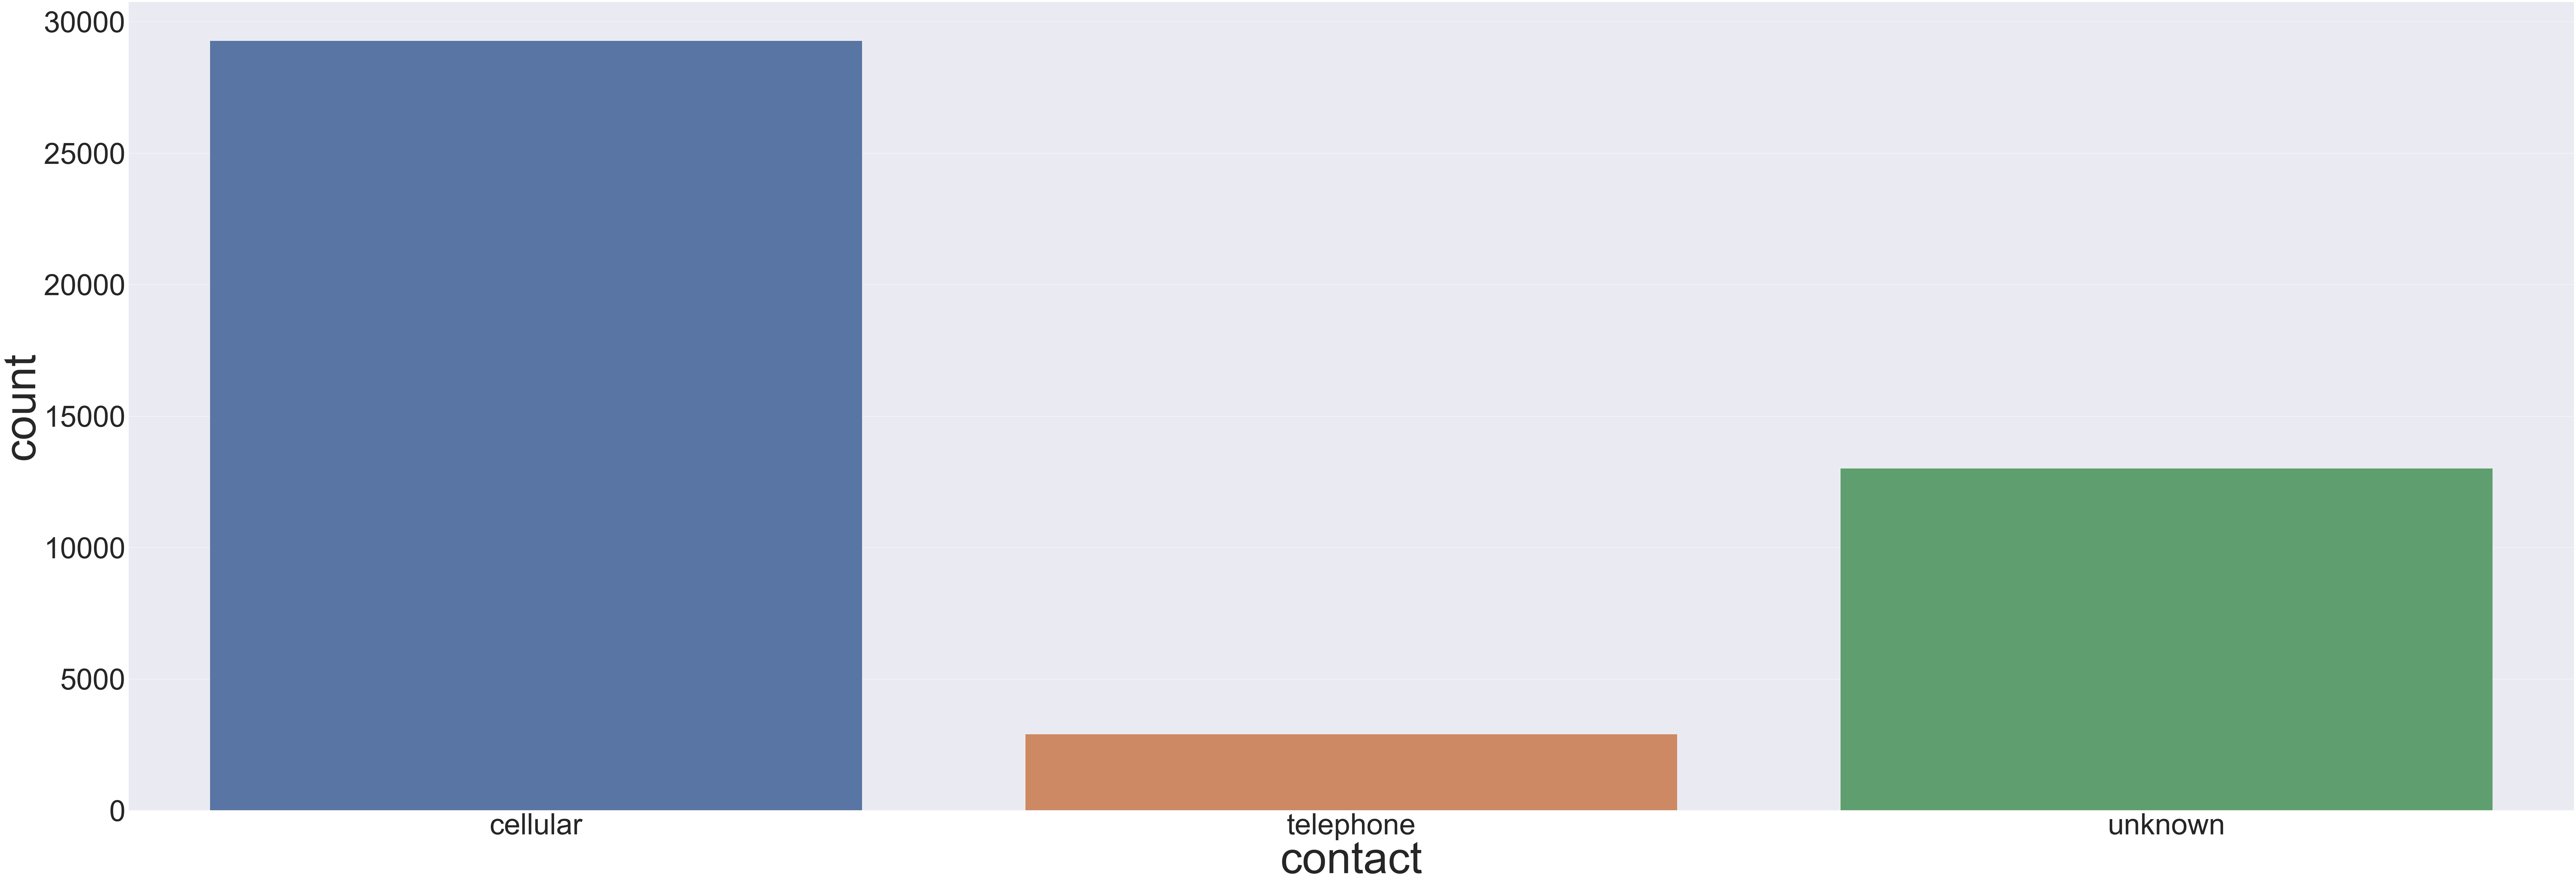

In [85]:
sns.catplot(x='contact', kind='count', data=bankdata , height= 40, aspect = 3);

### plot categorical variabel - month . Max contacts were in month of May , followed by jul , aug and Jun

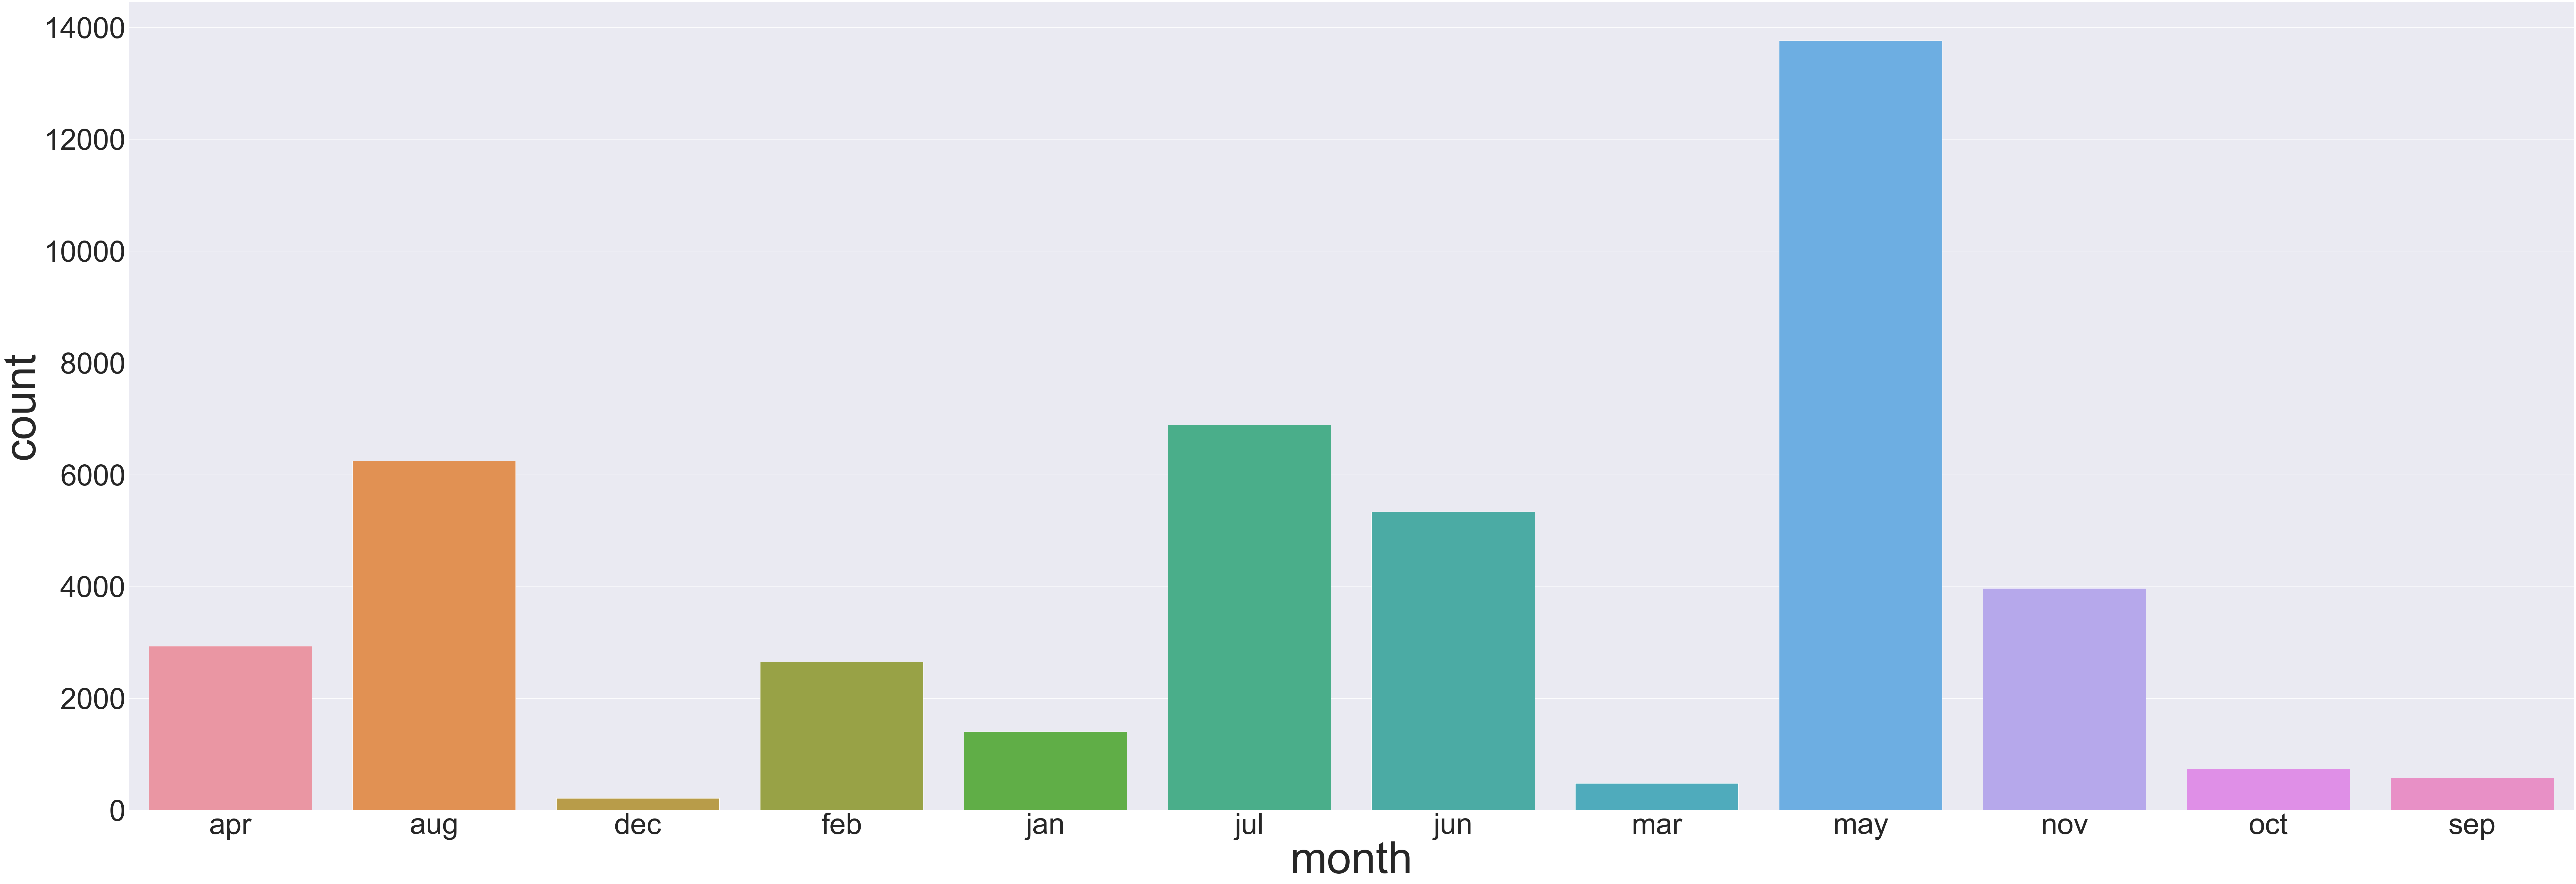

In [86]:
sns.catplot(x='month', kind='count', data=bankdata , height= 40, aspect = 3);

### plot categorical variable - poutcome . Shows that in vast majority of cases , it is not known if last campign succeeded . Thus the model has to be build on the limited count of success and failures recorded from previous campaign

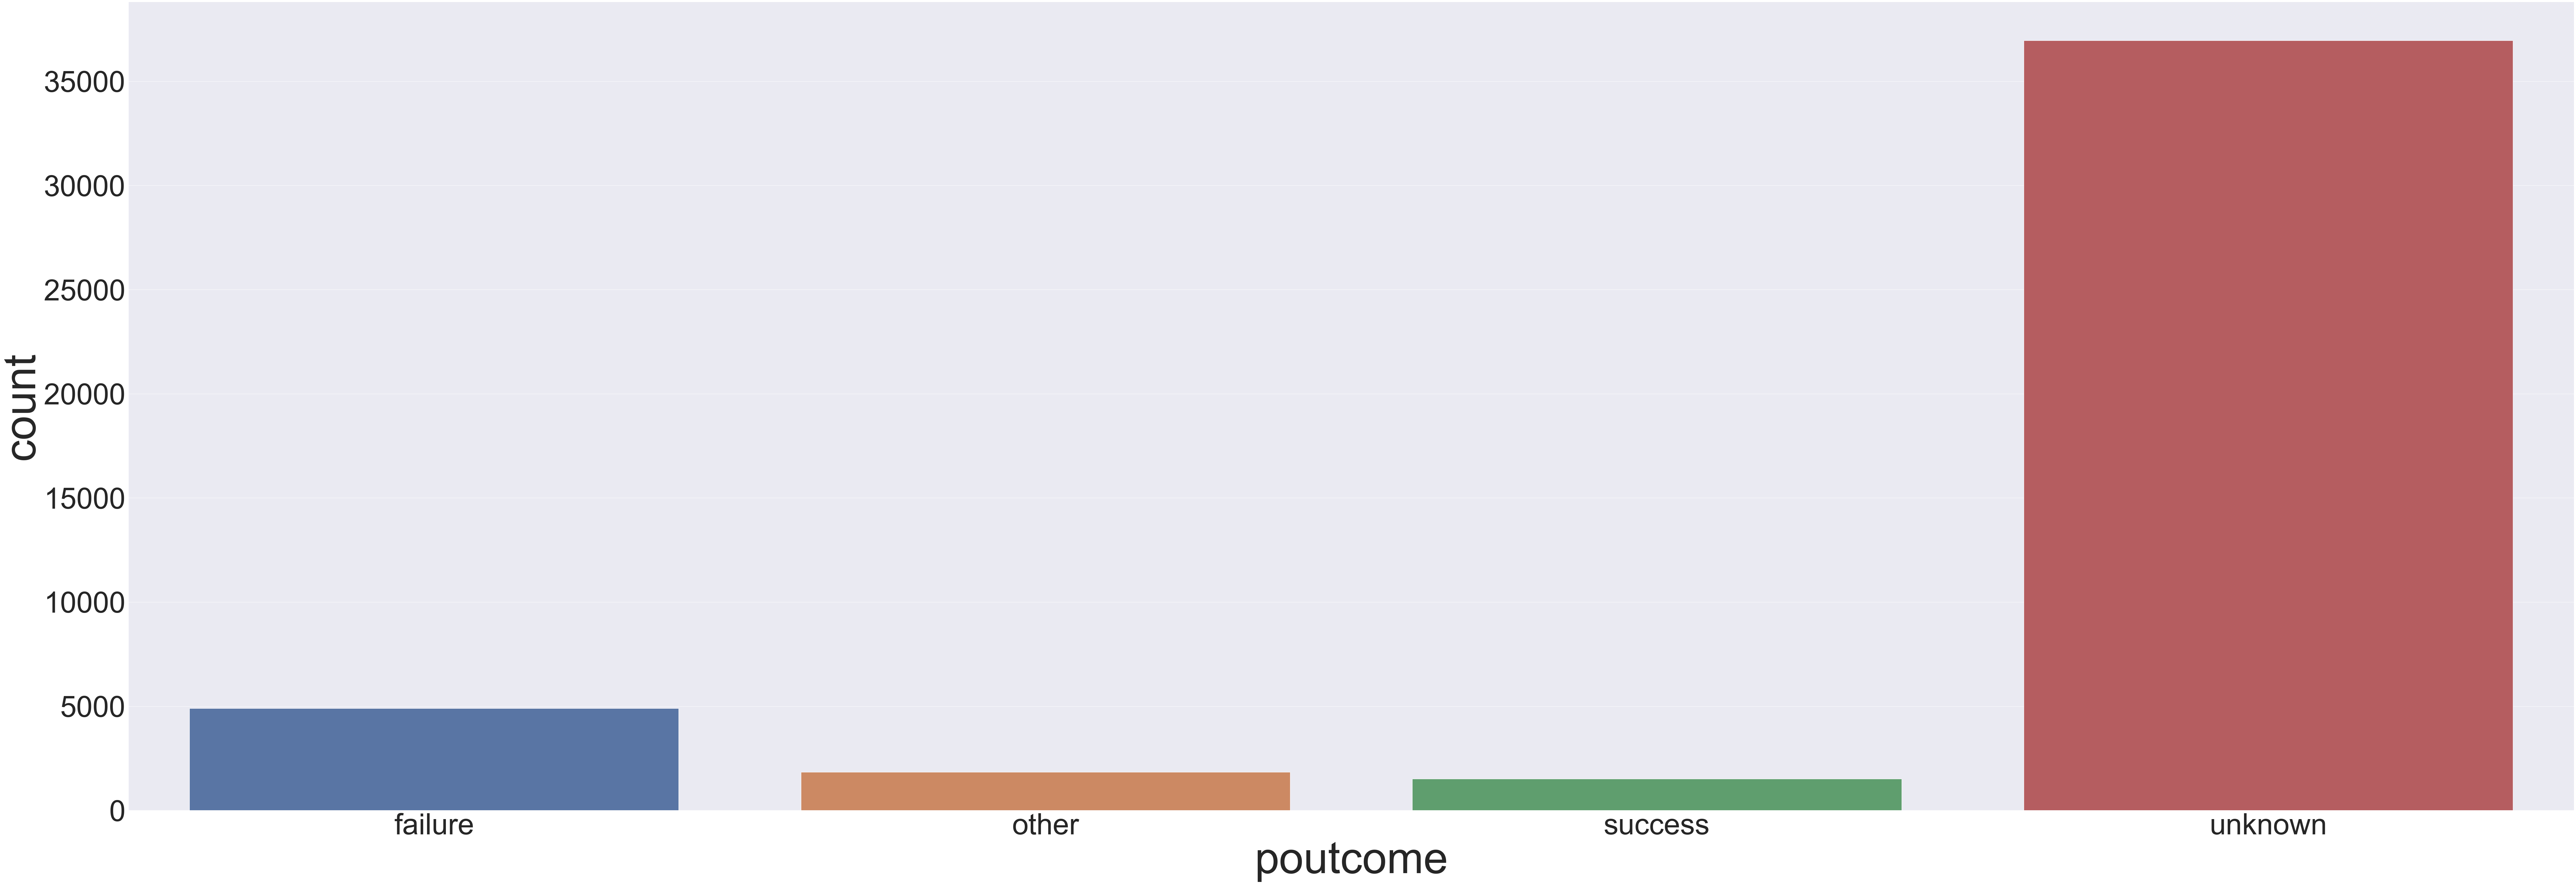

In [87]:
sns.catplot(x='poutcome', kind='count', data=bankdata , height= 40, aspect = 3);

#### It is seen that out of more than 35000 poutcome of 'unknown' , 3386 clients did subscribe to term deposit

In [88]:
bankdata[['poutcome','Target']].where( ( bankdata['poutcome'] == 'unknown' ) & ( bankdata['Target'] == 'yes') ).dropna().count()

poutcome    3386
Target      3386
dtype: int64

#### In percent terms , 9.16% of 'unknown' poutcome did subscribe to term deposit. Conversely, 90.84% persons did not

In [89]:
print(' Percentage of clients who subscribed term deposit , though poutcome was \'unknown\', is :\n', 
     (( bankdata[['poutcome']].where( ( bankdata['poutcome'] == 'unknown' ) & ( bankdata['Target'] == 'yes') ).dropna().count()    )/ 
      ( bankdata[['poutcome']].where( ( bankdata['poutcome'] == 'unknown' ) ).dropna().count()  ))*100 )

 Percentage of clients who subscribed term deposit , though poutcome was 'unknown', is :
 poutcome    9.161503
dtype: float64


### NOTE: check balance negative values , also check base data for age bet 20 and 30 , and balances , before the negative balance replaced with 0, check where pdays = -1 , change to 1000 , since max is 871
Relation between previous campaing and this campaing , use gridsearch and pass various parameters to get best result

### Multi variate Analysis

### Plot for Bi-variate analysis

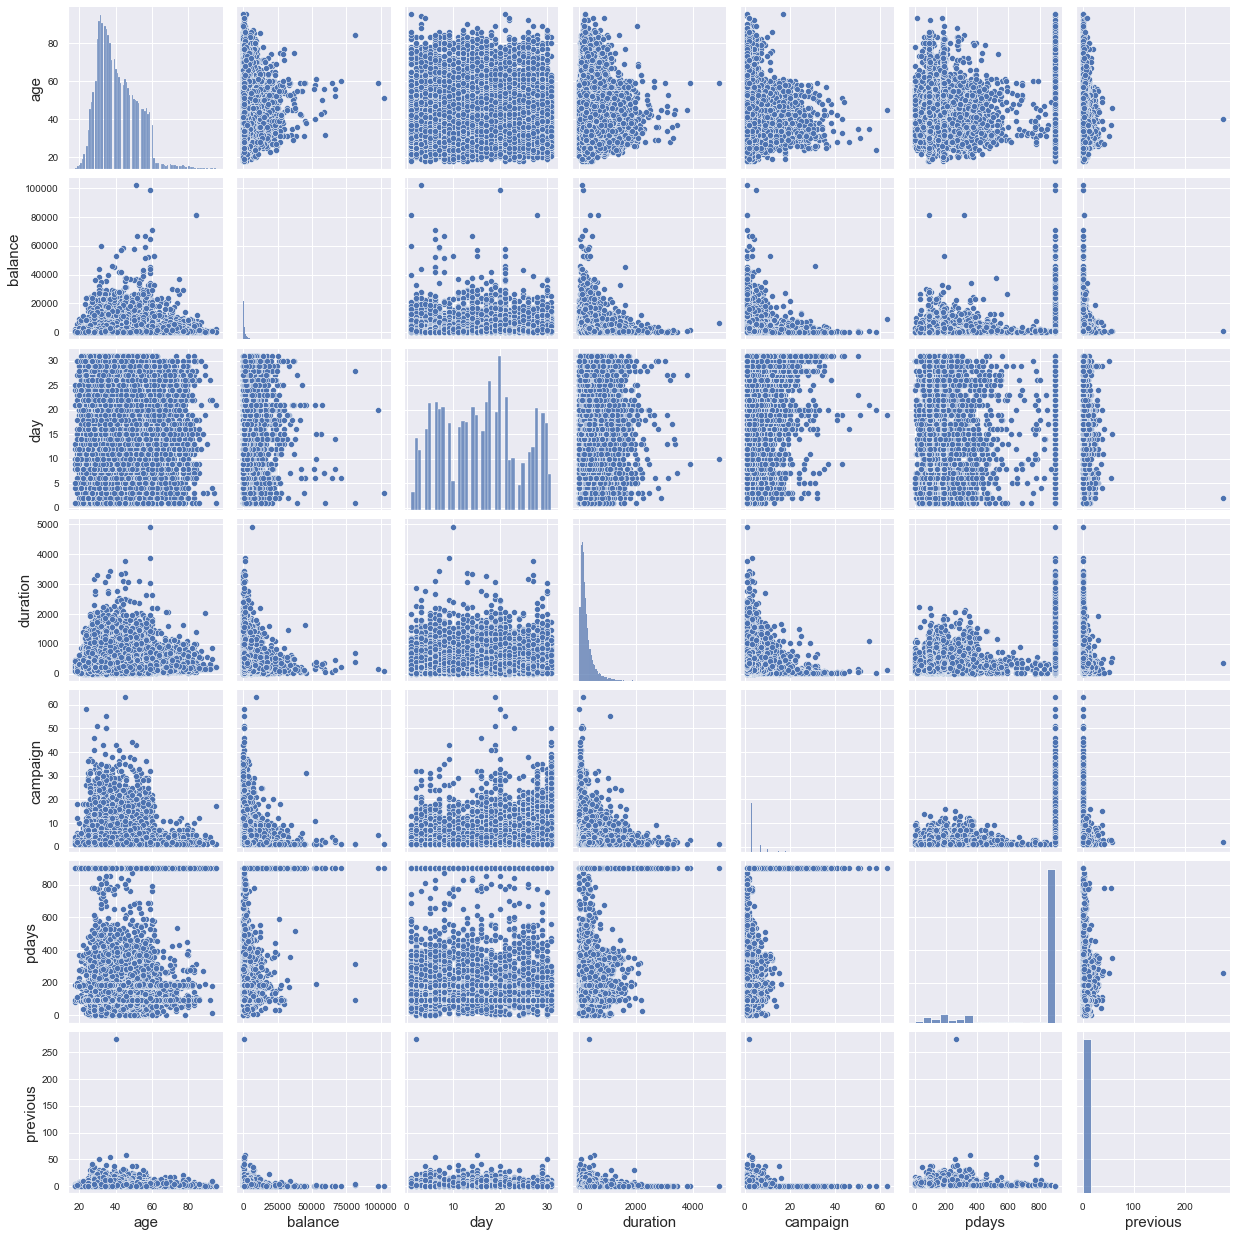

In [90]:
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
sns.pairplot(bankdata)

#### We can see max coorelation between 'campaing' and 'day' , followed by 'pdays' & 'campaign' , for the continous variables.

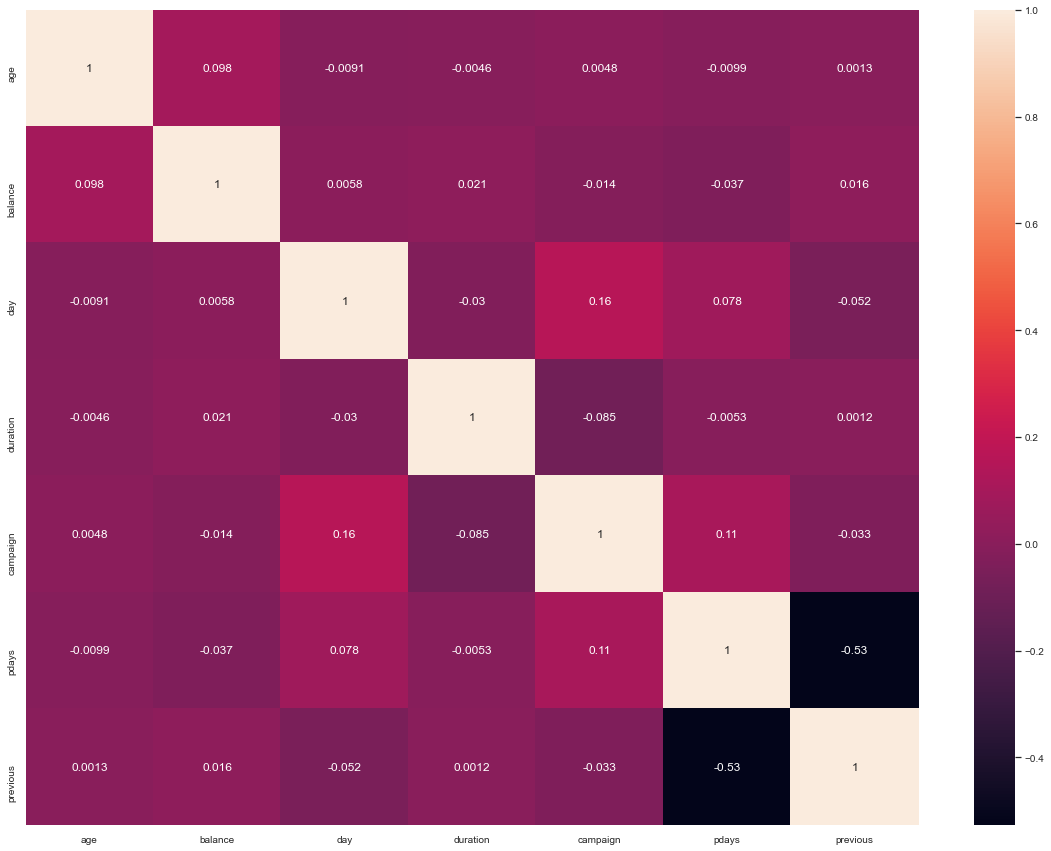

In [91]:
plt.figure(figsize=(20,15))
sns.heatmap(bankdata.corr(), annot=True);

### Check how the Target variable is disctributed

In [92]:
bankdata.groupby('Target').agg({'Target': 'count'})

Target
Target        
no       39922
yes       5289

### Bi-variate analysis between 'Target' and predictor variables

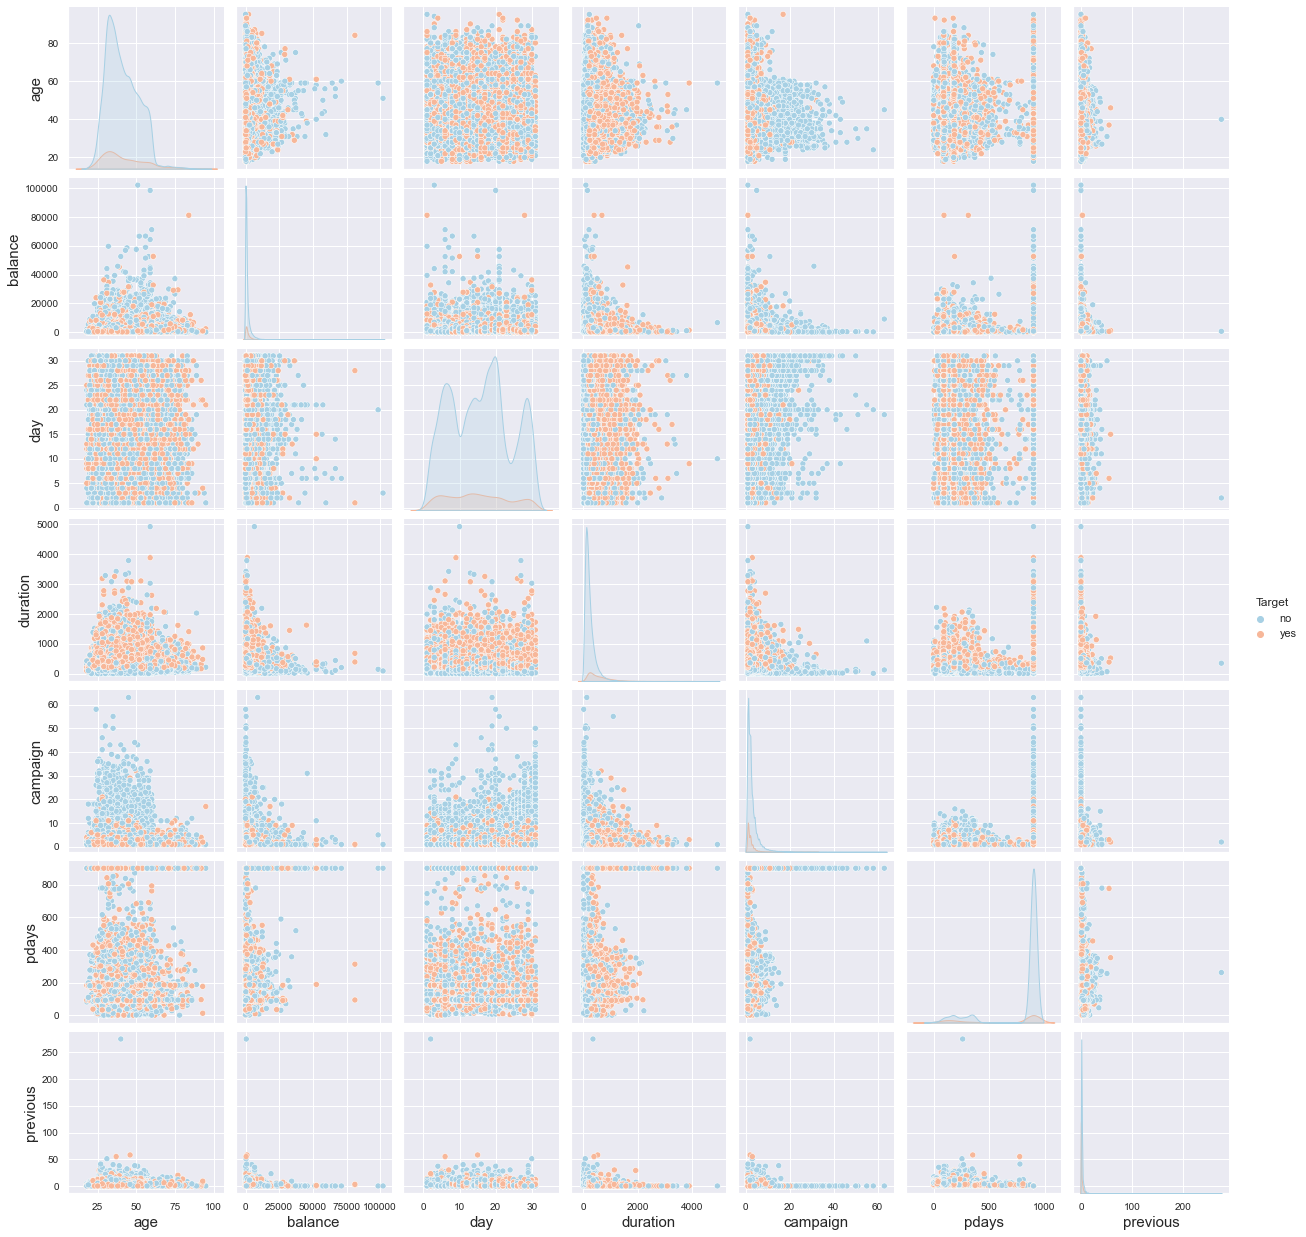

In [93]:
sns.pairplot(bankdata, hue="Target", palette="RdBu_r")

### boxplot with continous variables and Target variable

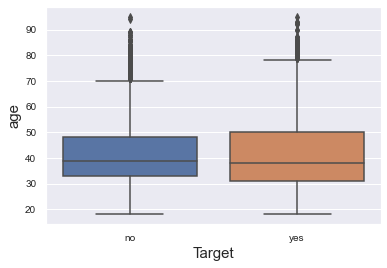

In [94]:
sns.boxplot(y='age', x='Target', data= bankdata);

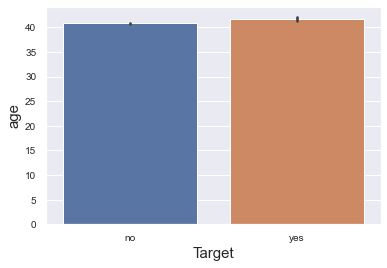

In [95]:
sns.barplot(y='age', x='Target', data=bankdata);

#### plotting balance vs Target . The 'yes' Target class has more balance. However the 'no' class has more outliers.

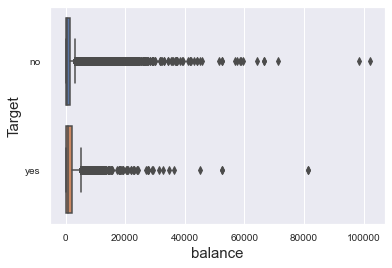

In [96]:
sns.boxplot(x='balance', y='Target', data= bankdata);

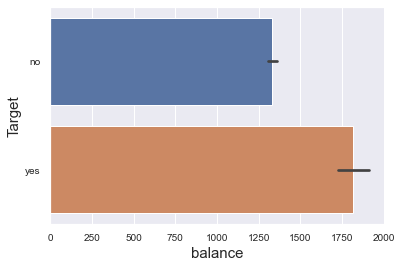

In [97]:
sns.barplot(x='balance', y='Target', data=bankdata);

#### plotting day vs Target. This does not show much varaince between persons who opted for the deposit

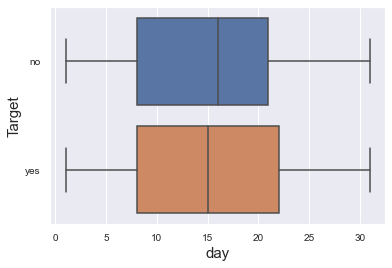

In [98]:
sns.boxplot(x='day', y='Target', data= bankdata);

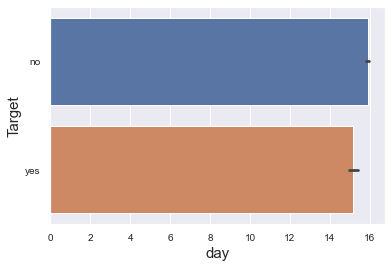

In [99]:
sns.barplot(x='day', y='Target', data=bankdata);

#### plotting duration vs Target . The duration (contact in secs) is higher for persons who did opt for the term deposit. The max as well as the 25% to 75% quartile is higher for the 'yes' class. Outliers are more for the 'no' class

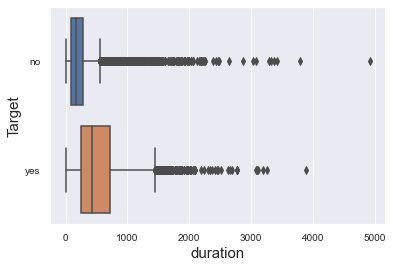

In [100]:
sns.boxplot(x='duration', y='Target', data= bankdata);

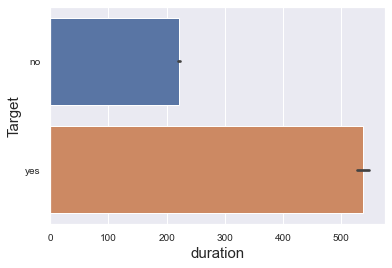

In [101]:
sns.barplot(x='duration', y='Target', data=bankdata);

#### plotting campaign vs Target . The quartile are similar for the 'campaign' variable , both in yes and no class. However , there are more outliers in the 'no' class. Hence , it can be inferred that more that normal contacts (outliers) were initiated for those clients that did not subscribe to Term deposit. 

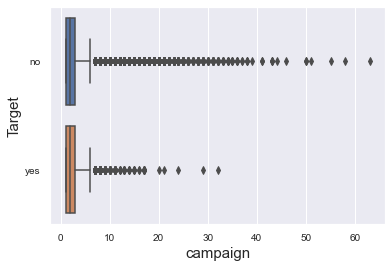

In [102]:
sns.boxplot(x='campaign', y='Target', data= bankdata);

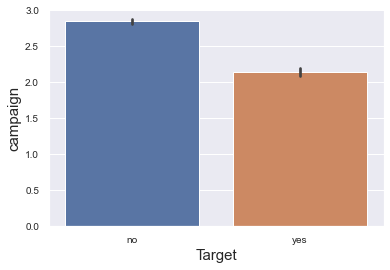

In [103]:
sns.barplot(y='campaign', x='Target', data=bankdata);

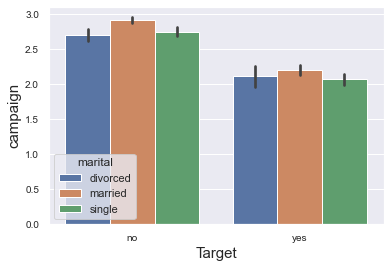

In [104]:
sns.barplot(y='campaign', x='Target', hue='marital', data=bankdata);

In [105]:
bankdata['pdays'].where(bankdata['Target']=='yes').max()

900.0

#### plotting pdays vs Target . 

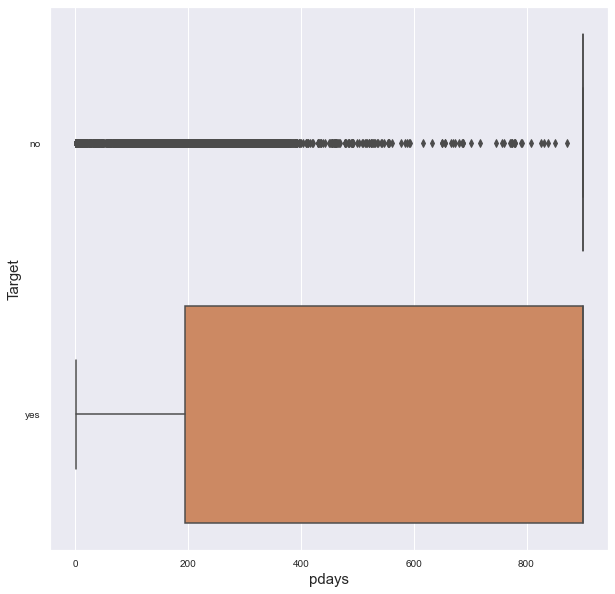

In [106]:
plt.figure(figsize=(10,10))
sns.boxplot(x='pdays', y='Target', data= bankdata);

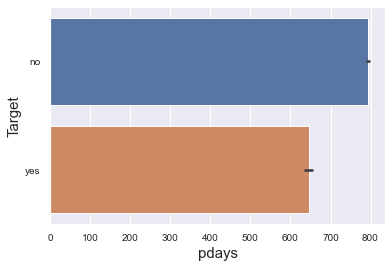

In [107]:
sns.barplot(x='pdays', y='Target', data=bankdata);

#### plotting 'previous' vs Target

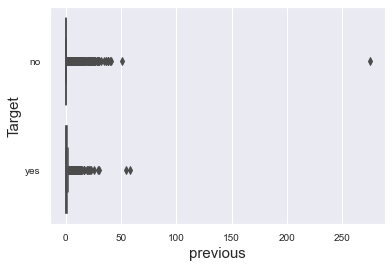

In [108]:
sns.boxplot(x='previous', y='Target', data= bankdata);

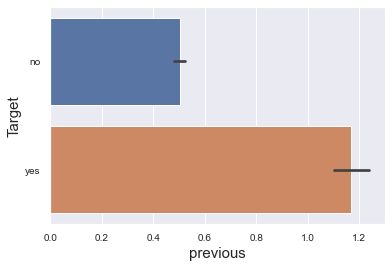

In [109]:
sns.barplot(x='previous', y='Target', data=bankdata);

#### plotting day vs Target . Both classes yes/no show similar statistics values

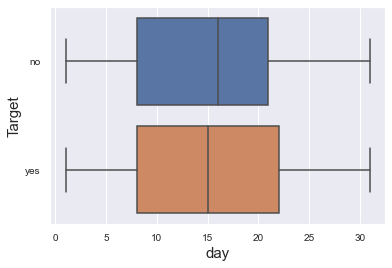

In [110]:
sns.boxplot(x='day', y='Target', data= bankdata);

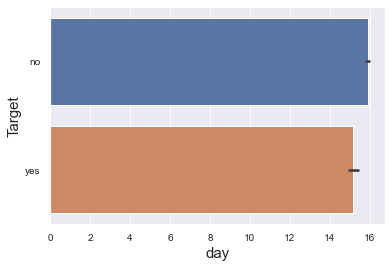

In [111]:
sns.barplot(x='day', y='Target', data=bankdata);

### Plotting categorical variable vs Target 

#### Plotting job vs Target. We find that 'management' job has the max 'yes' for the deposit , followed by 'technician'. Though blue-collar has more job counts , the 'yes' for deposit is similar in number of 'technician' job. 'housemaid' has the lowest of 'yes' cases

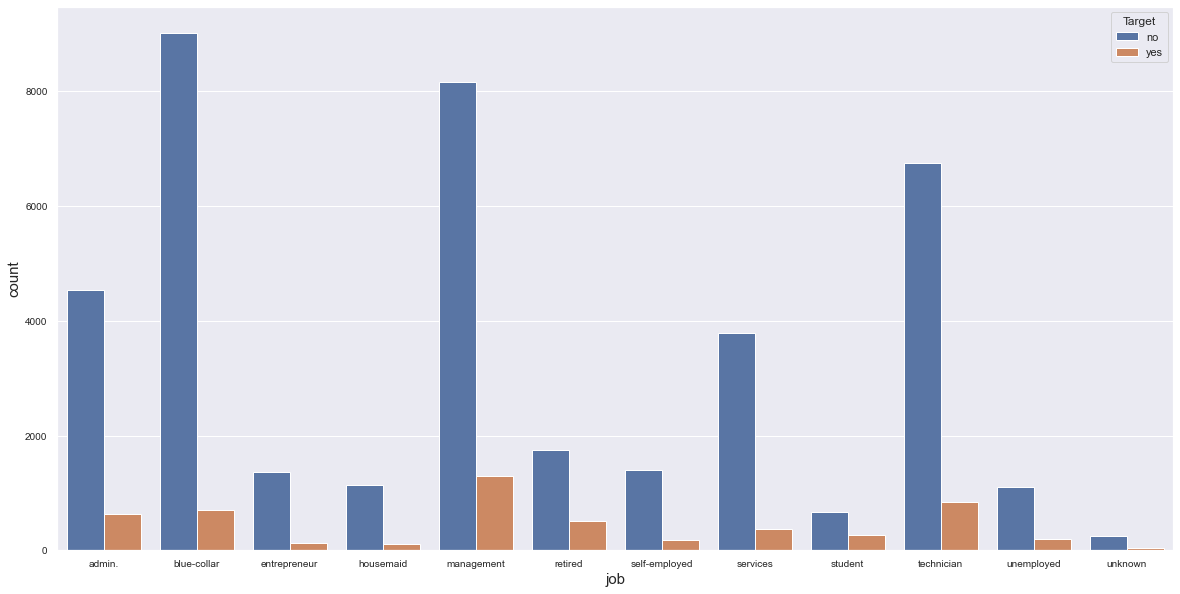

In [112]:
plt.figure(figsize=(20,10))
sns.countplot( x='job', data=bankdata, hue='Target');

#### Plotting 'marital' status vs Target. It is seen that married persons have higher cases of 'yes' to deposit, with least being 'divorced' persons

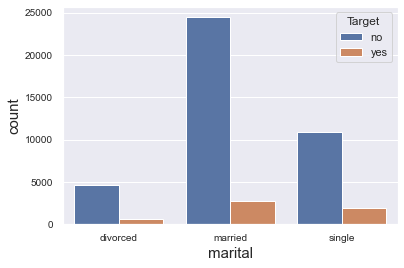

In [113]:
sns.countplot(x='marital', hue='Target', data= bankdata);

#### Term deposit cases are yes most , in case of persons with secondary education. It is least where education is unknown

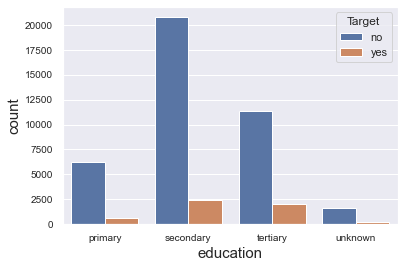

In [114]:
sns.countplot(x='education', hue='Target', data= bankdata);

#### It is seen that where persons had defaulted , no Term deposit was subscribed. 

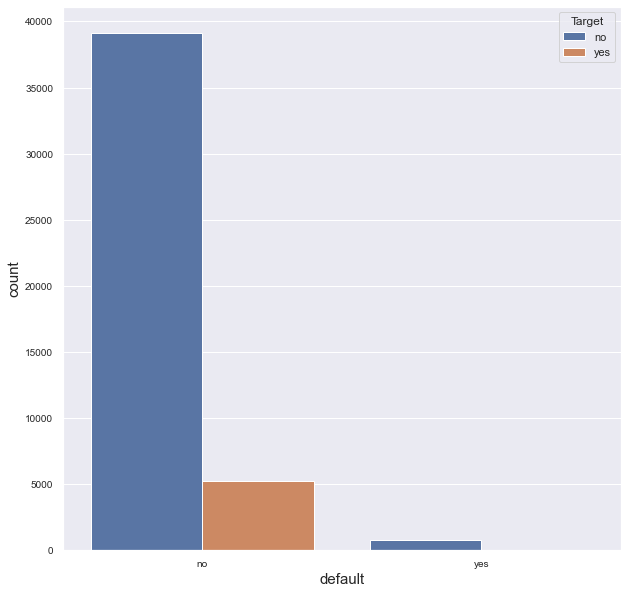

In [115]:
plt.figure(figsize = (10,10))
sns.countplot(x='default', hue='Target', data= bankdata);

#### More Term deposit were subscribed  , to those persons who did not own a house

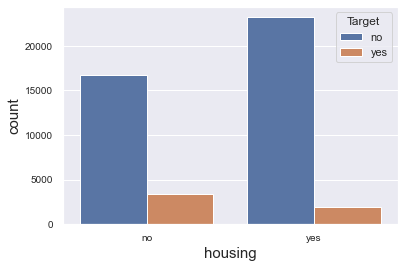

In [116]:
sns.countplot(x='housing', hue='Target', data= bankdata);

#### Much More Term deposit were subscribed  , to those persons who did not have a loan

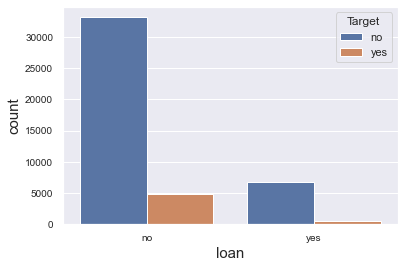

In [117]:
sns.countplot(x='loan', hue='Target', data= bankdata);

#### Percentage of persons who subscribed to Term deposit , were similar , when contacted by mobile or by telephone, though mobile mode produced a 1.5% better outcome

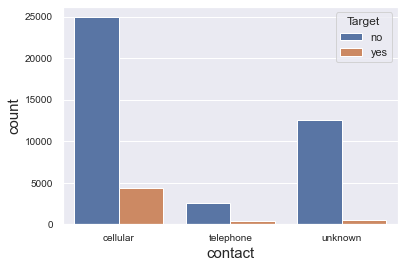

In [118]:
sns.countplot(x='contact', hue='Target', data= bankdata);

In [119]:
cellular_yes = bankdata['contact'].where( (bankdata['contact'] == 'cellular') & ( bankdata['Target'] == 'yes')  ).count()
cellular = bankdata['contact'].where( (bankdata['contact'] == 'cellular')).count()
print('Percent of yes based on cellular contact mode is ', (cellular_yes/cellular)*100, '\n' )

telephone_yes = bankdata['contact'].where( (bankdata['contact'] == 'telephone') & ( bankdata['Target'] == 'yes')  ).count()
telephone = bankdata['contact'].where( (bankdata['contact'] == 'telephone')).count()
print('Percent of yes based on telephone contact mode is ', (telephone_yes/telephone)*100, '\n' )

Percent of yes based on cellular contact mode is  14.918900460986853 

Percent of yes based on telephone contact mode is  13.420509291121817 



#### In months of mar , sep , oct & dec , distribution was almost equal ,between  persons who subscribed to terms laons & those who did not. The month of may shows the max variance where a vast majority of persons did not subscribe to term loans. Similar case in months of jun , jul & aug . Indicates that months of mar , sep , oct & dec , are better for Term deposit campaign

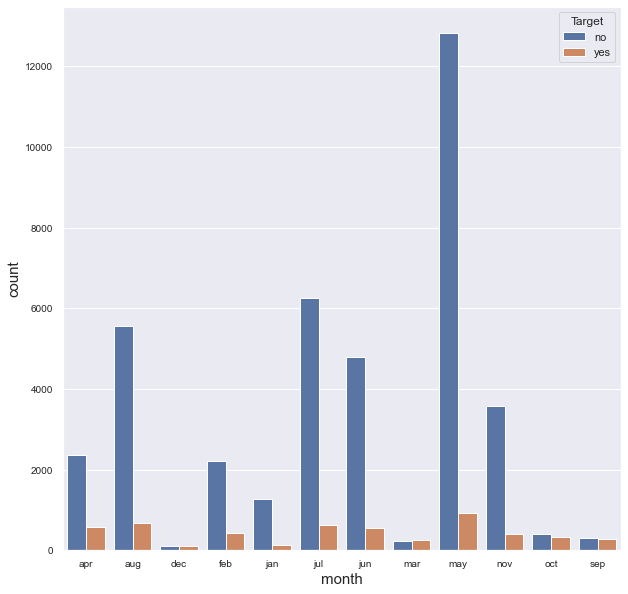

In [120]:
plt.figure(figsize = (10,10))
sns.countplot(x='month', hue='Target', data= bankdata);

#### As a proportion of persons subscribing to term loan , days 1, 10 & 30 are seen to have higher numbers , when comparing totoal number of persons contacted on each day . Note that day is not taken as categorical variable , though it has fixed number of values , 1 to 31

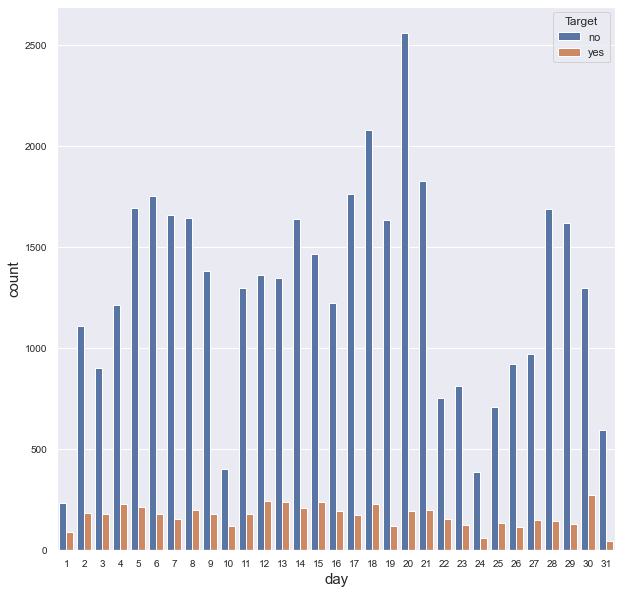

In [121]:
plt.figure(figsize = (10,10))
sns.countplot(x='day', hue='Target', data= bankdata);

#### Plotting previous campaing outcome vs Target shows that max 'yes' cases are where the outcome was tagged as 'unknown' . Also it can be noted that , though previous campaing was tagged as 'success' , in this campaign there are 533 cases of no term deposit being subscribed. Similarly , previous campaign is tagged as 'failure' , but there are 618 cases of 'yes' for Term deposit in current campaign


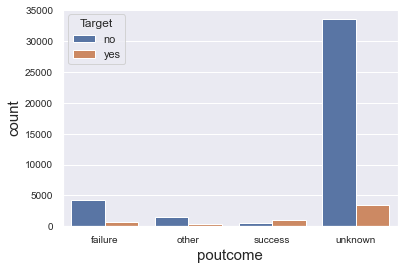

In [122]:
sns.countplot(x='poutcome', hue='Target', data= bankdata);

In [123]:
failure_yes_count = bankdata['poutcome'].where( (bankdata['poutcome'] == 'failure') & ( bankdata['Target'] == 'yes') ).count()
print(' Previous campaign contact noted as failure but Term loan subscribed Yes in current campaign case count is ', failure_yes_count)

 Previous campaign contact noted as failure but Term loan subscribed Yes in current campaign case count is  618


In [124]:
success_no_count = bankdata['poutcome'].where( (bankdata['poutcome'] == 'success') & ( bankdata['Target'] == 'no') ).count()
print(' Previous campaign contact noted as success but Term loan subscribed No in current campaign case count is ', success_no_count)

 Previous campaign contact noted as success but Term loan subscribed No in current campaign case count is  533


###  One hot encoding

In [125]:
bankdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Target'],
      dtype='object')

In [126]:
#pd.set_option('display.max_columns', None)
oneHotCols=["job","marital","education","default","housing", "loan", "contact", "month", "poutcome"]
bankdata = pd.get_dummies(bankdata, columns = oneHotCols)

In [127]:
bankdata.head(20)

age  balance  day  duration  campaign  pdays  previous Target  job_admin.  job_blue-collar  \
0    58     2143    5       261         1    900         0     no           0                0   
1    44       29    5       151         1    900         0     no           0                0   
2    33        2    5        76         1    900         0     no           0                0   
3    47     1506    5        92         1    900         0     no           0                1   
4    33        1    5       198         1    900         0     no           0                0   
5    35      231    5       139         1    900         0     no           0                0   
6    28      447    5       217         1    900         0     no           0                0   
7    42        2    5       380         1    900         0     no           0                0   
8    58      121    5        50         1    900         0     no           0                0   
9    43      593    5        55         1    900         0     no           0                0   
10   41      270    5       222         1    900         0     no           1                0   
11   29      390    5       137         1    900         0     no           1                0   
12   53        6    5       517         1    900         0     no           0                0   
13   58       71    5        71         1    900         0     no           0                0   
14   57      162    5       174         1    900         0     no           0                0   
15   51      229    5       353         1    900         0     no           0                0   
16   45       13    5        98         1    900         0     no           1                0   
17   57       52    5        38         1    900         0     no           0                1   
18   60       60    5       219         1    900         0     no           0                0   
19   33        0    5        54         1    900         0     no           0                0   

    ...  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  poutcome_failure  \
0   ...          0          0          1          0          0          0                 0   
1   ...          0          0          1          0          0          0                 0   
2   ...          0          0          1          0          0          0                 0   
3   ...          0          0          1          0          0          0                 0   
4   ...          0          0          1          0          0          0                 0   
5   ...          0          0          1          0          0          0                 0   
6   ...          0          0          1          0          0          0                 0   
7   ...          0          0          1          0          0          0                 0   
8   ...          0          0          1          0          0          0                 0   
9   ...          0          0          1          0          0          0                 0   
10  ...          0          0          1          0          0          0                 0   
11  ...          0          0          1          0          0          0                 0   
12  ...          0          0          1          0          0          0                 0   
13  ...          0          0          1          0          0          0                 0   
14  ...          0          0          1          0          0          0                 0   
15  ...          0          0          1          0          0          0                 0   
16  ...          0          0          1          0          0          0                 0   
17  ...          0          0          1          0          0          0                 0   
18  ...          0          0          1          0          0          0                 0   
19  ...          0          0          1     

## Deliverable 2

### 2.1 Check attributes are correct.  We have already changed the attributes in earlier sections. Using info , it can be seen that all attributes are correct

In [128]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  int64   
 1   balance              45211 non-null  int64   
 2   day                  45211 non-null  int64   
 3   duration             45211 non-null  int64   
 4   campaign             45211 non-null  int64   
 5   pdays                45211 non-null  int64   
 6   previous             45211 non-null  int64   
 7   Target               45211 non-null  category
 8   job_admin.           45211 non-null  uint8   
 9   job_blue-collar      45211 non-null  uint8   
 10  job_entrepreneur     45211 non-null  uint8   
 11  job_housemaid        45211 non-null  uint8   
 12  job_management       45211 non-null  uint8   
 13  job_retired          45211 non-null  uint8   
 14  job_self-employed    45211 non-null  uint8   
 15  job_services       

In [129]:
bankdata.describe()

age        balance           day      duration      campaign         pdays  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1388.734069     15.806419    258.163080      2.763841    776.645905   
std       10.618762    3029.530442      8.322476    257.527812      3.098021    265.576597   
min       18.000000       0.000000      1.000000      0.000000      1.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000    900.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000    900.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000    900.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000    900.000000   

           previous    job_admin.  job_blue-collar  job_entrepreneur  ...     month_jun  \
count  45211.000000  45211.000000     45211.000000      45211.000000  ...  45211.000000   
mean       0.580323      0.114375         0.215257          0.032890  ...      0.118135   
std        2.303441      0.318269         0.411005          0.178351  ...      0.322771   
min        0.000000      0.000000         0.000000          0.000000  ...      0.000000   
25%        0.000000      0.000000         0.000000          0.000000  ...      0.000000   
50%        0.000000      0.000000         0.000000          0.000000  ...      0.000000   
75%        0.000000      0.000000         0.000000          0.000000  ...      0.000000   
max      275.000000      1.000000         1.000000          1.000000  ...      1.000000   

          month_mar     month_may     month_nov     month_oct     month_sep  poutcome_failure  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000      45211.000000   
mean       0.010551      0.304483      0.087810      0.016323      0.012807          0.108403   
std        0.102174      0.460193      0.283022      0.126718      0.112441          0.310892   
min        0.000000      0.000000      0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000          0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000          0.000000   
75%        0.000000      1.000000      0.000000      0.000000      0.000000          0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000          1.000000   

       poutcome_other  poutcome_success  poutcome_unknown  
count    45211.000000      45211.000000      45211.000000  
mean         0.040698          0.033421          0.817478  
std          0.197592          0.179735          0.386278  
min          0.000000          0.000000          0.000000  
25%          0.000000          0.000000          1.000000  
50%          0.000000          0.000000          1.000000  
75%          0.000000          0.000000          1.000000  
max          1.000000          1.000000          1.000000  

[8 rows x 51 columns]

In [130]:
bankdata['Target'].head(10)

0    no
1    no
2    no
3    no
4    no
5    no
6    no
7    no
8    no
9    no
Name: Target, dtype: category
Categories (2, object): ['no', 'yes']

### 2.2 data has been made model ready by earlier sections like removing negative for pdays ety

### 2.3 Transforming data - Technically , for Decision tree , normalizing is not required. However , for Logistic regression , it is better to normalize. The variables 'balance', 'day', 'duration', 'campaign', 'pdays' & 'previous' are not normally distributed. 'age' data has a normal distribution like character. Normalizing using Min-Max scaling

In [131]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

bankdata1 = bankdata.copy()

scaled_values = min_max_scaler.fit_transform(bankdata1[['age','balance','day','duration','campaign','pdays','previous']])

#print(scaled_values)

bankdata1[['age','balance','day','duration','campaign','pdays','previous']] = scaled_values


In [132]:
target_series = bankdata1['Target'].map(dict(yes=1, no=0))
#print(target_series)
bankdata1['Target'] = target_series

In [133]:
bankdata1.head(20)

age   balance       day  duration  campaign  pdays  previous Target  job_admin.  \
0   0.519481  0.020984  0.133333  0.053070       0.0    1.0       0.0      0           0   
1   0.337662  0.000284  0.133333  0.030704       0.0    1.0       0.0      0           0   
2   0.194805  0.000020  0.133333  0.015453       0.0    1.0       0.0      0           0   
3   0.376623  0.014746  0.133333  0.018707       0.0    1.0       0.0      0           0   
4   0.194805  0.000010  0.133333  0.040260       0.0    1.0       0.0      0           0   
5   0.220779  0.002262  0.133333  0.028264       0.0    1.0       0.0      0           0   
6   0.129870  0.004377  0.133333  0.044124       0.0    1.0       0.0      0           0   
7   0.311688  0.000020  0.133333  0.077267       0.0    1.0       0.0      0           0   
8   0.519481  0.001185  0.133333  0.010167       0.0    1.0       0.0      0           0   
9   0.324675  0.005806  0.133333  0.011183       0.0    1.0       0.0      0           0   
10  0.298701  0.002644  0.133333  0.045140       0.0    1.0       0.0      0           1   
11  0.142857  0.003819  0.133333  0.027857       0.0    1.0       0.0      0           1   
12  0.454545  0.000059  0.133333  0.105124       0.0    1.0       0.0      0           0   
13  0.519481  0.000695  0.133333  0.014437       0.0    1.0       0.0      0           0   
14  0.506494  0.001586  0.133333  0.035380       0.0    1.0       0.0      0           0   
15  0.428571  0.002242  0.133333  0.071777       0.0    1.0       0.0      0           0   
16  0.350649  0.000127  0.133333  0.019927       0.0    1.0       0.0      0           1   
17  0.506494  0.000509  0.133333  0.007727       0.0    1.0       0.0      0           0   
18  0.545455  0.000588  0.133333  0.044530       0.0    1.0       0.0      0           0   
19  0.194805  0.000000  0.133333  0.010980       0.0    1.0       0.0      0           0   

    job_blue-collar  ...  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
0                 0  ...          0          0          1          0          0          0   
1                 0  ...          0          0          1          0          0          0   
2                 0  ...          0          0          1          0          0          0   
3                 1  ...          0          0          1          0          0          0   
4                 0  ...          0          0          1          0          0          0   
5                 0  ...          0          0          1          0          0          0   
6                 0  ...          0          0          1          0          0          0   
7                 0  ...          0          0          1          0          0          0   
8                 0  ...          0          0          1          0          0          0   
9                 0  ...          0          0          1          0          0          0   
10                0  ...          0          0          1          0          0          0   
11                0  ...          0          0          1          0          0          0   
12                0  ...          0          0          1          0          0          0   
13                0  ...          0          0          1          0          0          0   
14                0  ...          0          0          1          0          0          0   
15                0  ...          0          0          1          0          0          0   
16                0  ...          0          0          1          0          0          0   
17                1  ...          0          0          1          0          0          0   
18                0  ...          0          0          1          0          0          0   
19                0  ...          0          0          1          0          0          0   

    poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
0                  0      

In [134]:
bankdata1['campaign'].where( bankdata1['campaign'] > 0).count()

27667

In [135]:
bankdata['campaign'].where( bankdata['campaign'] > 0).count()

45211

In [136]:
pd.set_option('display.max_columns', None)
bankdata1.describe()

age       balance           day      duration      campaign         pdays  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.297873      0.013598      0.493547      0.052494      0.028449      0.862787   
std        0.137906      0.029664      0.277416      0.052364      0.049968      0.295413   
min        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.194805      0.000705      0.233333      0.020943      0.000000      1.000000   
50%        0.272727      0.004387      0.500000      0.036600      0.016129      1.000000   
75%        0.389610      0.013983      0.666667      0.064864      0.032258      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000      1.000000   

           previous    job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
count  45211.000000  45211.000000     45211.000000      45211.000000   45211.000000   
mean       0.002110      0.114375         0.215257          0.032890       0.027427   
std        0.008376      0.318269         0.411005          0.178351       0.163326   
min        0.000000      0.000000         0.000000          0.000000       0.000000   
25%        0.000000      0.000000         0.000000          0.000000       0.000000   
50%        0.000000      0.000000         0.000000          0.000000       0.000000   
75%        0.000000      0.000000         0.000000          0.000000       0.000000   
max        1.000000      1.000000         1.000000          1.000000       1.000000   

       job_management   job_retired  job_self-employed  job_services   job_student  \
count    45211.000000  45211.000000       45211.000000   45211.00000  45211.000000   
mean         0.209197      0.050076           0.034925       0.09188      0.020747   
std          0.406740      0.218105           0.183592       0.28886      0.142538   
min          0.000000      0.000000           0.000000       0.00000      0.000000   
25%          0.000000      0.000000           0.000000       0.00000      0.000000   
50%          0.000000      0.000000           0.000000       0.00000      0.000000   
75%          0.000000      0.000000           0.000000       0.00000      0.000000   
max          1.000000      1.000000           1.000000       1.00000      1.000000   

       job_technician  job_unemployed   job_unknown  marital_divorced  marital_married  \
count    45211.000000    45211.000000  45211.000000      45211.000000     45211.000000   
mean         0.168034        0.028820      0.006370          0.115171         0.601933   
std          0.373901        0.167303      0.079559          0.319232         0.489505   
min          0.000000        0.000000      0.000000          0.000000         0.000000   
25%          0.000000        0.000000      0.000000          0.000000         0.000000   
50%          0.000000        0.000000      0.000000          0.000000         1.000000   
75%          0.000000        0.000000      0.000000          0.000000         1.000000   
max          1.000000        1.000000      1.000000          1.000000         1.000000   

       marital_single  education_primary  education_secondary  education_tertiary  \
count    45211.000000       45211.000000         45211.000000        45211.000000   
mean         0.282896           0.151534             0.513194            0.294198   
std          0.450411           0.358572             0.499831            0.455687   
min          0.000000           0.000000             0.000000            0.000000   
25%          0.000000           0.000000             0.000000            0.000000   
50%          0.000000           0.000000             1.000000            0.000000   
75%          1.000000           0.000000             1.000000            1.000000   
max          1.000000           1.000000             1.000000            1.000000   

       education_unknown    default_no   d

In [137]:
bankdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  float64 
 1   balance              45211 non-null  float64 
 2   day                  45211 non-null  float64 
 3   duration             45211 non-null  float64 
 4   campaign             45211 non-null  float64 
 5   pdays                45211 non-null  float64 
 6   previous             45211 non-null  float64 
 7   Target               45211 non-null  category
 8   job_admin.           45211 non-null  uint8   
 9   job_blue-collar      45211 non-null  uint8   
 10  job_entrepreneur     45211 non-null  uint8   
 11  job_housemaid        45211 non-null  uint8   
 12  job_management       45211 non-null  uint8   
 13  job_retired          45211 non-null  uint8   
 14  job_self-employed    45211 non-null  uint8   
 15  job_services       

### data is ready for model building

### 2.4 Creating Training and Test set

In [138]:
X = bankdata1.drop('Target', axis = 1)
y= bankdata1['Target']
print(X.head())
print(y.head())

        age   balance       day  duration  campaign  pdays  previous  job_admin.  job_blue-collar  \
0  0.519481  0.020984  0.133333  0.053070       0.0    1.0       0.0           0                0   
1  0.337662  0.000284  0.133333  0.030704       0.0    1.0       0.0           0                0   
2  0.194805  0.000020  0.133333  0.015453       0.0    1.0       0.0           0                0   
3  0.376623  0.014746  0.133333  0.018707       0.0    1.0       0.0           0                1   
4  0.194805  0.000010  0.133333  0.040260       0.0    1.0       0.0           0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  \
0                 0              0               1            0                  0             0   
1                 0              0               0            0                  0             0   
2                 1              0               0            0                  0           

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 3)

In [140]:
X_train.head()

age   balance       day  duration  campaign     pdays  previous  job_admin.  \
24103  0.519481  0.003643  0.933333  0.002237  0.000000  1.000000  0.000000           0   
34104  0.103896  0.024509  0.966667  0.024603  0.000000  0.068966  0.007273           0   
14387  0.506494  0.007912  0.433333  0.084791  0.032258  1.000000  0.000000           1   
13641  0.454545  0.000000  0.266667  0.066694  0.032258  1.000000  0.000000           0   
37104  0.480519  0.021258  0.400000  0.064660  0.064516  0.194661  0.003636           0   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  \
24103                0                 0              0               1            0   
34104                0                 0              0               0            0   
14387                0                 0              0               0            0   
13641                0                 0              0               1            0   
37104                0                 0              0               1            0   

       job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  \
24103                  0             0            0               0               0            0   
34104                  0             0            1               0               0            0   
14387                  0             0            0               0               0            0   
13641                  0             0            0               0               0            0   
37104                  0             0            0               0               0            0   

       marital_divorced  marital_married  marital_single  education_primary  education_secondary  \
24103                 1                0               0                  0                    0   
34104                 0                0               1                  0                    0   
14387                 0                1               0                  0                    1   
13641                 0                1               0                  1                    0   
37104                 1                0               0                  0                    0   

       education_tertiary  education_unknown  default_no  default_yes  housing_no  housing_yes  \
24103                   1                  0           1            0           1            0   
34104                   0                  1           1            0           1            0   
14387                   0                  0           1            0           1            0   
13641                   0                  0           1            0           1            0   
37104                   1                  0           1            0           0            1   

       loan_no  loan_yes  contact_cellular  contact_telephone  contact_unknown  month_apr  \
24103        0         1                 0                  0                1          0   
34104        1         0                 1                  0                0          1   
14387        1         0                 1                  0                0          0   
13641        1         0                 1                  0                0          0   
37104        0         1                 0                  1                0          0   

       month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  month_may  \
24103          0          0          0          0          0          0          0          0   
34104          0          0          0          0          0          0          0          0   
14387          0          0          0          0          1          0          0          0   
13641          0          0          0          0          1          0          0          0   
37104          0          0          0          0          0          0          0          1   

   

In [141]:
y_train.head()

24103    1
34104    0
14387    0
13641    0
37104    0
Name: Target, dtype: category
Categories (2, int64): [0, 1]

#### Check percentages in split data. Shows that there is similar distribution of Target class 1/0 in test and train data

In [142]:
train_true_count = y_train.where(y_train == 1).count()
train_false_count = y_train.where(y_train == 0).count()

test_true_count = y_test.where(y_test == 1).count()
test_false_count = y_test.where(y_test == 0).count()

print('True count total in Training dataset is: ', train_true_count , ', which is :{:2.2%}'.format(train_true_count/(train_true_count+train_false_count)) )
print('False count total in Training dataset is: ', train_false_count, ', which is {:2.2%}'.format(train_false_count/(train_true_count+train_false_count)),'\n')

print('True count total in Test dataset is: ', test_true_count , ', which is :{:2.2%}'.format(test_true_count/(test_true_count+test_false_count)) )
print('False count total in Test dataset is: ', test_false_count, ', which is {:2.2%}'.format(test_false_count/(test_true_count+test_false_count)))


True count total in Training dataset is:  3694 , which is :11.67%
False count total in Training dataset is:  27953 , which is 88.33% 

True count total in Test dataset is:  1595 , which is :11.76%
False count total in Test dataset is:  11969 , which is 88.24%


## 3. Logistics , Decision tree and ensemble models section

### 3.1.a Running Logistics model with multiple algorithms

In [143]:
from sklearn.linear_model import LogisticRegression

i = ''
s = ['lbfgs', 'saga', 'sag','liblinear']
t = ['l2'] # ['l1', 'l2', 'elasticnet', 'none']

# creating a results df to hold results of diff regressions run with changing parameters in the models
results_df = pd.DataFrame([[ 'Diff solvers','solver','default','Norm.','penalty','class weight','C value','0', 0 ,0, 0,0,0,0,0]], 
                          columns = ['scenario','solver','Threshold','Normalized','penalty','class weight','C value','solver', 'Training score', 'Testing score', 'ROC AUC', 'Accuracy','Precision (average)', 'Recall', 'F1 (weighted)'])
row_index = 0

for i in s:
    model1 = LogisticRegression(solver = i, class_weight= 'balanced', penalty = 'l2' , max_iter = 10000)
    model1.fit(X_train, y_train)

    # predict on test
    y1_predict = model1.predict(X_test)
    
    model_score_train1 = model1.score( X_train, y_train)
    print( '\033[94m\033[1mModel Score for solver ', i, ' penalty ' ,t, ' for training data is : \033[0m', model_score_train1)
    model_score_test1 = model1.score( X_test, y_test)
    print(  '\033[94m\033[1mModel Score for solver ', i, ' penalty ', t, ' for test data is : \033[0m', model_score_test1)
    roc_auc_score(y_test, model1.predict_proba(X_test)[:,1])
    print( '\033[94m\033[1mROC AUC value is : \033[0m', roc_auc_score(y_test, model1.predict_proba(X_test)[:,1]))
    
    print('\033[94m\033[1mThe y_predict ACCURACY score with Testing data for model,', 'with solver',i, 
          '& penalty', t, 'is : \033[0m' , metrics.accuracy_score( y_test , y1_predict))

    print('\033[94m\033[1mThe PRECISION score for model,',  'with solver ',i,
          ' and penalty ', t,' is \033[0m', metrics.average_precision_score( y_test, y1_predict) )

    print('\033[94m\033[1mThe RECALL score for model, ', 'with solver ',i, 
          ' and penalty ', t,' is \033[0m'  , metrics.recall_score( y_test, y1_predict) )
    print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y_test, y1_predict, average='weighted') , '\n')
    
    row_index = row_index + 1
    
    results_df_data = ['solver + penalty',i,'default','Normalized',t,'balanced','default',i,model_score_train1,model_score_test1,roc_auc_score(y_test, model1.predict_proba(X_test)[:,1]), metrics.accuracy_score( y_test , y1_predict),
                      metrics.average_precision_score( y_test, y1_predict),metrics.recall_score( y_test, y1_predict), 
                       metrics.f1_score( y_test, y1_predict, average='weighted') ]
    #print(row_index)
    #print(results_df)
    #print(results_df_data)
    results_df.loc[row_index] = results_df_data

print('Dataframe of results :\n', results_df)

Model Score for solver  lbfgs  penalty  ['l2']  for training data is :  0.8457989698865611
Model Score for solver  lbfgs  penalty  ['l2']  for test data is :  0.8472427012680626
ROC AUC value is :  0.9134562614863738
The y_predict ACCURACY score with Testing data for model, with solver lbfgs & penalty ['l2'] is :  0.8472427012680626
The PRECISION score for model, with solver  lbfgs  and penalty  ['l2']  is  0.3681878939721898
The RECALL score for model,  with solver  lbfgs  and penalty  ['l2']  is  0.8206896551724138
The weighted F1 score for model   is  0.8665648609554799 

Model Score for solver  saga  penalty  ['l2']  for training data is :  0.845735772743072
Model Score for solver  saga  penalty  ['l2']  for test data is :  0.8470952521380124
ROC AUC value is :  0.9134567329236892
The y_predict ACCURACY score with Testing data for model, with solver saga & penalty ['l2'] is :  0.8470952521380124
The PRECISION score for model, with solver  saga  and penalty  ['l2']  is  0.3679637398

#### Collecting Logistics regression results in dataframe , to select the best model

In [144]:
results_df_1 = results_df.sort_values(by = ['ROC AUC' , 'F1 (weighted)', 'Accuracy'], ascending= False)
results_df_1

scenario     solver Threshold  Normalized  penalty  class weight  C value     solver  \
3  solver + penalty        sag   default  Normalized     [l2]      balanced  default        sag   
2  solver + penalty       saga   default  Normalized     [l2]      balanced  default       saga   
4  solver + penalty  liblinear   default  Normalized     [l2]      balanced  default  liblinear   
1  solver + penalty      lbfgs   default  Normalized     [l2]      balanced  default      lbfgs   
0      Diff solvers     solver   default       Norm.  penalty  class weight  C value          0   

   Training score  Testing score   ROC AUC  Accuracy  Precision (average)   Recall  F1 (weighted)  
3        0.846083       0.847243  0.913460  0.847243             0.368188  0.82069       0.866565  
2        0.845736       0.847095  0.913457  0.847095             0.367964  0.82069       0.866451  
4        0.845799       0.847169  0.913456  0.847169             0.368076  0.82069       0.866508  
1        0.845799       0.847243  0.913456  0.847243             0.368188  0.82069       0.866565  
0        0.000000       0.000000  0.000000  0.000000             0.000000  0.00000       0.000000

#### Try with all default parameters

In [145]:
model2 = LogisticRegression(max_iter = 10000)
model2.fit(X_train, y_train)

# predict on test
y_predict2 = model2.predict(X_test)

model_score_train2 = model2.score( X_train, y_train)
print( '\033[94m\033[1mModel Score for Training data , for default solver ', ' for training data is : \033[0m', model_score_train2)
model_score_test2 = model2.score( X_test, y_test) 
print(  '\033[94m\033[1mModel Score for Testing data , for default solver ', ' for test data is : \033[0m', model_score_test2)

roc_auc_score(y_test, model2.predict_proba(X_test)[:,1])
print( '\033[94m\033[1mROC AUC value is : \033[0m', roc_auc_score(y_test,  model2.predict_proba(X_test)[:,1]))

print('\033[94m\033[1mThe y_predict accuracy score for model ', 'is : \033[0m' , metrics.accuracy_score( y_test , y_predict2))

print('\033[94m\033[1mThe precision score for model ', ' is \033[0m', metrics.average_precision_score( y_test, y_predict2) )

print('\033[94m\033[1mThe recall score for model ', ' is \033[0m'  , metrics.recall_score( y_test, y_predict2))

print('\033[94m\033[1mThe weighted F1 score for model ', ' is \033[0m'  , metrics.f1_score( y_test, y_predict2, average='weighted'))

Model Score for Training data , for default solver   for training data is :  0.8999273232849875
Model Score for Testing data , for default solver   for test data is :  0.9041580654674137
ROC AUC value is :  0.9092083493643847
The y_predict accuracy score for model  is :  0.9041580654674137
The precision score for model   is  0.30872954105179606
The recall score for model   is  0.3322884012539185
The weighted F1 score for model   is  0.8889103836130668


#### Choosing to use Logistic Regressor with all default parameters since AUC value is comparable and accuracy & F1 scores are better

In [146]:
cm = metrics.confusion_matrix(y_test, y_predict2, labels=[1,0])
print(cm)

[[  530  1065]
 [  235 11734]]


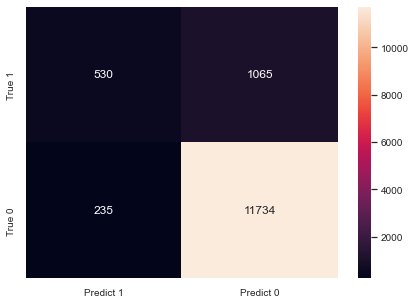

In [147]:
df_cm = pd.DataFrame(cm, index = [i for i in ["True 1", "True 0"]],
                     columns = [i for i in ["Predict 1", "Predict 0"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'd');

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11969
           1       0.69      0.33      0.45      1595

    accuracy                           0.90     13564
   macro avg       0.80      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



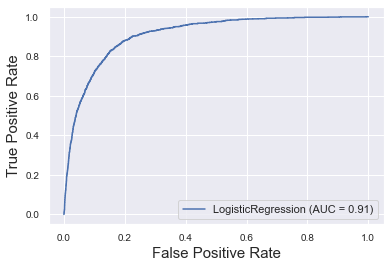

In [149]:
metrics.plot_roc_curve(model2.fit(X_train, y_train), X_test, y_test)
plt.show()

### The selected Logistic Regression model has :
#### 1> Accuracy : 0.90
#### 2> Weighted average precision : 0.89
#### 3> Weighted average recall : 0.90
#### 4> Weighted average F1 scaore : 0.89
#### 5> ROC AUc value is : 0.9092

In [150]:
## Creating  a dataframe to store the score results
m = 'a'
c= 'a'
row_index = 0

class_report_df = pd.DataFrame( [[ m, c, 0, 0, 0, 0,0]],
                              columns = [ 'Model no', 'Classifier','accuracy', 'wa precision','wa recall', 'wa f1 score', 'support'])
# print(class_report_df)
class_report_df.drop(0, inplace= True)
#print(class_report_df)

In [151]:
# results_df_2 = results_df_1['solver'] + results_df_1['Accuracy'] + results_df_1['Precision \(average\)'] +
#                 results_df_1['Recall'] + results_df_1['F1 \(weighted\)'] + results_df_1['solver'] + 

In [152]:
# results_df_2 = results_df_1[['solver', 'Accuracy', 'Precision \(average\)', 'Recall', 'F1 \(weighted\)']] + results_df_1['Accuracy'] + results_df_1['Precision \(average\)'] +
#                 results_df_1['Recall'] + results_df_1['F1 \(weighted\)'] + results_df_1['solver'] + 

In [153]:
class_report = classification_report(y_test, y_predict2 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

m = 'model 2'
c= 'DecisionTree'

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df


Model no    Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1  model 2  DecisionTree  0.904158      0.890452   0.904158      0.88891    13564

### 3.1.b.1  Build Decision Tree

In [154]:
dTree1 = DecisionTreeClassifier(criterion = 'gini', random_state=3)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

In [155]:
print(dTree1.score(X_train, y_train))
print(dTree1.score(X_test, y_test))

1.0
0.8773960483633146


In [156]:
# train_char_label = ['No', 'Yes']
# bank_Tree_File1 = open('bank_tree1.dot','w')
# dot_data1 = tree.export_graphviz(dTree1, out_file=bank_Tree_File1, feature_names = list(X_train), class_names = list(train_char_label))
# bank_Tree_File1.close()

In [157]:
# retCode = system("dot -Tpng bank_tree1.dot -o bank_tree1.png")
# if(retCode>0):
#     print("system command returning error: "+str(retCode))
# else:
#     display(Image("bank_tree1.png"))


0.8773960483633146


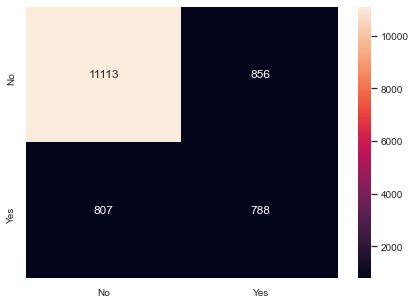

In [158]:
print(dTree1.score(X_test , y_test))
y_predict3 = dTree1.predict(X_test)

cm3=metrics.confusion_matrix(y_test, y_predict3, labels=[0, 1])

df_cm3 = pd.DataFrame(cm3, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm3, annot=True ,fmt='g');

In [159]:
print(classification_report(y_test, y_predict3 , digits = 5))

              precision    recall  f1-score   support

           0    0.93230   0.92848   0.93039     11969
           1    0.47932   0.49404   0.48657      1595

    accuracy                        0.87740     13564
   macro avg    0.70581   0.71126   0.70848     13564
weighted avg    0.87903   0.87740   0.87820     13564



### The decision tree model , with criteria as 'gini' , without pruning , has :
#### 1> Accuracy : 0.8773960483633146
#### 2> Weighted average precision : 0.87903
#### 3> Weighted average recall : 0.87740
#### 4> Weighted average F1 scaore : 0.87820 


In [160]:
class_report = classification_report(y_test, y_predict3 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

m = 'model 3'
c= 'DecisionTree'

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df


Model no    Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1  model 2  DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2  model 3  DecisionTree  0.877396      0.879032   0.877396     0.878198    13564

### 3.1.b.2 Decision Tree using criteria as entropy, without pruning

In [161]:
dTree2 = DecisionTreeClassifier(criterion = 'entropy', random_state=3)
dTree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=3)

In [162]:
print(dTree2.score(X_train, y_train))
print(dTree2.score(X_test, y_test))

1.0
0.8769537009731643


In [163]:
# train_char_label = ['No', 'Yes']
# bank_Tree_File2 = open('bank_tree2.dot','w')
# dot_data2 = tree.export_graphviz(dTree2, out_file=bank_Tree_File2, feature_names = list(X_train), class_names = list(train_char_label))
# bank_Tree_File2.close()

In [164]:
# retCode = system("dot -Tpng bank_tree2.dot -o bank_tree2.png")
# if(retCode>0):
#     print("system command returning error: "+str(retCode))
# else:
#     display(Image("bank_tree2.png"))

0.8769537009731643


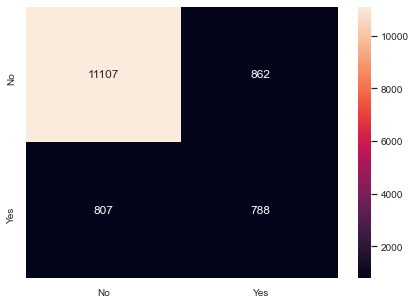

In [165]:
print(dTree2.score(X_test , y_test))
y_predict4 = dTree2.predict(X_test)

cm4=metrics.confusion_matrix(y_test, y_predict4, labels=[0, 1])

df_cm4 = pd.DataFrame(cm4, index = [i for i in ["No", "Yes"]],
                  columns = [i for i in [ "No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm4, annot=True ,fmt='g');

In [166]:
print(classification_report(y_test, y_predict4, digits = 5))

              precision    recall  f1-score   support

           0    0.93226   0.92798   0.93012     11969
           1    0.47758   0.49404   0.48567      1595

    accuracy                        0.87695     13564
   macro avg    0.70492   0.71101   0.70789     13564
weighted avg    0.87880   0.87695   0.87785     13564



### 3.1.b.2 The decision tree model , with criteria as 'entropy' , without pruning , has :
#### 1> Accuracy : 0.8769537009731643
#### 2> Weighted average precision : 0.87880
#### 3> Weighted average recall : 0.87695
#### 4> Weighted average F1 scaore : 0.87785

In [167]:
class_report = classification_report(y_test, y_predict4 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

m = 'model 4'
c= 'DecisionTree'

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df


Model no    Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1  model 2  DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2  model 3  DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3  model 4  DecisionTree  0.876954      0.878797   0.876954     0.877855    13564

### 3.1.b.3 Use gini criteria with class_weight = balanced

In [168]:
dTree3 = DecisionTreeClassifier(criterion = 'gini', class_weight = 'balanced', random_state=3)
dTree3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=3)

In [169]:
print(dTree3.score(X_train, y_train))
print(dTree3.score(X_test, y_test))

1.0
0.8791654379239162


In [170]:
# train_char_label = ['No', 'Yes']
# bank_Tree_File3 = open('bank_tree3.dot','w')
# dot_data3 = tree.export_graphviz(dTree3, out_file=bank_Tree_File3, feature_names = list(X_train), class_names = list(train_char_label))
# bank_Tree_File3.close()

In [171]:
# retCode = system("dot -Tpng bank_tree3.dot -o bank_tree3.png")
# if(retCode>0):
#     print("system command returning error: "+str(retCode))
# else:
#     display(Image("bank_tree3.png"))

0.8791654379239162


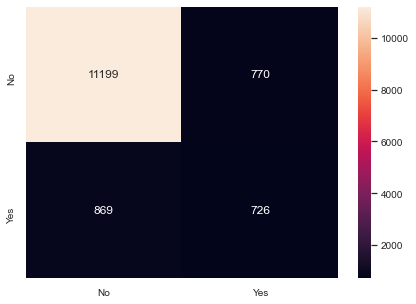

In [172]:
print(dTree3.score(X_test , y_test))
y_predict5 = dTree3.predict(X_test)

cm5=metrics.confusion_matrix(y_test, y_predict5, labels=[0, 1])

df_cm5 = pd.DataFrame(cm5, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm5, annot=True ,fmt='g');

In [173]:
print(classification_report(y_test, y_predict5 , digits = 5))

              precision    recall  f1-score   support

           0    0.92799   0.93567   0.93181     11969
           1    0.48529   0.45517   0.46975      1595

    accuracy                        0.87917     13564
   macro avg    0.70664   0.69542   0.70078     13564
weighted avg    0.87593   0.87917   0.87748     13564



### The decision tree model , with criteria as 'gini' , with balanced class weight , without pruning , has :
#### 1> Accuracy : 0.8796077853140667
#### 2> Weighted average precision : 0.87645
#### 3> Weighted average recall : 0.87961
#### 4> Weighted average F1 scaore : 0.87796

In [174]:
class_report = classification_report(y_test, y_predict5 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

m = 'model 5'
c= 'DecisionTree'

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df


Model no    Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1  model 2  DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2  model 3  DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3  model 4  DecisionTree  0.876954      0.878797   0.876954     0.877855    13564
4  model 5  DecisionTree  0.879165      0.875934   0.879165     0.877479    13564

### 3.1.b.4 Use entropy criteria with class_weight = balanced

In [175]:
dTree4 = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced', random_state=3)
dTree4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=3)

In [176]:
print(dTree4.score(X_train, y_train))
print(dTree4.score(X_test, y_test))

1.0
0.8785019168386906


In [177]:
# train_char_label = ['No', 'Yes']
# bank_Tree_File4 = open('bank_tree4.dot','w')
# dot_data4 = tree.export_graphviz(dTree4, out_file=bank_Tree_File4, feature_names = list(X_train), class_names = list(train_char_label))
# bank_Tree_File4.close()

In [178]:
# retCode = system("dot -Tpng bank_tree4.dot -o bank_tree4.png")
# if(retCode>0):
#     print("system command returning error: "+str(retCode))
# else:
#     display(Image("bank_tree4.png"))

0.8785019168386906


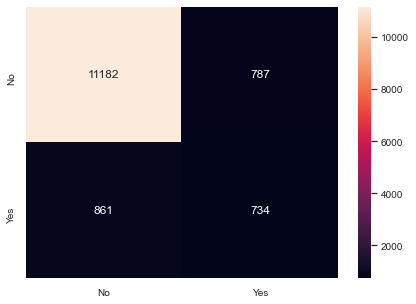

In [179]:
print(dTree4.score(X_test , y_test))
y_predict6 = dTree4.predict(X_test)

cm6=metrics.confusion_matrix(y_test, y_predict6, labels=[0, 1])

df_cm6 = pd.DataFrame(cm6, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm6, annot=True ,fmt='g');

In [180]:
print(classification_report(y_test, y_predict6 , digits = 5))

              precision    recall  f1-score   support

           0    0.92851   0.93425   0.93137     11969
           1    0.48258   0.46019   0.47112      1595

    accuracy                        0.87850     13564
   macro avg    0.70554   0.69722   0.70124     13564
weighted avg    0.87607   0.87850   0.87725     13564



### The decision tree model , with criteria as 'gini' , with balanced class weight , without pruning , has :
#### 1> Accuracy : 0.8790917133588911
#### 2> Weighted average precision : 0.87674
#### 3> Weighted average recall : 0.87909
#### 4> Weighted average F1 scaore : 0.87788

In [181]:
class_report = classification_report(y_test, y_predict6 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

m = 'model 6'
c= 'DecisionTree'

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df


Model no    Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1  model 2  DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2  model 3  DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3  model 4  DecisionTree  0.876954      0.878797   0.876954     0.877855    13564
4  model 5  DecisionTree  0.879165      0.875934   0.879165     0.877479    13564
5  model 6  DecisionTree  0.878502      0.876069   0.878502     0.877246    13564

## 3.2 Building Ensemble models

### 3.2.a Building a model using Bagging, with base estimator

In [182]:
# ## Creating  a dataframe to store the score results
# m = 'a'
# c= 'a'
# row_index = 0

# class_report_df = pd.DataFrame( [[ m, c, 0, 0, 0, 0,0]],
#                               columns = [ 'Model no', 'Classifier','accuracy', 'wa precision','wa recall', 'wa f1 score', 'support'])
# # print(class_report_df)
# class_report_df.drop(0, inplace= True)
# #print(class_report_df)

In [183]:
bank_bag_cl = BaggingClassifier(base_estimator=dTree1, n_estimators=50,random_state=3)

m = 'model 7'
c= 'Bagging Classifier'

bank_bag_cl = bank_bag_cl.fit(X_train, y_train)

Score with train data : 0.9995576199955762
Score with test data : 0.9039368917723385


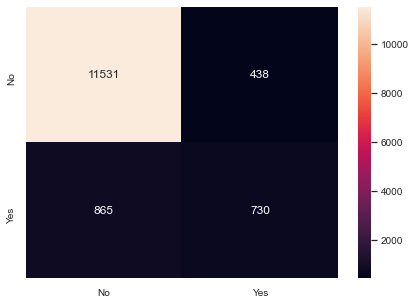

In [184]:
y_predict7 = bank_bag_cl.predict(X_test)

print('Score with train data :',bank_bag_cl.score(X_train , y_train))
print('Score with test data :',bank_bag_cl.score(X_test , y_test))

cm7=metrics.confusion_matrix(y_test, y_predict7,labels=[0, 1])

df_cm7 = pd.DataFrame(cm7, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm7, annot=True ,fmt='g');

In [185]:
print('The model performance metrics are printed below: \n')
print(classification_report(y_test, y_predict7 , digits = 6))

The model performance metrics are printed below: 

              precision    recall  f1-score   support

           0   0.930219  0.963405  0.946522     11969
           1   0.625000  0.457680  0.528411      1595

    accuracy                       0.903937     13564
   macro avg   0.777610  0.710543  0.737466     13564
weighted avg   0.894328  0.903937  0.897356     13564



### The code in the below two cells can be run to plot the tree. However , the genertaed plot consumes memory and exceeds the size that can be uploaded to the site. hence commented out

In [186]:
# classification_report(y_test, y_predict7 , digits = 5)

In [187]:
#class_report_df = pd.DataFrame( [[ m, c, 0, 0, 0, 0,0]],
#                              columns = [ 'Model no', 'Classifier','accuracy', 'wa precision','wa recall', 'wa f1 score', 'support'])
# print(class_report_df)
# class_report_df.drop(0, inplace= True)
# print(class_report_df)

In [188]:
class_report = classification_report(y_test, y_predict7 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df


Model no          Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1  model 2        DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2  model 3        DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3  model 4        DecisionTree  0.876954      0.878797   0.876954     0.877855    13564
4  model 5        DecisionTree  0.879165      0.875934   0.879165     0.877479    13564
5  model 6        DecisionTree  0.878502      0.876069   0.878502     0.877246    13564
6  model 7  Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564

#### 3.2.a Result : Bagging with using base estimator gave us following results:
    accuracy = 0.904306
    wgt av precision = 0.89492
    wgt av recall = 0.904306
    wgt av f1 score = 0.897912

Confusin matrix has also been plotted

### 3.2.b Run model using Bagging , without using base estimator

In [189]:
bank_bag_cl2 = BaggingClassifier( n_estimators=50,random_state=3)

m = 'model 8'
c= 'Bagging Classifier'

bank_bag_cl2 = bank_bag_cl2.fit(X_train, y_train)

Score with train data : 0.9995576199955762
Score with test data : 0.9039368917723385


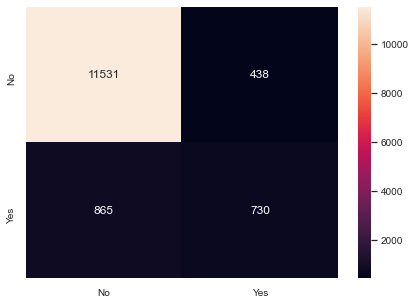

In [190]:
y_predict8 = bank_bag_cl2.predict(X_test)

print('Score with train data :',bank_bag_cl2.score(X_train, y_train))
print('Score with test data :',bank_bag_cl2.score(X_test , y_test))

cm8=metrics.confusion_matrix(y_test, y_predict8,labels=[0, 1])

df_cm8 = pd.DataFrame(cm8, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm8, annot=True ,fmt='g');

In [191]:
print('The model performance metrics are printed below: \n')
print(classification_report(y_test, y_predict8 , digits = 6))

The model performance metrics are printed below: 

              precision    recall  f1-score   support

           0   0.930219  0.963405  0.946522     11969
           1   0.625000  0.457680  0.528411      1595

    accuracy                       0.903937     13564
   macro avg   0.777610  0.710543  0.737466     13564
weighted avg   0.894328  0.903937  0.897356     13564



In [192]:
class_report = classification_report(y_test, y_predict8 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df


Model no          Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1  model 2        DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2  model 3        DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3  model 4        DecisionTree  0.876954      0.878797   0.876954     0.877855    13564
4  model 5        DecisionTree  0.879165      0.875934   0.879165     0.877479    13564
5  model 6        DecisionTree  0.878502      0.876069   0.878502     0.877246    13564
6  model 7  Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
7  model 8  Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564

### 3.2.b Results of running model using Bagging , without using base estimator are as per model 8 figures above. These are:

    accuracy = 0.904306
    wgt av precision = 0.89492
    wgt av recall = 0.904306
    wgt av f1 score = 0.897912

#### Confusion matrix has also been plotted

### 3.2.c  Ensemble Learning - AdaBoosting with base estimator

In [193]:
from sklearn.ensemble import AdaBoostClassifier
bank_ada_cl3 = AdaBoostClassifier(base_estimator = dTree1, n_estimators=50, random_state=3)

m = 'model 9'
c= 'AdaBoosting Classifier'

bank_ada_cl3 = bank_ada_cl3.fit(X_train, y_train)


Score with train data : 1.0
Score with test data : 0.8760690061928634


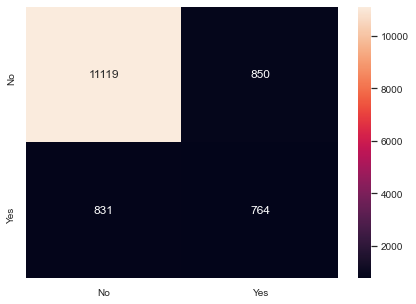

In [194]:
y_predict9 = bank_ada_cl3.predict(X_test)
print('Score with train data :', bank_ada_cl3.score(X_train , y_train))
print('Score with test data :', bank_ada_cl3.score(X_test , y_test))


cm9=metrics.confusion_matrix(y_test, y_predict9,labels=[0, 1])

df_cm9 = pd.DataFrame(cm9, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm9, annot=True ,fmt='g');



In [195]:
print('The model performance metrics are printed below: \n')
print(classification_report(y_test, y_predict9 , digits = 6))

The model performance metrics are printed below: 

              precision    recall  f1-score   support

           0   0.930460  0.928983  0.929721     11969
           1   0.473358  0.478997  0.476161      1595

    accuracy                       0.876069     13564
   macro avg   0.701909  0.703990  0.702941     13564
weighted avg   0.876709  0.876069  0.876387     13564



In [196]:
class_report = classification_report(y_test, y_predict9 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df


Model no              Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1  model 2            DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2  model 3            DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3  model 4            DecisionTree  0.876954      0.878797   0.876954     0.877855    13564
4  model 5            DecisionTree  0.879165      0.875934   0.879165     0.877479    13564
5  model 6            DecisionTree  0.878502      0.876069   0.878502     0.877246    13564
6  model 7      Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
7  model 8      Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
8  model 9  AdaBoosting Classifier  0.876069      0.876709   0.876069     0.876387    13564

### 3.2.c Results of running model using AdBoosting , with using base estimator are as per model 9 figures above. These are:

    accuracy = 0.876511
    wgt av precision = 0.876948
    wgt av recall = 0.876511 	
    wgt av f1 score = 0.876728

#### Confusion matrix has also been plotted

### 3.2.d Ensemble Learning - AdaBoosting without base estimator

In [197]:
from sklearn.ensemble import AdaBoostClassifier
bank_ada_cl5 = AdaBoostClassifier(n_estimators=50, random_state=3)

m = 'model 10'
c= 'AdaBoosting Classifier'

bank_ada_cl5 = bank_ada_cl5.fit(X_train, y_train)


Score with train data : 0.9002749075741776
Score with test data : 0.9031996461220879


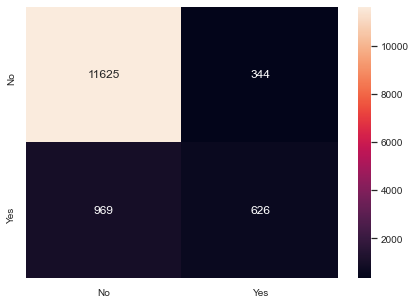

In [198]:
y_predict10 = bank_ada_cl5.predict(X_test)
print('Score with train data :',bank_ada_cl5.score(X_train , y_train))
print('Score with test data :',bank_ada_cl5.score(X_test , y_test))

cm10=metrics.confusion_matrix(y_test, y_predict10, labels=[0, 1])

df_cm10 = pd.DataFrame(cm10, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm10, annot=True ,fmt='g');



In [199]:
print('The model performance metrics are printed below: \n')
print(classification_report(y_test, y_predict10 , digits = 6))

The model performance metrics are printed below: 

              precision    recall  f1-score   support

           0   0.923059  0.971259  0.946546     11969
           1   0.645361  0.392476  0.488109      1595

    accuracy                       0.903200     13564
   macro avg   0.784210  0.681868  0.717327     13564
weighted avg   0.890404  0.903200  0.892638     13564



In [200]:
class_report = classification_report(y_test, y_predict10 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df


Model no              Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1   model 2            DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2   model 3            DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3   model 4            DecisionTree  0.876954      0.878797   0.876954     0.877855    13564
4   model 5            DecisionTree  0.879165      0.875934   0.879165     0.877479    13564
5   model 6            DecisionTree  0.878502      0.876069   0.878502     0.877246    13564
6   model 7      Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
7   model 8      Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
8   model 9  AdaBoosting Classifier  0.876069      0.876709   0.876069     0.876387    13564
9  model 10  AdaBoosting Classifier  0.903200      0.890404   0.903200     0.892638    13564

### 3.2.d Results of running model using AdBoosting , without using base estimator are as per model 10 figures above. These are:

    accuracy = 0.903200 	
    wgt av precision = 0.890404
    wgt av recall = 0.903200 	
    wgt av f1 score = 0.892638

#### Confusion matrix has also been plotted

###                  3.2.e   Ensemble Learning - using GradientBoost , with max_depth = default (3) & ccp_alpha = 0

In [201]:
from sklearn.ensemble import GradientBoostingClassifier
bank_grb_cl6 = GradientBoostingClassifier( max_depth=3, ccp_alpha=0,  n_estimators = 50,random_state=3)
bank_grb_cl6 = bank_grb_cl6.fit(X_train, y_train)

m = 'model 11'
c= 'GradientBoosting Classifier'

Score with train data : 0.9058994533447088
Score with test data : 0.9058537304629902


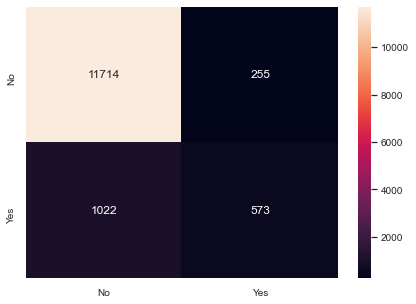

In [202]:
y_predict11 = bank_grb_cl6.predict(X_test)

print('Score with train data :',bank_grb_cl6.score(X_train, y_train))
print('Score with test data :',bank_grb_cl6.score(X_test, y_test))

cm11=metrics.confusion_matrix(y_test, y_predict11,labels=[0, 1])

df_cm11 = pd.DataFrame(cm11, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm11, annot=True ,fmt='g');

In [203]:
print('The model performance metrics are printed below: \n')
print(classification_report(y_test, y_predict11 , digits = 6))

The model performance metrics are printed below: 

              precision    recall  f1-score   support

           0   0.919755  0.978695  0.948310     11969
           1   0.692029  0.359248  0.472967      1595

    accuracy                       0.905854     13564
   macro avg   0.805892  0.668971  0.710639     13564
weighted avg   0.892977  0.905854  0.892414     13564



In [204]:
class_report = classification_report(y_test, y_predict11 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df


Model no                   Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1    model 2                 DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2    model 3                 DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3    model 4                 DecisionTree  0.876954      0.878797   0.876954     0.877855    13564
4    model 5                 DecisionTree  0.879165      0.875934   0.879165     0.877479    13564
5    model 6                 DecisionTree  0.878502      0.876069   0.878502     0.877246    13564
6    model 7           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
7    model 8           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
8    model 9       AdaBoosting Classifier  0.876069      0.876709   0.876069     0.876387    13564
9   model 10       AdaBoosting Classifier  0.903200      0.890404   0.903200     0.892638    13564
10  model 11  GradientBoosting Classifier  0.905854      0.892977   0.905854     0.892414    13564

#### 3.2.e Results for Ensemble Learning - using GradientBoost , with max_depth = default (3) & ccp_alpha = 0 , is as per model 11 above

    accuracy = 0.905854 
    wgt av precision = 0.892977
    wgt av recall = 0.905854 
    wgt av f1 score = 0.892414

#### Confusion matrix has also been plotted

###                     3.2.f  Ensemble Learning - using GradientBoost , with max_depth = 5 & ccp_alpha = 0

In [205]:
#from sklearn.ensemble import GradientBoostingClassifier
bank_grb_cl7 = GradientBoostingClassifier( max_depth=5, ccp_alpha=0,  n_estimators = 50,random_state=3)
bank_grb_cl7 = bank_grb_cl7.fit(X_train, y_train)

m = 'model 12'
c= 'GradientBoosting Classifier'

Score with train data : 0.9195500363383575
Score with test data : 0.906664700678266


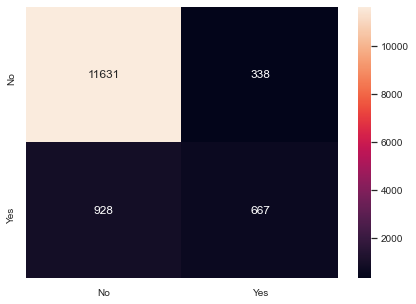

In [206]:
y_predict12 = bank_grb_cl7.predict(X_test)

print('Score with train data :',bank_grb_cl7.score(X_train, y_train))
print('Score with test data :',bank_grb_cl7.score(X_test, y_test))

cm12=metrics.confusion_matrix(y_test, y_predict12,labels=[0, 1])

df_cm12 = pd.DataFrame(cm12, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm12, annot=True ,fmt='g');

In [207]:
print('The model performance metrics are printed below: \n')
print(classification_report(y_test, y_predict12 , digits = 6))

The model performance metrics are printed below: 

              precision    recall  f1-score   support

           0   0.926109  0.971760  0.948386     11969
           1   0.663682  0.418182  0.513077      1595

    accuracy                       0.906665     13564
   macro avg   0.794895  0.694971  0.730731     13564
weighted avg   0.895250  0.906665  0.897197     13564



In [208]:
class_report = classification_report(y_test, y_predict12 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df


Model no                   Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1    model 2                 DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2    model 3                 DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3    model 4                 DecisionTree  0.876954      0.878797   0.876954     0.877855    13564
4    model 5                 DecisionTree  0.879165      0.875934   0.879165     0.877479    13564
5    model 6                 DecisionTree  0.878502      0.876069   0.878502     0.877246    13564
6    model 7           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
7    model 8           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
8    model 9       AdaBoosting Classifier  0.876069      0.876709   0.876069     0.876387    13564
9   model 10       AdaBoosting Classifier  0.903200      0.890404   0.903200     0.892638    13564
10  model 11  GradientBoosting Classifier  0.905854      0.892977   0.905854     0.892414    13564
11  model 12  GradientBoosting Classifier  0.906665      0.895250   0.906665     0.897197    13564

#### 3.2.f Results for Ensemble Learning - using GradientBoost , with max_depth = 5 & ccp_alpha = 0, is as per Model 12 above

    accuracy = 0.906665 
    wgt av precision = 0.895250
    wgt av recall = 0.906665 
    wgt av f1 score = 0.897197

#### Confusion matrix has also been plotted

#### Check the ccp_alpha values for  the unpruned Tree. To be used for Gradient Boost based model

In [209]:
path = dTree1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

[0.00000000e+00 1.55941003e-05 1.56529962e-05 ... 3.09066093e-03
 1.54741788e-02 2.63678054e-02]


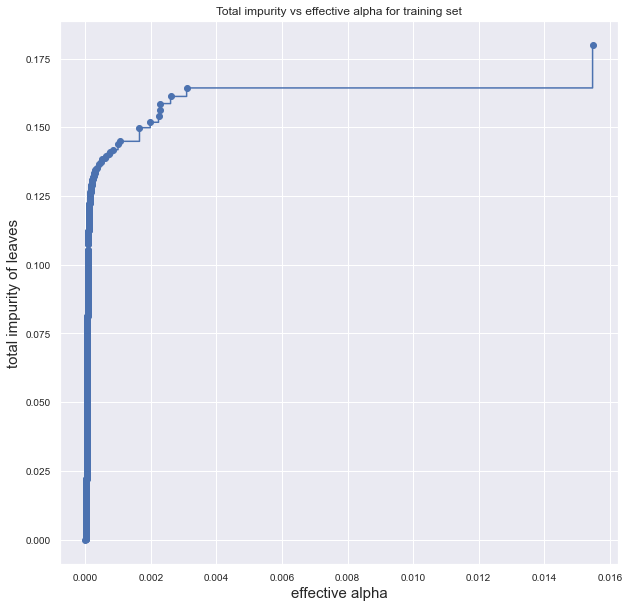

In [210]:
fig, ax =  plt.subplots( figsize=(10,10))
ax.plot( ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle ='steps-post')
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total impurity vs effective alpha for training set")
print(ccp_alphas)

###                     3.2.g Ensemble Learning - using GradientBoost , with max_depth = default (3) & ccp_alpha = 0.002 , based on ccp_alpha values obtained earlier 

In [211]:
#from sklearn.ensemble import GradientBoostingClassifier
bank_grb_cl8 = GradientBoostingClassifier( max_depth=3, ccp_alpha=0.002,  n_estimators = 50,random_state=3)
bank_grb_cl8 = bank_grb_cl8.fit(X_train, y_train)

m = 'model 13'
c= 'GradientBoosting Classifier'

Score with train data : 0.8847284102758556
Score with test data : 0.8847284102758556


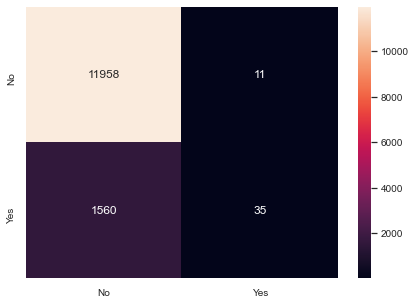

In [212]:
y_predict13 = bank_grb_cl8.predict(X_test)

print('Score with train data :', bank_grb_cl8.score(X_train, y_train))
print('Score with test data :', bank_grb_cl8.score(X_train, y_train))

cm13=metrics.confusion_matrix(y_test, y_predict13,labels=[0, 1])

df_cm13 = pd.DataFrame(cm13, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm13, annot=True ,fmt='g');

In [213]:
print('The model performance metrics are printed below: \n')
print(classification_report(y_test, y_predict13 , digits = 6))

The model performance metrics are printed below: 

              precision    recall  f1-score   support

           0   0.884598  0.999081  0.938361     11969
           1   0.760870  0.021944  0.042657      1595

    accuracy                       0.884179     13564
   macro avg   0.822734  0.510512  0.490509     13564
weighted avg   0.870049  0.884179  0.833034     13564



In [214]:
class_report = classification_report(y_test, y_predict13 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df


Model no                   Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1    model 2                 DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2    model 3                 DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3    model 4                 DecisionTree  0.876954      0.878797   0.876954     0.877855    13564
4    model 5                 DecisionTree  0.879165      0.875934   0.879165     0.877479    13564
5    model 6                 DecisionTree  0.878502      0.876069   0.878502     0.877246    13564
6    model 7           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
7    model 8           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
8    model 9       AdaBoosting Classifier  0.876069      0.876709   0.876069     0.876387    13564
9   model 10       AdaBoosting Classifier  0.903200      0.890404   0.903200     0.892638    13564
10  model 11  GradientBoosting Classifier  0.905854      0.892977   0.905854     0.892414    13564
11  model 12  GradientBoosting Classifier  0.906665      0.895250   0.906665     0.897197    13564
12  model 13  GradientBoosting Classifier  0.884179      0.870049   0.884179     0.833034    13564

#### 3.2.g Results for Ensemble Learning - using GradientBoost , with max_depth = default (3) & ccp_alpha = 0.002 , based on ccp_alpha values obtained earlier, is as per Model 13 above

    accuracy = 0.884179 
    wgt av precision = 0.870049
    wgt av recall = 0.884179
    wgt av f1 score = 0.833034

#### Confusion matrix has also been plotted

### 3.2.h Model building using RandomForest Classifier , using criterion = gini (default), no max depth , max_features=auto (default), class_weight = none (default) , ccp_alpha = 0 (default)

In [215]:
# from sklearn.ensemble import RandomForestClassifier
bank_ran_for_cl9 = RandomForestClassifier(n_estimators = 50, criterion='gini', max_depth=None, max_features='auto',
                                          class_weight = None, ccp_alpha=0, random_state=3)
bank_ran_for_cl9 = bank_ran_for_cl9.fit(X_train, y_train)

m = 'model 14'
c= 'Random Forest Classifier'

Score with train data : 0.999715612854299
Score with test data : 0.903347095252138


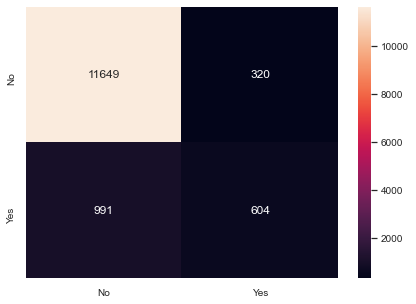

In [216]:
y_predict14 = bank_ran_for_cl9.predict(X_test)

print('Score with train data :', bank_ran_for_cl9.score(X_train, y_train))
print('Score with test data :', bank_ran_for_cl9.score(X_test, y_test))

cm14=metrics.confusion_matrix(y_test, y_predict14,labels=[0, 1])

df_cm14 = pd.DataFrame(cm14, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm14, annot=True ,fmt='g');

In [217]:
print('The model performance metrics are printed below: \n')
print(classification_report(y_test, y_predict14 , digits = 6))

The model performance metrics are printed below: 

              precision    recall  f1-score   support

           0   0.921598  0.973264  0.946727     11969
           1   0.653680  0.378683  0.479555      1595

    accuracy                       0.903347     13564
   macro avg   0.787639  0.675974  0.713141     13564
weighted avg   0.890093  0.903347  0.891792     13564



In [218]:
class_report = classification_report(y_test, y_predict14 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df


Model no                   Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1    model 2                 DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2    model 3                 DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3    model 4                 DecisionTree  0.876954      0.878797   0.876954     0.877855    13564
4    model 5                 DecisionTree  0.879165      0.875934   0.879165     0.877479    13564
5    model 6                 DecisionTree  0.878502      0.876069   0.878502     0.877246    13564
6    model 7           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
7    model 8           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
8    model 9       AdaBoosting Classifier  0.876069      0.876709   0.876069     0.876387    13564
9   model 10       AdaBoosting Classifier  0.903200      0.890404   0.903200     0.892638    13564
10  model 11  GradientBoosting Classifier  0.905854      0.892977   0.905854     0.892414    13564
11  model 12  GradientBoosting Classifier  0.906665      0.895250   0.906665     0.897197    13564
12  model 13  GradientBoosting Classifier  0.884179      0.870049   0.884179     0.833034    13564
13  model 14     Random Forest Classifier  0.903347      0.890093   0.903347     0.891792    13564

#### 3.2.h Results for Model building using RandomForest Classifier , using criterion = gini (default), no max depth , max_features=auto (default), class_weight = none (default) , ccp_alpha = 0 (default), is as per Model 14 above

    accuracy = 0.903347
    wgt av precision = 0.890093
    wgt av recall = 0.903347
    wgt av f1 score = 0.891792

#### Confusion matrix has also been plotted

### 3.2.i Run Random Forest Classifier with different parameters

### 3.2.i.1 Random Forest with criterion = entropy

In [219]:

bank_ran_for_cl10 = RandomForestClassifier(n_estimators = 50, criterion='entropy', max_depth=None, max_features='auto',
                                          class_weight = None, ccp_alpha=0, random_state=3)
bank_ran_for_cl10 = bank_ran_for_cl10.fit(X_train, y_train)

m = 'model 15'
c= 'Random Forest Classifier'

Score with train data : 0.9997472114260435
Score with test data : 0.9046741374225892


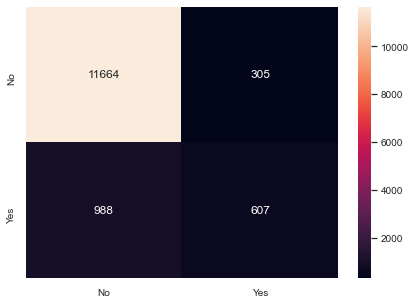

In [220]:
y_predict15 = bank_ran_for_cl10.predict(X_test)

print('Score with train data :', bank_ran_for_cl10.score(X_train, y_train))
print('Score with test data :', bank_ran_for_cl10.score(X_test, y_test))

cm15=metrics.confusion_matrix(y_test, y_predict15,labels=[0, 1])

df_cm15 = pd.DataFrame(cm15, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm15, annot=True ,fmt='g');

In [221]:
print('The model performance metrics are printed below: \n')
print(classification_report(y_test, y_predict15 , digits = 6))

The model performance metrics are printed below: 

              precision    recall  f1-score   support

           0   0.921910  0.974518  0.947484     11969
           1   0.665570  0.380564  0.484244      1595

    accuracy                       0.904674     13564
   macro avg   0.793740  0.677541  0.715864     13564
weighted avg   0.891766  0.904674  0.893011     13564



In [222]:
class_report = classification_report(y_test, y_predict15 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df


Model no                   Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1    model 2                 DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2    model 3                 DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3    model 4                 DecisionTree  0.876954      0.878797   0.876954     0.877855    13564
4    model 5                 DecisionTree  0.879165      0.875934   0.879165     0.877479    13564
5    model 6                 DecisionTree  0.878502      0.876069   0.878502     0.877246    13564
6    model 7           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
7    model 8           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
8    model 9       AdaBoosting Classifier  0.876069      0.876709   0.876069     0.876387    13564
9   model 10       AdaBoosting Classifier  0.903200      0.890404   0.903200     0.892638    13564
10  model 11  GradientBoosting Classifier  0.905854      0.892977   0.905854     0.892414    13564
11  model 12  GradientBoosting Classifier  0.906665      0.895250   0.906665     0.897197    13564
12  model 13  GradientBoosting Classifier  0.884179      0.870049   0.884179     0.833034    13564
13  model 14     Random Forest Classifier  0.903347      0.890093   0.903347     0.891792    13564
14  model 15     Random Forest Classifier  0.904674      0.891766   0.904674     0.893011    13564

### 3.2.i.1 Results for Random Forest with criterion = entropy, is as per Model 15 above

    accuracy = 0.904674
    wgt av precision = 0.891766
    wgt av recall = 0.904674
    wgt av f1 score = 0.893011 	

#### Confusion matrix has also been plotted

### 3.2.i.2 Random Forest with criterion = entropy, and changing max_depth , depth = 3

Score with train data : 0.8833696716908396
Score with test data : 0.8824093187850192

The model performance metrics are printed below: 

              precision    recall  f1-score   support

           0   0.882466  0.999916  0.937527     11969
           1   0.500000  0.000627  0.001252      1595

    accuracy                       0.882409     13564
   macro avg   0.691233  0.500272  0.469390     13564
weighted avg   0.837491  0.882409  0.827430     13564



Model no                   Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1    model 2                 DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2    model 3                 DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3    model 4                 DecisionTree  0.876954      0.878797   0.876954     0.877855    13564
4    model 5                 DecisionTree  0.879165      0.875934   0.879165     0.877479    13564
5    model 6                 DecisionTree  0.878502      0.876069   0.878502     0.877246    13564
6    model 7           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
7    model 8           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
8    model 9       AdaBoosting Classifier  0.876069      0.876709   0.876069     0.876387    13564
9   model 10       AdaBoosting Classifier  0.903200      0.890404   0.903200     0.892638    13564
10  model 11  GradientBoosting Classifier  0.905854      0.892977   0.905854     0.892414    13564
11  model 12  GradientBoosting Classifier  0.906665      0.895250   0.906665     0.897197    13564
12  model 13  GradientBoosting Classifier  0.884179      0.870049   0.884179     0.833034    13564
13  model 14     Random Forest Classifier  0.903347      0.890093   0.903347     0.891792    13564
14  model 15     Random Forest Classifier  0.904674      0.891766   0.904674     0.893011    13564
15  model 16     Random Forest Classifier  0.882409      0.837491   0.882409     0.827430    13564

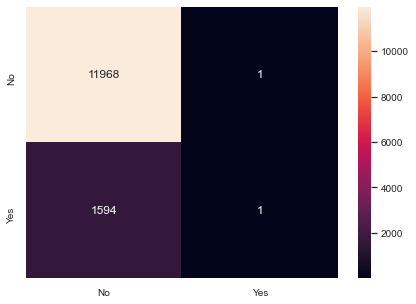

In [223]:
depth = 3

bank_ran_for_cl11 = RandomForestClassifier(n_estimators = 50, criterion='entropy', max_depth=depth, max_features='auto',
                                              class_weight = None, ccp_alpha=0, random_state=3)
bank_ran_for_cl11 = bank_ran_for_cl11.fit(X_train, y_train)

m = 'model 16'
c= 'Random Forest Classifier'
    
y_predict16 = bank_ran_for_cl11.predict(X_test)

print('Score with train data :', bank_ran_for_cl11.score(X_train, y_train))
print('Score with test data :', bank_ran_for_cl11.score(X_test, y_test))

cm16=metrics.confusion_matrix(y_test, y_predict16,labels=[0, 1])

df_cm16 = pd.DataFrame(cm16, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm16, annot=True ,fmt='g');
    
print('\nThe model performance metrics are printed below: \n')
print(classification_report(y_test, y_predict16 , digits = 6))
    
class_report = classification_report(y_test, y_predict16 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df

### 3.2.i.2 Results for Random Forest with criterion = entropy, and changing max_depth , depth = 3, is as per Model 16 above

    accuracy = 0.882409
    wgt av precision = 0.837491
    wgt av recall = 0.882409
    wgt av f1 score = 0.827430	

#### Confusion matrix has also been plotted

### 3.2.i.3 Random Forest with criterion = entropy, and changing max_depth , depth = 5

Score with train data : 0.8938603975100325
Score with test data : 0.892214685933353

The model performance metrics are printed below: 

              precision    recall  f1-score   support

           0   0.893197  0.997076  0.942282     11969
           1   0.827586  0.105329  0.186874      1595

    accuracy                       0.892215     13564
   macro avg   0.860391  0.551202  0.564578     13564
weighted avg   0.885481  0.892215  0.853453     13564



Model no                   Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1    model 2                 DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2    model 3                 DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3    model 4                 DecisionTree  0.876954      0.878797   0.876954     0.877855    13564
4    model 5                 DecisionTree  0.879165      0.875934   0.879165     0.877479    13564
5    model 6                 DecisionTree  0.878502      0.876069   0.878502     0.877246    13564
6    model 7           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
7    model 8           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
8    model 9       AdaBoosting Classifier  0.876069      0.876709   0.876069     0.876387    13564
9   model 10       AdaBoosting Classifier  0.903200      0.890404   0.903200     0.892638    13564
10  model 11  GradientBoosting Classifier  0.905854      0.892977   0.905854     0.892414    13564
11  model 12  GradientBoosting Classifier  0.906665      0.895250   0.906665     0.897197    13564
12  model 13  GradientBoosting Classifier  0.884179      0.870049   0.884179     0.833034    13564
13  model 14     Random Forest Classifier  0.903347      0.890093   0.903347     0.891792    13564
14  model 15     Random Forest Classifier  0.904674      0.891766   0.904674     0.893011    13564
15  model 16     Random Forest Classifier  0.882409      0.837491   0.882409     0.827430    13564
16  model 17     Random Forest Classifier  0.892215      0.885481   0.892215     0.853453    13564

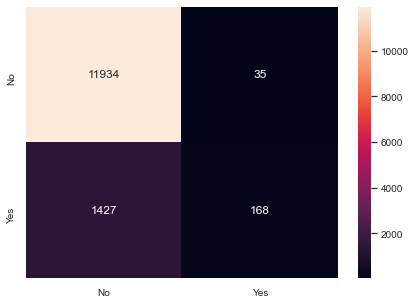

In [224]:
depth = 5

bank_ran_for_cl12 = RandomForestClassifier(n_estimators = 50, criterion='entropy', max_depth=depth, max_features='auto',
                                              class_weight = None, ccp_alpha=0, random_state=3)
bank_ran_for_cl12 = bank_ran_for_cl12.fit(X_train, y_train)

m = 'model 17'
c= 'Random Forest Classifier'
    
y_predict17 = bank_ran_for_cl12.predict(X_test)

print('Score with train data :', bank_ran_for_cl12.score(X_train, y_train))
print('Score with test data :', bank_ran_for_cl12.score(X_test, y_test))

cm17=metrics.confusion_matrix(y_test, y_predict17,labels=[0, 1])

df_cm17 = pd.DataFrame(cm17, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm17, annot=True ,fmt='g');
    
print('\nThe model performance metrics are printed below: \n')
print(classification_report(y_test, y_predict17 , digits = 6))
    
class_report = classification_report(y_test, y_predict17 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df

### 3.2.i.3 Results for Random Forest with criterion = entropy, and changing max_depth , depth = 5, is as per Model 17 above

    accuracy = 0.892215
    wgt av precision = 0.885481
    wgt av recall = 0.892215
    wgt av f1 score = 0.853453	

#### Confusion matrix has also been plotted

#### 3.2.i.4 Random Forest classifier with max_depth = None , criterion=entropy , class_weight = 'balanced'

Score with train data : 0.999715612854299
Score with test data : 0.9029784724270127

The model performance metrics are printed below: 

              precision    recall  f1-score   support

           0   0.917535  0.977943  0.946777     11969
           1   0.672862  0.340439  0.452123      1595

    accuracy                       0.902978     13564
   macro avg   0.795199  0.659191  0.699450     13564
weighted avg   0.888764  0.902978  0.888610     13564



Model no                   Classifier  accuracy  wa precision  wa recall  wa f1 score  support
1    model 2                 DecisionTree  0.904158      0.890452   0.904158     0.888910    13564
2    model 3                 DecisionTree  0.877396      0.879032   0.877396     0.878198    13564
3    model 4                 DecisionTree  0.876954      0.878797   0.876954     0.877855    13564
4    model 5                 DecisionTree  0.879165      0.875934   0.879165     0.877479    13564
5    model 6                 DecisionTree  0.878502      0.876069   0.878502     0.877246    13564
6    model 7           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
7    model 8           Bagging Classifier  0.903937      0.894328   0.903937     0.897356    13564
8    model 9       AdaBoosting Classifier  0.876069      0.876709   0.876069     0.876387    13564
9   model 10       AdaBoosting Classifier  0.903200      0.890404   0.903200     0.892638    13564
10  model 11  GradientBoosting Classifier  0.905854      0.892977   0.905854     0.892414    13564
11  model 12  GradientBoosting Classifier  0.906665      0.895250   0.906665     0.897197    13564
12  model 13  GradientBoosting Classifier  0.884179      0.870049   0.884179     0.833034    13564
13  model 14     Random Forest Classifier  0.903347      0.890093   0.903347     0.891792    13564
14  model 15     Random Forest Classifier  0.904674      0.891766   0.904674     0.893011    13564
15  model 16     Random Forest Classifier  0.882409      0.837491   0.882409     0.827430    13564
16  model 17     Random Forest Classifier  0.892215      0.885481   0.892215     0.853453    13564
17  model 18     Random Forest Classifier  0.902978      0.888764   0.902978     0.888610    13564

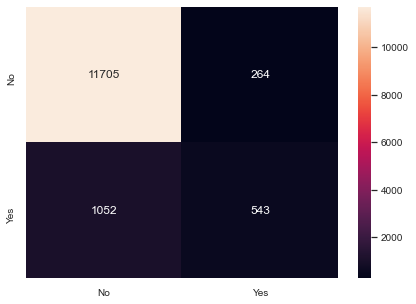

In [225]:
depth = None

bank_ran_for_cl13 = RandomForestClassifier(n_estimators = 50, criterion='entropy', max_depth=depth, max_features='auto',
                                              class_weight = 'balanced', ccp_alpha=0, random_state=3)
bank_ran_for_cl13 = bank_ran_for_cl13.fit(X_train, y_train)

m = 'model 18'
c= 'Random Forest Classifier'
    
y_predict18 = bank_ran_for_cl13.predict(X_test)

print('Score with train data :', bank_ran_for_cl13.score(X_train, y_train))
print('Score with test data :', bank_ran_for_cl13.score(X_test, y_test))

cm18=metrics.confusion_matrix(y_test, y_predict18,labels=[0, 1])

df_cm18 = pd.DataFrame(cm18, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm18, annot=True ,fmt='g');
    
print('\nThe model performance metrics are printed below: \n')
print(classification_report(y_test, y_predict18 , digits = 6))
    
class_report = classification_report(y_test, y_predict18 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df

### 3.2.i.4 Random Forest classifier with max_depth = None , criterion=entropy , class_weight = 'balanced', is as per Model 18 above

    accuracy = 0.903347
    wgt av precision = 0.889298 	
    wgt av recall = 0.903347
    wgt av f1 score = 0.889008	

#### Confusion matrix has also been plotted

### 3.2.i.5 Finding best parameters for Random Forest - using RandomizedsearchCV

#### Creating a parameter grid

In [226]:
from sklearn.model_selection import RandomizedSearchCV

estimators = [50, 100, 200]
criteria = ['gini', 'entropy']
no_features = ['auto', 'sqrt', 'log2']
depth = [None , 3, 5, 7]
class_wt = [None, 'balanced']
cost_complexity = [0, 0.001, 0.002, 0.003]

# creating the grid with values as defined above , as a dict

random_grid = {'n_estimators': estimators, 'criterion': criteria, 'max_features': no_features, 'max_depth': depth ,
              'class_weight': class_wt, 'ccp_alpha': cost_complexity}

print(random_grid)

{'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None, 3, 5, 7], 'class_weight': [None, 'balanced'], 'ccp_alpha': [0, 0.001, 0.002, 0.003]}


In [227]:
# Creating the RandomForestRegressor object
bank_ran_for_cl_random_search = RandomForestClassifier()

# Using cross validation split = 3, n_iter= 50, instantiate RandomizedSearchCV , along with other random serach parameters

bank_rf_random_search = RandomizedSearchCV(estimator = bank_ran_for_cl_random_search,param_distributions = random_grid,
                                          n_iter=50, cv=3, verbose=2, random_state=3, n_jobs = -1 )

bank_rf_random_search.fit(X_train, y_train)

# print the best parameters found

bank_rf_random_search.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.7min finished


{'n_estimators': 100,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'entropy',
 'class_weight': None,
 'ccp_alpha': 0}

#### Running model with the parameters suggessted

Score with train data : 0.9999684014282555
Score with test data : 0.9054851076378649

The model performance metrics are printed below: 

              precision    recall  f1-score   support

           0   0.922444  0.974852  0.947924     11969
           1   0.671038  0.384953  0.489243      1595

    accuracy                       0.905485     13564
   macro avg   0.796741  0.679902  0.718584     13564
weighted avg   0.892881  0.905485  0.893988     13564



Model no                   Classifier  accuracy  wa precision  wa recall  \
1                  model 2                 DecisionTree  0.904158      0.890452   0.904158   
2                  model 3                 DecisionTree  0.877396      0.879032   0.877396   
3                  model 4                 DecisionTree  0.876954      0.878797   0.876954   
4                  model 5                 DecisionTree  0.879165      0.875934   0.879165   
5                  model 6                 DecisionTree  0.878502      0.876069   0.878502   
6                  model 7           Bagging Classifier  0.903937      0.894328   0.903937   
7                  model 8           Bagging Classifier  0.903937      0.894328   0.903937   
8                  model 9       AdaBoosting Classifier  0.876069      0.876709   0.876069   
9                 model 10       AdaBoosting Classifier  0.903200      0.890404   0.903200   
10                model 11  GradientBoosting Classifier  0.905854      0.892977   0.905854   
11                model 12  GradientBoosting Classifier  0.906665      0.895250   0.906665   
12                model 13  GradientBoosting Classifier  0.884179      0.870049   0.884179   
13                model 14     Random Forest Classifier  0.903347      0.890093   0.903347   
14                model 15     Random Forest Classifier  0.904674      0.891766   0.904674   
15                model 16     Random Forest Classifier  0.882409      0.837491   0.882409   
16                model 17     Random Forest Classifier  0.892215      0.885481   0.892215   
17                model 18     Random Forest Classifier  0.902978      0.888764   0.902978   
18  model 19-random search     Random Forest Classifier  0.905485      0.892881   0.905485   

    wa f1 score  support  
1      0.888910    13564  
2      0.878198    13564  
3      0.877855    13564  
4      0.877479    13564  
5      0.877246    13564  
6      0.897356    13564  
7      0.897356    13564  
8      0.876387    13564  
9      0.892638    13564  
10     0.892414    13564  
11     0.897197    13564  
12     0.833034    13564  
13     0.891792    13564  
14     0.893011    13564  
15     0.827430    13564  
16     0.853453    13564  
17     0.888610    13564  
18     0.893988    13564

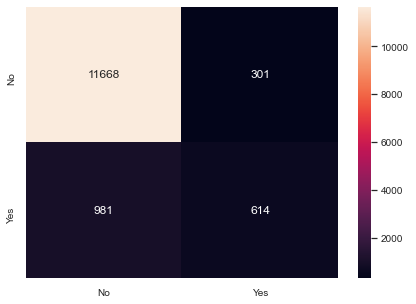

In [228]:

bank_ran_for_cl14 = RandomForestClassifier(n_estimators = 100, criterion='entropy', max_depth=None, max_features='auto',
                                              class_weight = None, ccp_alpha=0, random_state=3)
bank_ran_for_cl14 = bank_ran_for_cl14.fit(X_train, y_train)

m = 'model 19-random search'
c= 'Random Forest Classifier'
    
y_predict19 = bank_ran_for_cl14.predict(X_test)

print('Score with train data :', bank_ran_for_cl14.score(X_train, y_train))
print('Score with test data :', bank_ran_for_cl14.score(X_test, y_test))

cm19=metrics.confusion_matrix(y_test, y_predict19,labels=[0, 1])

df_cm19 = pd.DataFrame(cm19, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm19, annot=True ,fmt='g');
    
print('\nThe model performance metrics are printed below: \n')
print(classification_report(y_test, y_predict19 , digits = 6))
    
class_report = classification_report(y_test, y_predict19 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()
#print(class_report, '\n')

class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1
#print(class_report_wt_avg, row_index)

class_report_df.loc[row_index] = class_report_wt_avg

class_report_df

### 3.2.i.5 Results from Finding best parameters for Random Forest - using RandamizedsearchCV, and running model per the suggested parameters , is as per Model 19 above

    accuracy = 0.905485
    wgt av precision = 0.892881 	
    wgt av recall = 0.905485
    wgt av f1 score = 0.893988	

#### Confusion matrix has also been plotted

### 3.2.j. Run with RandomSearchCV for Gradient Boosting , to see if the performance can be improved by using other parameters

In [229]:
from sklearn.model_selection import RandomizedSearchCV

estimators1 = [50, 100, 200]
criteria1 = ['friedman_mse']
no_features1 = ['auto', 'sqrt', 'log2']
depth1 = [None , 3, 5, 7, 10]
cost_complexity1 = [0, 0.001, 0.002]

# creating the grid with values as defined above , as a dict

random_grid1 = {'n_estimators': estimators1, 'criterion': criteria1, 'max_features': no_features1, 'max_depth': depth1 ,
              'ccp_alpha': cost_complexity1}

print(random_grid1)

{'n_estimators': [50, 100, 200], 'criterion': ['friedman_mse'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None, 3, 5, 7, 10], 'ccp_alpha': [0, 0.001, 0.002]}


In [230]:
# Creating the RandomForestRegressor object
bank_gradient_boost_cl_random_search = GradientBoostingClassifier()

# Using cross validation split = 3, n_iter= 50, instantiate RandomizedSearchCV , along with other random serach parameters

bank_gb_random_search = RandomizedSearchCV(estimator = bank_gradient_boost_cl_random_search,param_distributions = random_grid1,
                                          n_iter=50, cv=3, verbose=2, random_state=3, n_jobs = -1 )

bank_gb_random_search.fit(X_train, y_train)

# print the best parameters found

bank_gb_random_search.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 22.3min finished


{'n_estimators': 200,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'friedman_mse',
 'ccp_alpha': 0}

#### Running model with the parameters suggessted

Score with train data : 0.9563623724207666
Score with test data : 0.9108670008846947

The model performance metrics are printed below: 

              precision    recall  f1-score   support

           0   0.933801  0.967583  0.950392     11969
           1   0.666093  0.485266  0.561480      1595

    accuracy                       0.910867     13564
   macro avg   0.799947  0.726425  0.755936     13564
weighted avg   0.902321  0.910867  0.904659     13564



Model no                    Classifier  accuracy  wa precision  wa recall  \
1                    model 2                  DecisionTree  0.904158      0.890452   0.904158   
2                    model 3                  DecisionTree  0.877396      0.879032   0.877396   
3                    model 4                  DecisionTree  0.876954      0.878797   0.876954   
4                    model 5                  DecisionTree  0.879165      0.875934   0.879165   
5                    model 6                  DecisionTree  0.878502      0.876069   0.878502   
6                    model 7            Bagging Classifier  0.903937      0.894328   0.903937   
7                    model 8            Bagging Classifier  0.903937      0.894328   0.903937   
8                    model 9        AdaBoosting Classifier  0.876069      0.876709   0.876069   
9                   model 10        AdaBoosting Classifier  0.903200      0.890404   0.903200   
10                  model 11   GradientBoosting Classifier  0.905854      0.892977   0.905854   
11                  model 12   GradientBoosting Classifier  0.906665      0.895250   0.906665   
12                  model 13   GradientBoosting Classifier  0.884179      0.870049   0.884179   
13                  model 14      Random Forest Classifier  0.903347      0.890093   0.903347   
14                  model 15      Random Forest Classifier  0.904674      0.891766   0.904674   
15                  model 16      Random Forest Classifier  0.882409      0.837491   0.882409   
16                  model 17      Random Forest Classifier  0.892215      0.885481   0.892215   
17                  model 18      Random Forest Classifier  0.902978      0.888764   0.902978   
18    model 19-random search      Random Forest Classifier  0.905485      0.892881   0.905485   
19  model 20-random search-1  G B Classifier-Random serach  0.910867      0.902321   0.910867   

    wa f1 score  support  
1      0.888910    13564  
2      0.878198    13564  
3      0.877855    13564  
4      0.877479    13564  
5      0.877246    13564  
6      0.897356    13564  
7      0.897356    13564  
8      0.876387    13564  
9      0.892638    13564  
10     0.892414    13564  
11     0.897197    13564  
12     0.833034    13564  
13     0.891792    13564  
14     0.893011    13564  
15     0.827430    13564  
16     0.853453    13564  
17     0.888610    13564  
18     0.893988    13564  
19     0.904659    13564

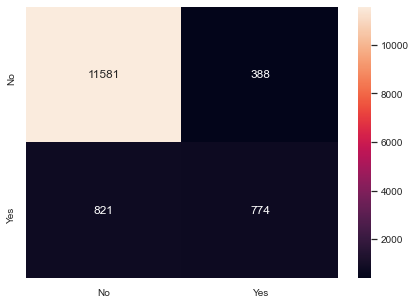

In [231]:

bank_ran_for_cl15 = GradientBoostingClassifier(n_estimators = 200, criterion='friedman_mse', max_depth=7, max_features='log2',
                                              ccp_alpha=0, random_state=3)
bank_ran_for_cl15 = bank_ran_for_cl15.fit(X_train, y_train)

m = 'model 20-random search-1'
c= 'G B Classifier-Random serach'
    
y_predict20 = bank_ran_for_cl15.predict(X_test)

print('Score with train data :', bank_ran_for_cl15.score(X_train, y_train))
print('Score with test data :', bank_ran_for_cl15.score(X_test, y_test))

cm20=metrics.confusion_matrix(y_test, y_predict20,labels=[0, 1])

df_cm20 = pd.DataFrame(cm20, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm20, annot=True ,fmt='g');
    
print('\nThe model performance metrics are printed below: \n')
print(classification_report(y_test, y_predict20 , digits = 6))
    
class_report = classification_report(y_test, y_predict20 , digits = 5, output_dict = True)
class_report_df1 = pd.DataFrame(class_report).transpose()


class_report_wt_avg = [m,c, class_report_df1.iloc[2,3] , class_report_df1.iloc[4,0], class_report_df1.iloc[4,1] , class_report_df1.iloc[4,2] , class_report_df1.iloc[4,3].astype(int)   ]

row_index = row_index + 1


class_report_df.loc[row_index] = class_report_wt_avg

class_report_df

### 3.2.j Results from Finding best parameters for Gradient Boosting Classifier - using RandamizedsearchCV, and running model per the suggested parameters , is as per Model 20 above

    accuracy = 0.908803 	
    wgt av precision = 0.899244	
    wgt av recall = 0.908803
    wgt av f1 score = 0.901641	

#### Confusion matrix has also been plotted

### 3.2.j Results from Finding best parameters for Gradient Boosting Classifier - using RandamizedsearchCV, and running model per the suggested parameters , is as per Model 20 above. Results printed belwo

In [232]:
class_report_df.iloc[18:]

Model no                    Classifier  accuracy  wa precision  wa recall  \
19  model 20-random search-1  G B Classifier-Random serach  0.910867      0.902321   0.910867   

    wa f1 score  support  
19     0.904659    13564

### 3.3  Check the results from all the Logistics , Decision tree, Bagging/Boosting ensemble models and select the best one

In [233]:
class_report_df1 = class_report_df.sort_values(by = ['accuracy' , 'wa f1 score', 'wa precision'], ascending= False)
class_report_df1

Model no                    Classifier  accuracy  wa precision  wa recall  \
19  model 20-random search-1  G B Classifier-Random serach  0.910867      0.902321   0.910867   
11                  model 12   GradientBoosting Classifier  0.906665      0.895250   0.906665   
10                  model 11   GradientBoosting Classifier  0.905854      0.892977   0.905854   
18    model 19-random search      Random Forest Classifier  0.905485      0.892881   0.905485   
14                  model 15      Random Forest Classifier  0.904674      0.891766   0.904674   
1                    model 2                  DecisionTree  0.904158      0.890452   0.904158   
6                    model 7            Bagging Classifier  0.903937      0.894328   0.903937   
7                    model 8            Bagging Classifier  0.903937      0.894328   0.903937   
13                  model 14      Random Forest Classifier  0.903347      0.890093   0.903347   
9                   model 10        AdaBoosting Classifier  0.903200      0.890404   0.903200   
17                  model 18      Random Forest Classifier  0.902978      0.888764   0.902978   
16                  model 17      Random Forest Classifier  0.892215      0.885481   0.892215   
12                  model 13   GradientBoosting Classifier  0.884179      0.870049   0.884179   
15                  model 16      Random Forest Classifier  0.882409      0.837491   0.882409   
4                    model 5                  DecisionTree  0.879165      0.875934   0.879165   
5                    model 6                  DecisionTree  0.878502      0.876069   0.878502   
2                    model 3                  DecisionTree  0.877396      0.879032   0.877396   
3                    model 4                  DecisionTree  0.876954      0.878797   0.876954   
8                    model 9        AdaBoosting Classifier  0.876069      0.876709   0.876069   

    wa f1 score  support  
19     0.904659    13564  
11     0.897197    13564  
10     0.892414    13564  
18     0.893988    13564  
14     0.893011    13564  
1      0.888910    13564  
6      0.897356    13564  
7      0.897356    13564  
13     0.891792    13564  
9      0.892638    13564  
17     0.888610    13564  
16     0.853453    13564  
12     0.833034    13564  
15     0.827430    13564  
4      0.877479    13564  
5      0.877246    13564  
2      0.878198    13564  
3      0.877855    13564  
8      0.876387    13564

### 3.3 Ans  Based on results from Ensemble models, based on accuracy , the best model , model 20 , at index 19, was obtained with gradient Boosting Classifier .  The parameters was selected based on random search .The results are :
    accuracy = 0.908803 	
    wgt av precision = 0.899244	
    wgt av recall = 0.908803
    wgt av f1 score = 0.901641


### 3.3 The difference between accuracy readings,  from among top five models , are with in 0.0042 . Of the top five models , based on accuracy , the lowest accuracy of 0.904674 , which was obtained using Random Forest Classifier ,in model 15, at index 14. The best accuracy score was obtained using Gradient Boosting Classifier , model 20, at index 19, where parameters was chosen after running RandomizedSearchCV . It is seen that out of top five models, top three models use Gradient Boosting.  

Reasons for Gradient Boosting classifier , model 20,  giving better results are:

    1> Each subsequent computation round in gradient boosting improves accuracy ,where the Bias is sequentially getting 
        reduced . Each ensemble thus ends up with the best accuracy figures for the chosen feature set.
    2> This can compared to Random Forest that has multiple simple trees when using Ensemble technique , that may not 
        eliminate all Bias , and thus has less accuracy. 
    3> Gradient Boosting Ensemble technique also reduces variance , by using multiple models , and combining the results, 
       to pick the most appropriate result set. The max_features parameter , along with random_state parameter , is used 
       when splitting , so that each tree has a different set of features . 
    4> The Gradient boosting classifier does not show extreme over fitting. The results from model 20 are below. The 
        training data and testing data scores are off by 0.024 and the training data score is not close to 1,
        like 0.9998. Thus , the model is able to better fit test model and show better score.
            Score with train data : 0.9321578664644358
            Score with test data : 0.908802713063993
            
       This can be compared with the Random Forest classifier best model , model 19, which is fourth best in ranking by 
       accuracy . It shows overfitting for train  data , as can be seen from scores , stated below. This leads to a lower 
       score for Test data.
            
            Score with train data : 0.9999684014282555
            Score with test data : 0.9054851076378649





In [234]:
# Delete all data in results df - run as required
#class_report_df = class_report_df.iloc[0:0]
# print(class_report_df.iloc[13:])
# class_report_df.drop(13, axis=0, inplace=True)
# print(class_report_df.iloc[13:])
# row_index = 13
# print(row_index)